In [74]:
import jax.numpy as np
import matplotlib.pyplot as plt
import dLux as dl
import dLux.utils as dlu
import jax.random as jr
import dLuxToliman as dlT
import optax
import zodiax as zdx
import jax
from tqdm.notebook import tqdm
import numpyro as npy
import numpyro.distributions as dist
from jax import device_count

In [75]:
wf_npix = 256 # gonna do double the psf_npix
diameter = 0.125
coords = dlu.pixel_coords(wf_npix, diameter)
aperture = dlu.circle(coords, 0.5*diameter)
wavelength = 585e-9

# this is basically half of louis 
psf_npix = 128
psf_pixel_scale = dlu.rad2arcsec(wavelength/(2*diameter))
# nyquist = lambda/2D
oversample = 2 #fairly shite.. hopefully doesn't come back to bite us

pupil = dlT.TolimanPupilLayer(wf_npix)

layers = [
    (
        'aperture',
        dl.layers.TransmissiveLayer(aperture, normalise=True)
    )
]

layers_tol = [
    (
        'aperture',
        dl.layers.TransmissiveLayer(aperture, normalise=True)
    ),
    (
        'pupil',
        pupil
    )
]

optics = dl.AngularOpticalSystem(
    wf_npix, diameter, layers, psf_npix, psf_pixel_scale, oversample
)

optics_tol = dl.AngularOpticalSystem(
    wf_npix, diameter, layers_tol, psf_npix, psf_pixel_scale, oversample
)

flux = 10000

n_trials = 10
#downsamples = np.array([1])
downsamples = np.array([1,2,4,8,16,32])

parameters = ['position', 'flux']

def psf_model(data, model, pos_arcsec):

    x = dlu.arcsec2rad(npy.sample("x_pos", dist.Uniform(-0.5*psf_pixel_scale + pos_arcsec[0],0.5*psf_pixel_scale + pos_arcsec[0])))
    y = dlu.arcsec2rad(npy.sample("y_pos", dist.Uniform(-0.5*psf_pixel_scale + pos_arcsec[1],0.5*psf_pixel_scale + pos_arcsec[1])))

    flux = npy.sample("flux", dist.Uniform(0.95*10000,1.05*10000))

    values = [
        np.array([x,y]),
        flux
    ]

    with npy.plate("data", len(data.flatten())):
        poisson_model = dist.Poisson(
            model.set(parameters, values).model().flatten()
        )
        return npy.sample("psf", poisson_model, obs=data.flatten())
    
def crb_pos(wavelength, diameter, flux):
    crb = (np.sqrt(2)/(np.pi* np.sqrt(flux))) * (wavelength/diameter)
    return crb

def crb_flux(flux):
    crbf = np.sqrt(flux)
    return crbf

sample: 100%|██████████| 400/400 [00:13<00:00, 28.60it/s, 3 steps of size 7.98e-01. acc. prob=0.85] 


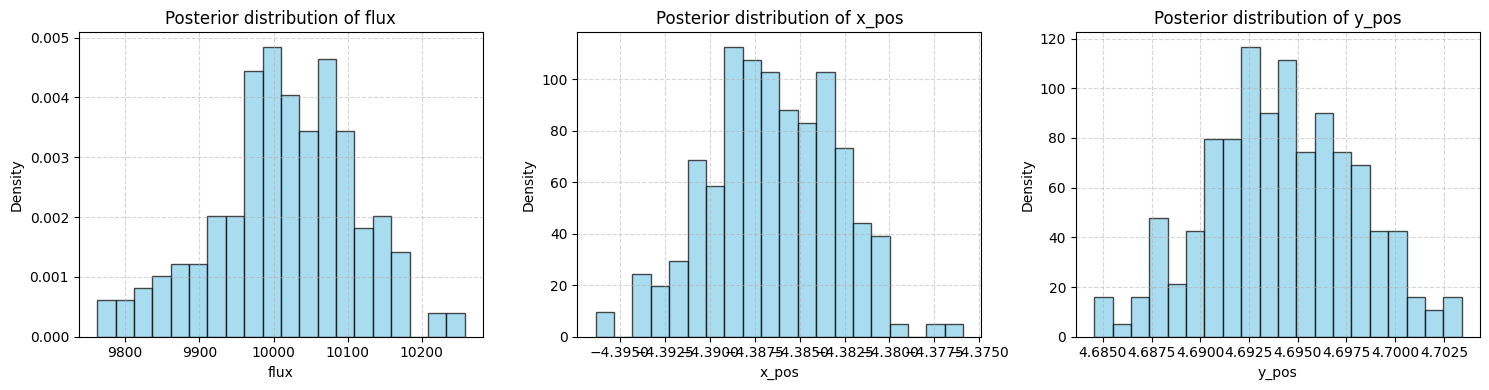

sample: 100%|██████████| 400/400 [00:13<00:00, 30.74it/s, 7 steps of size 6.80e-01. acc. prob=0.93] 


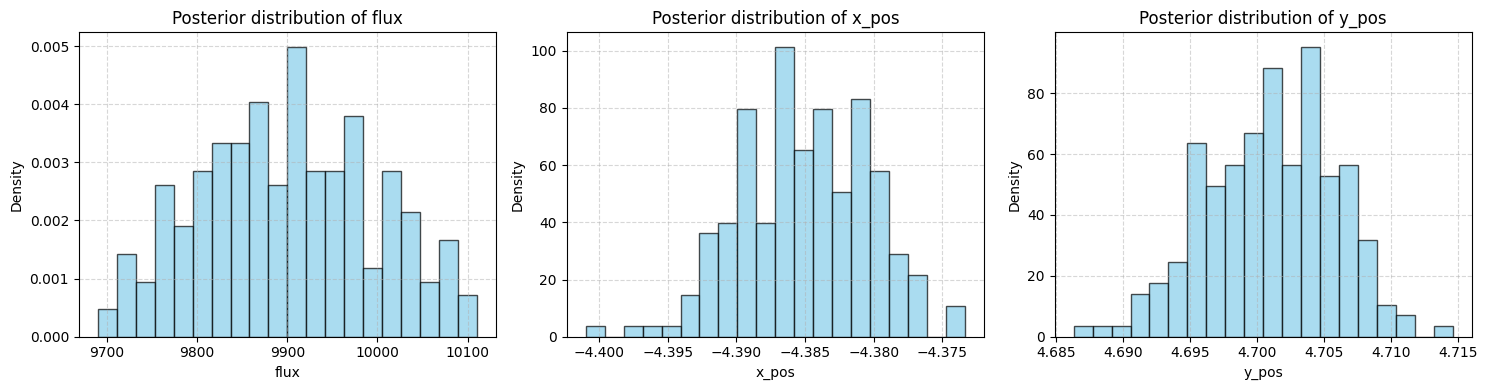

sample: 100%|██████████| 400/400 [00:13<00:00, 30.05it/s, 7 steps of size 8.20e-01. acc. prob=0.89] 


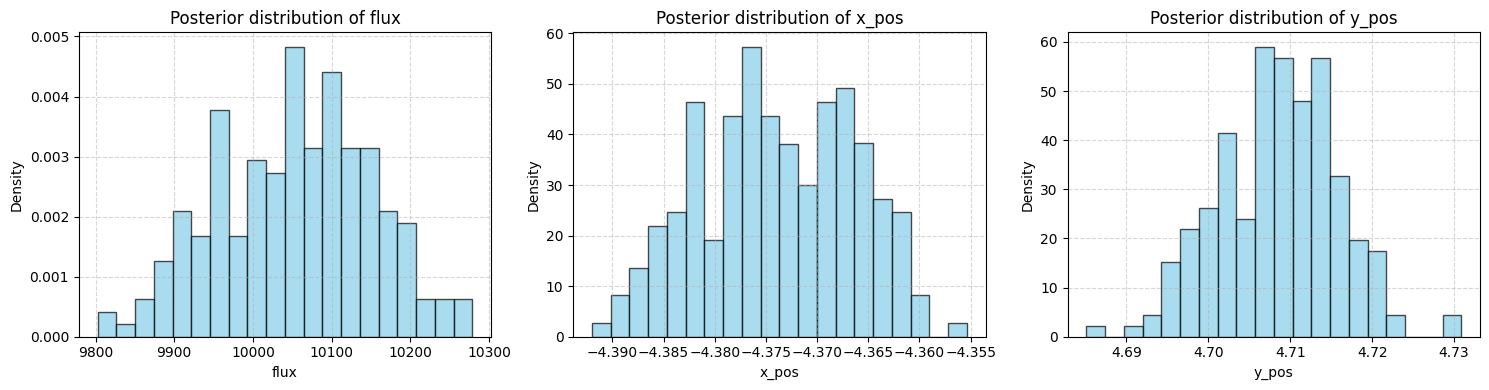

sample: 100%|██████████| 400/400 [00:10<00:00, 37.35it/s, 7 steps of size 7.10e-01. acc. prob=0.92] 


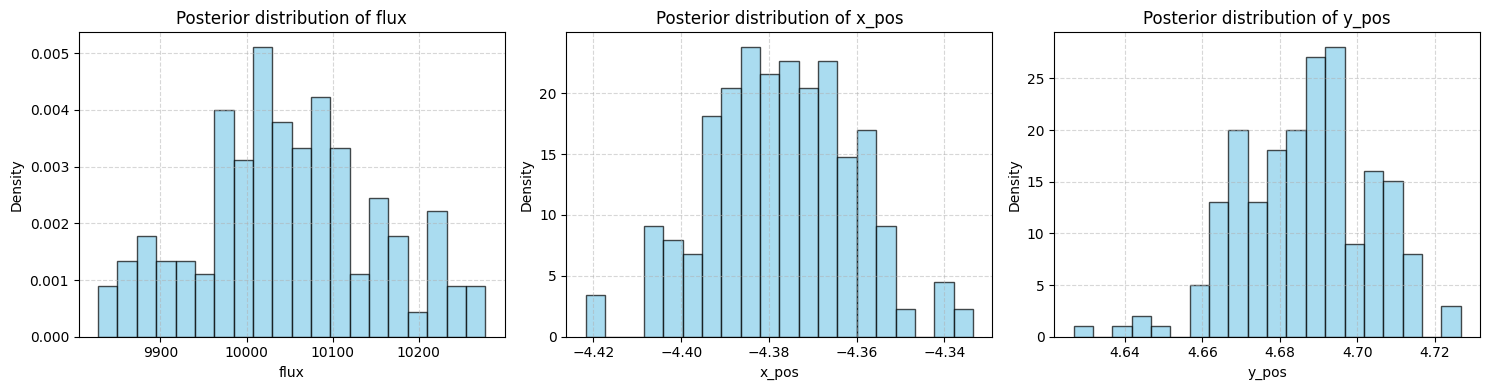

sample: 100%|██████████| 400/400 [00:11<00:00, 36.04it/s, 7 steps of size 6.81e-01. acc. prob=0.92] 


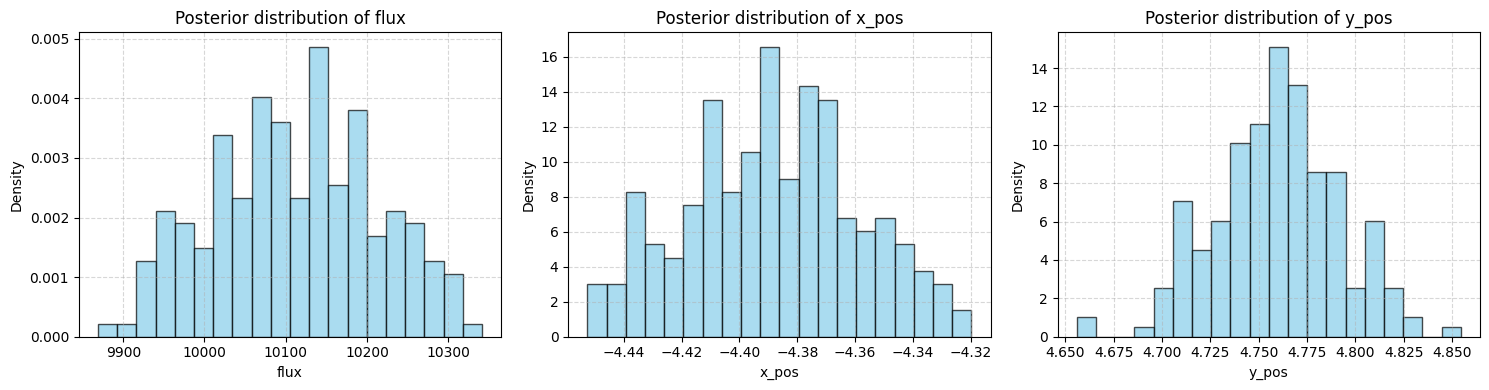

sample: 100%|██████████| 400/400 [00:10<00:00, 36.95it/s, 7 steps of size 5.65e-01. acc. prob=0.91] 


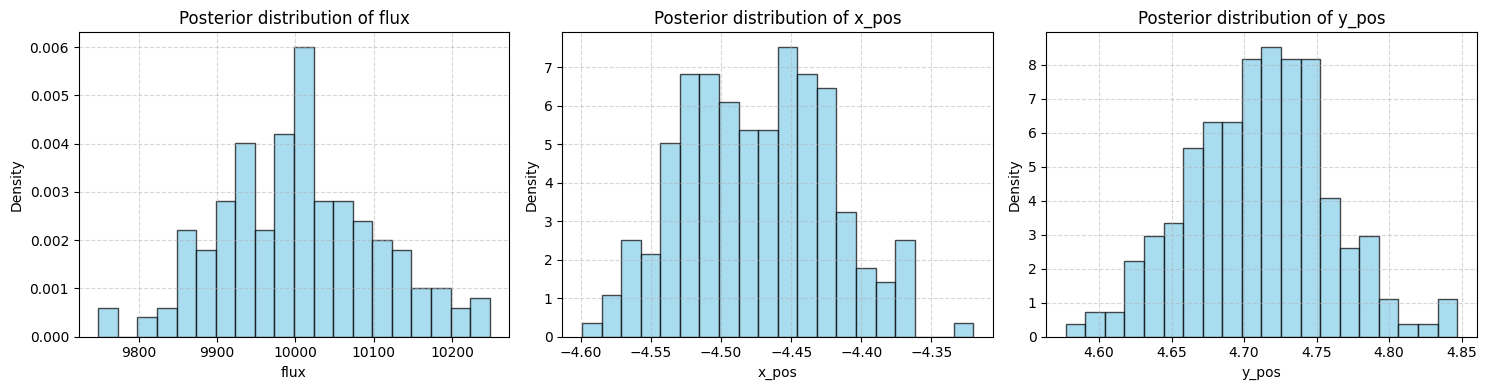

sample: 100%|██████████| 400/400 [00:15<00:00, 25.64it/s, 3 steps of size 7.82e-01. acc. prob=0.89] 


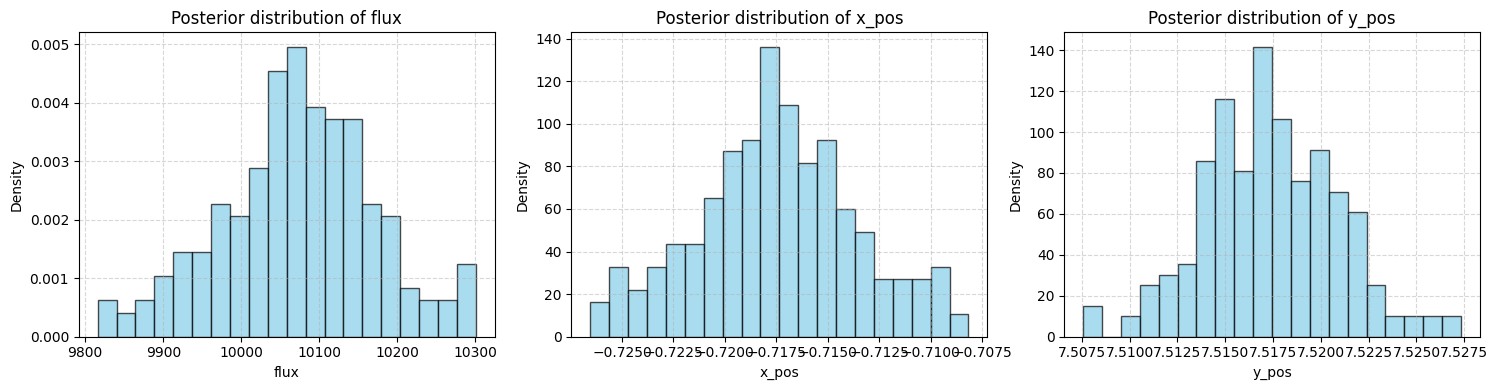

sample: 100%|██████████| 400/400 [00:14<00:00, 27.02it/s, 7 steps of size 6.76e-01. acc. prob=0.91] 


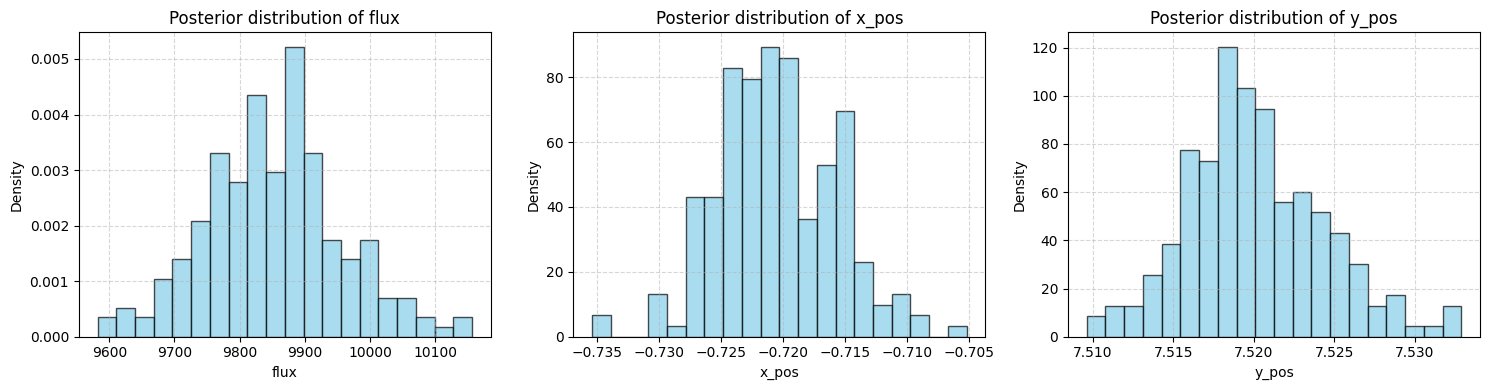

sample: 100%|██████████| 400/400 [00:13<00:00, 29.83it/s, 7 steps of size 8.61e-01. acc. prob=0.91] 


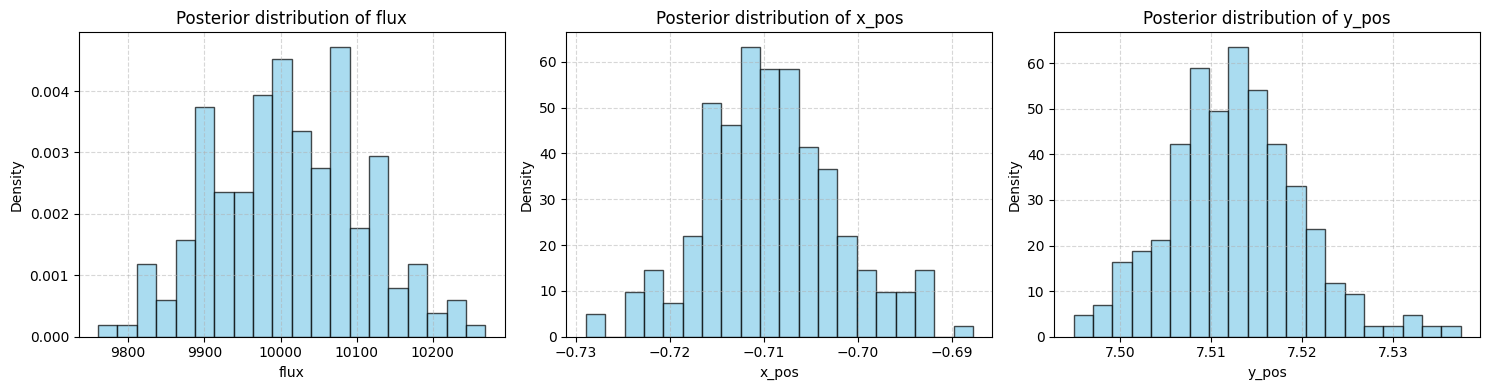

sample: 100%|██████████| 400/400 [00:12<00:00, 32.92it/s, 7 steps of size 6.98e-01. acc. prob=0.91] 


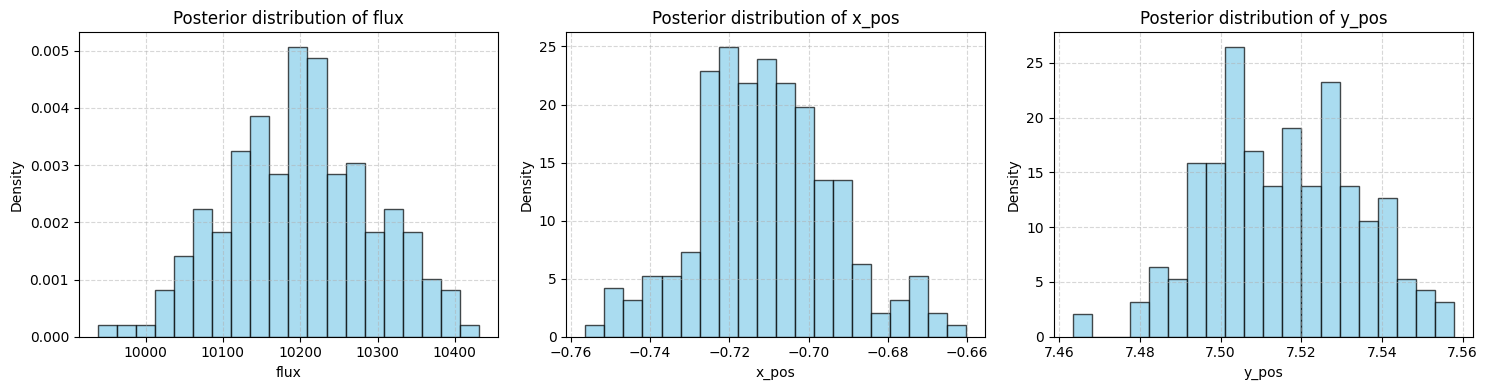

sample: 100%|██████████| 400/400 [00:11<00:00, 34.13it/s, 7 steps of size 7.37e-01. acc. prob=0.91] 


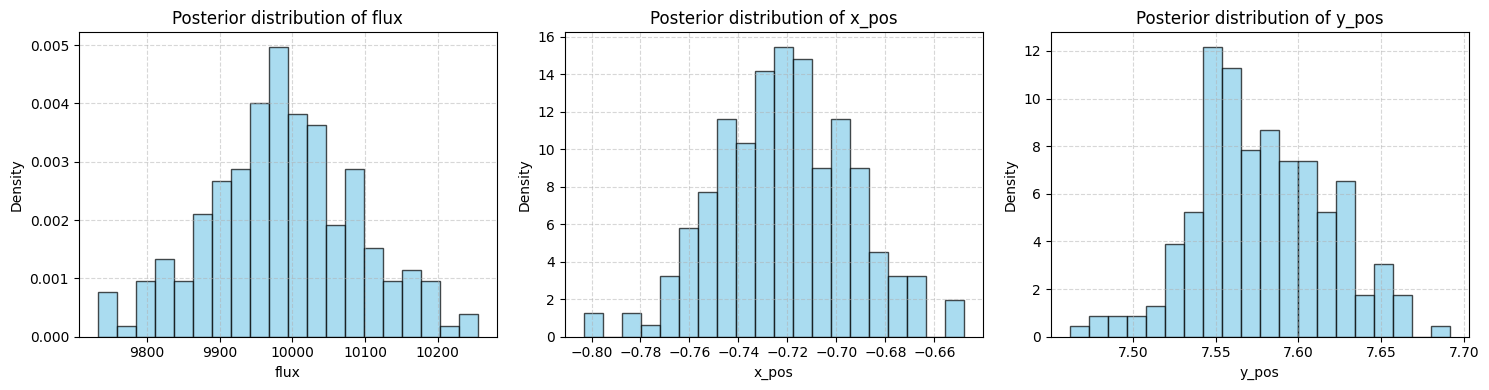

sample: 100%|██████████| 400/400 [00:10<00:00, 37.09it/s, 7 steps of size 6.70e-01. acc. prob=0.89] 


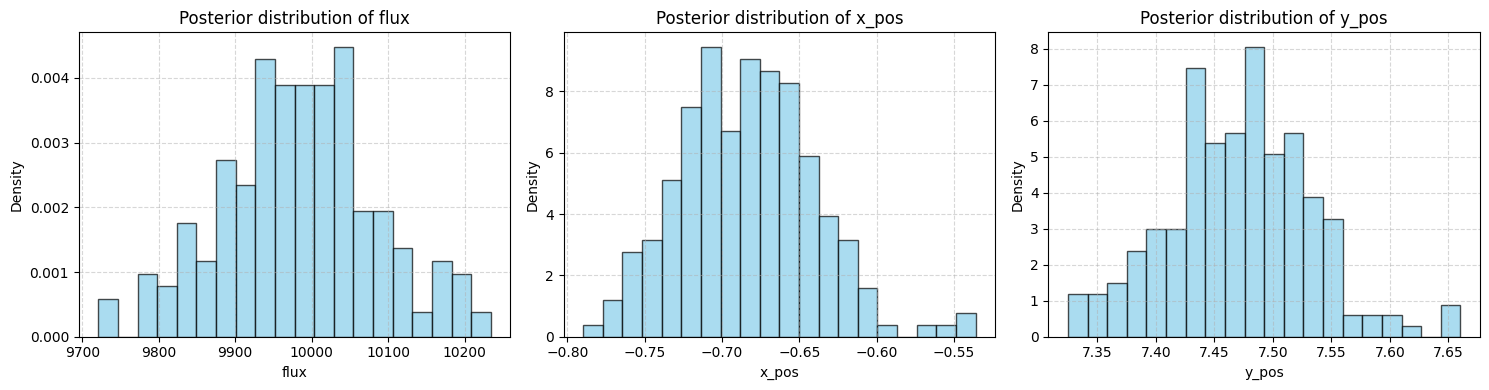

sample: 100%|██████████| 400/400 [00:14<00:00, 26.98it/s, 3 steps of size 8.81e-01. acc. prob=0.90] 


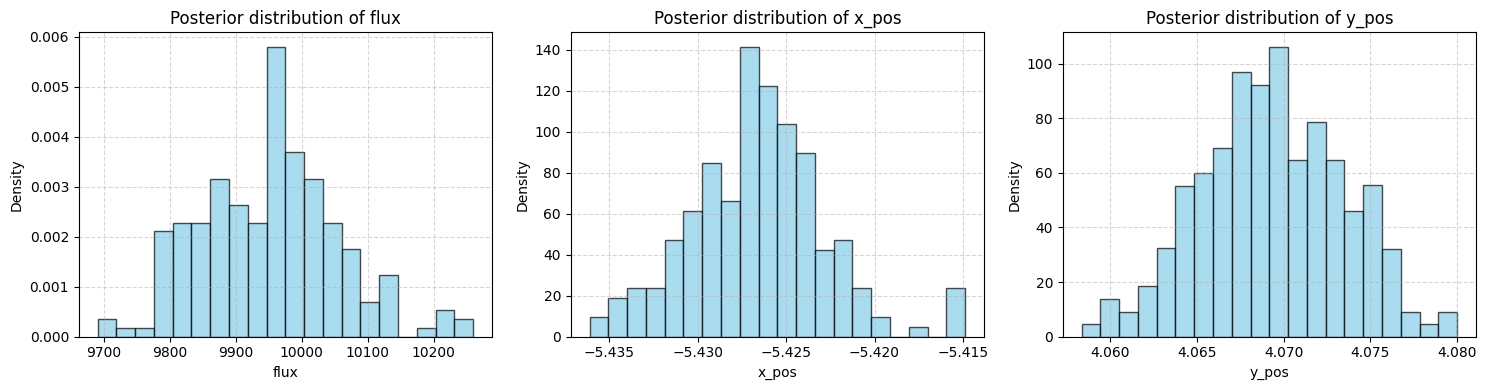

sample: 100%|██████████| 400/400 [00:17<00:00, 22.90it/s, 7 steps of size 6.29e-01. acc. prob=0.94] 


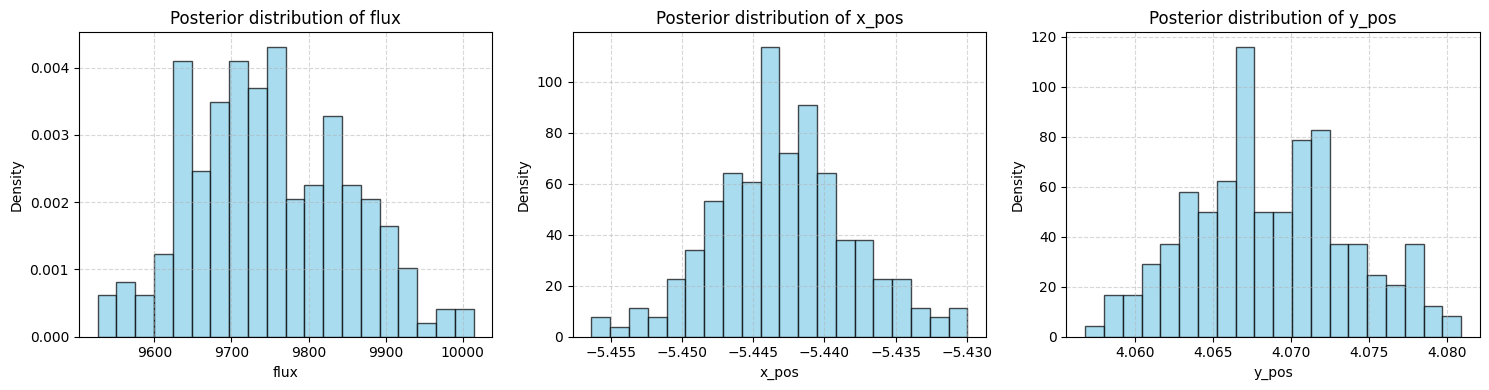

sample: 100%|██████████| 400/400 [00:12<00:00, 31.13it/s, 7 steps of size 7.88e-01. acc. prob=0.93] 


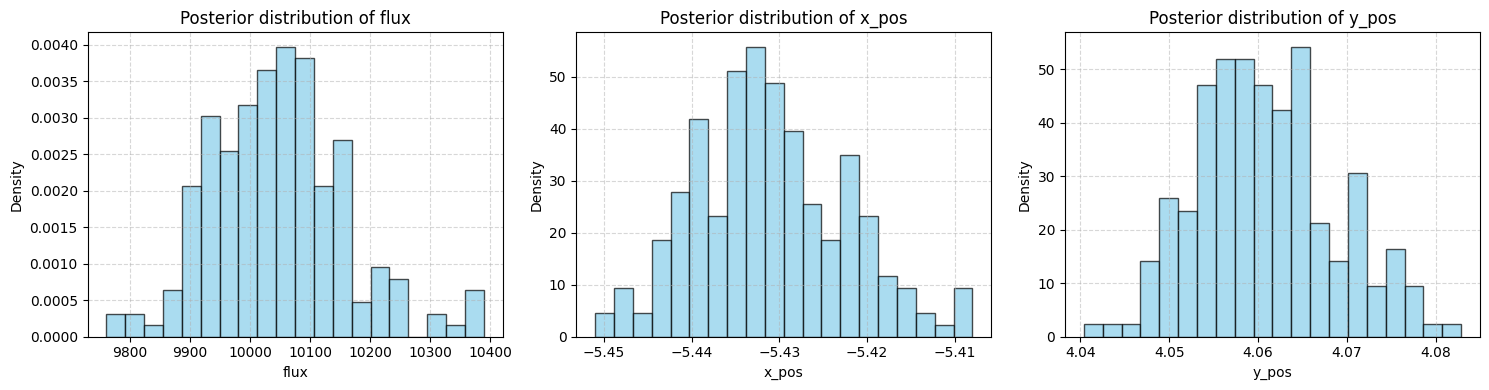

sample: 100%|██████████| 400/400 [00:11<00:00, 35.05it/s, 3 steps of size 7.65e-01. acc. prob=0.92] 


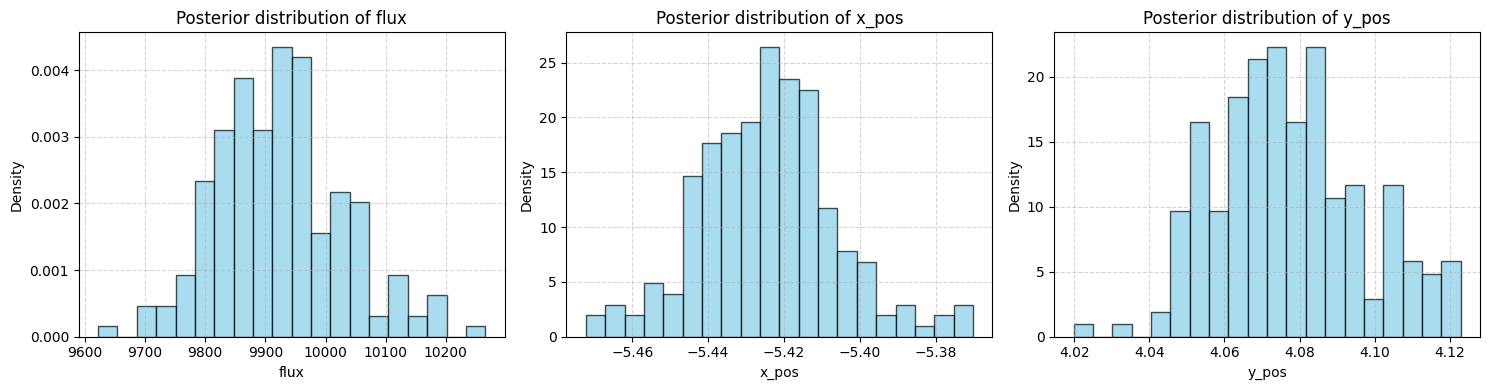

sample: 100%|██████████| 400/400 [00:10<00:00, 37.76it/s, 3 steps of size 8.30e-01. acc. prob=0.92] 


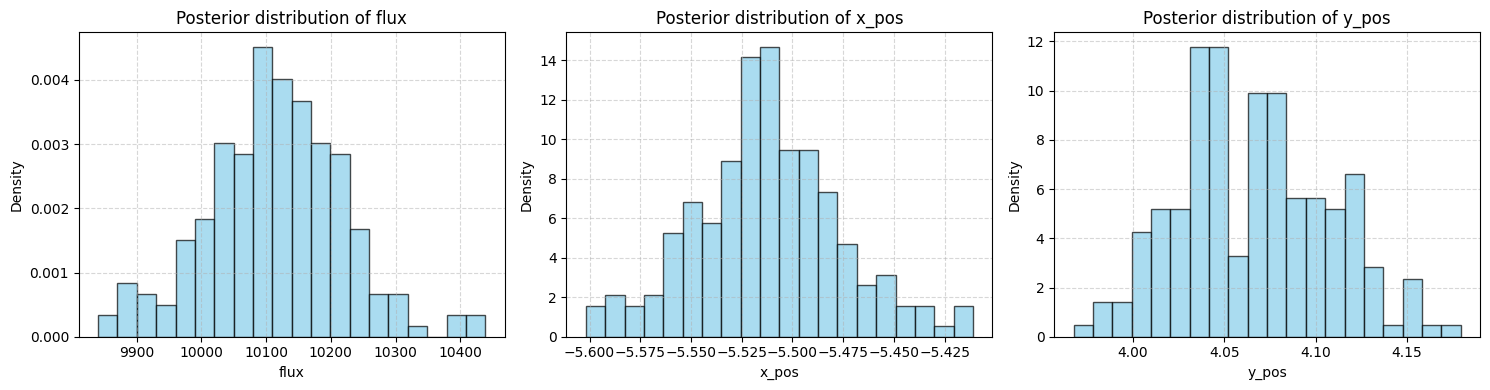

sample: 100%|██████████| 400/400 [00:11<00:00, 34.50it/s, 3 steps of size 6.39e-01. acc. prob=0.93] 


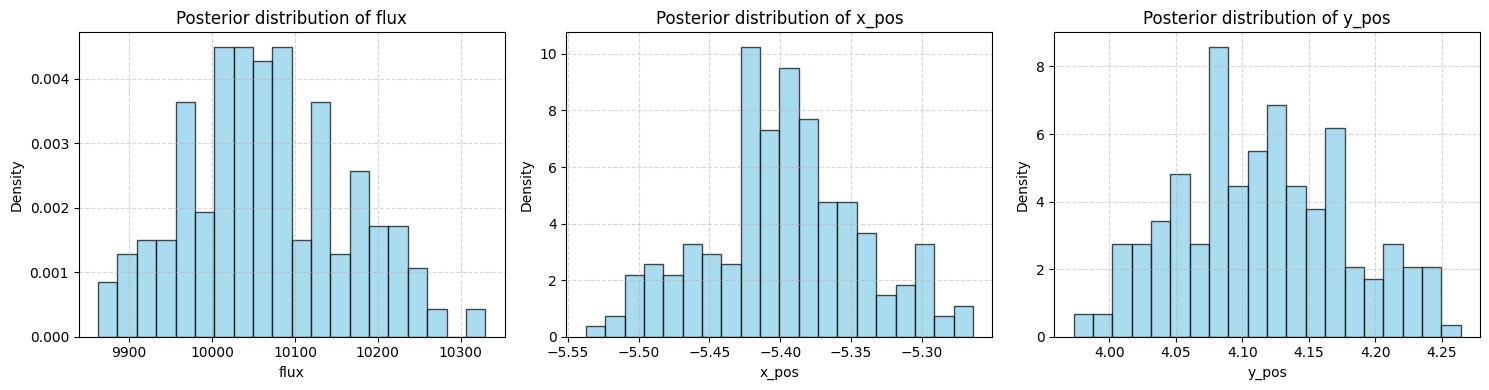

sample: 100%|██████████| 400/400 [00:18<00:00, 21.56it/s, 3 steps of size 8.57e-01. acc. prob=0.92] 


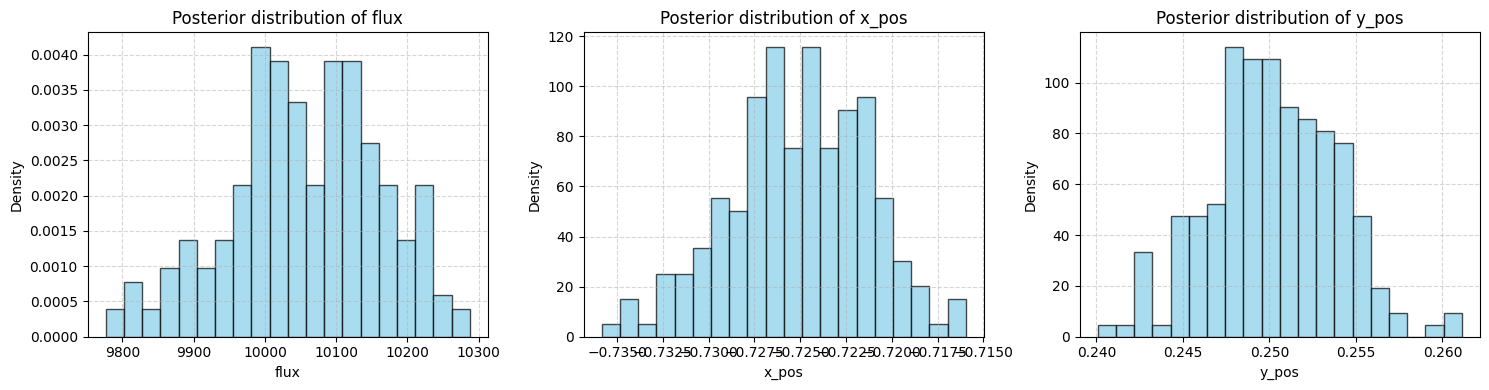

sample: 100%|██████████| 400/400 [00:15<00:00, 25.11it/s, 7 steps of size 9.04e-01. acc. prob=0.91] 


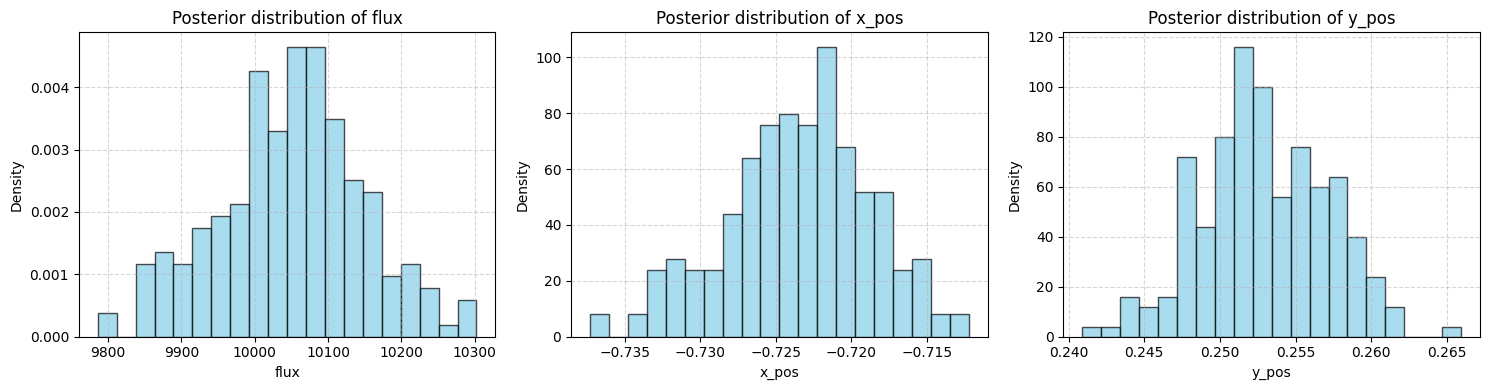

sample: 100%|██████████| 400/400 [00:12<00:00, 31.32it/s, 7 steps of size 7.94e-01. acc. prob=0.90] 


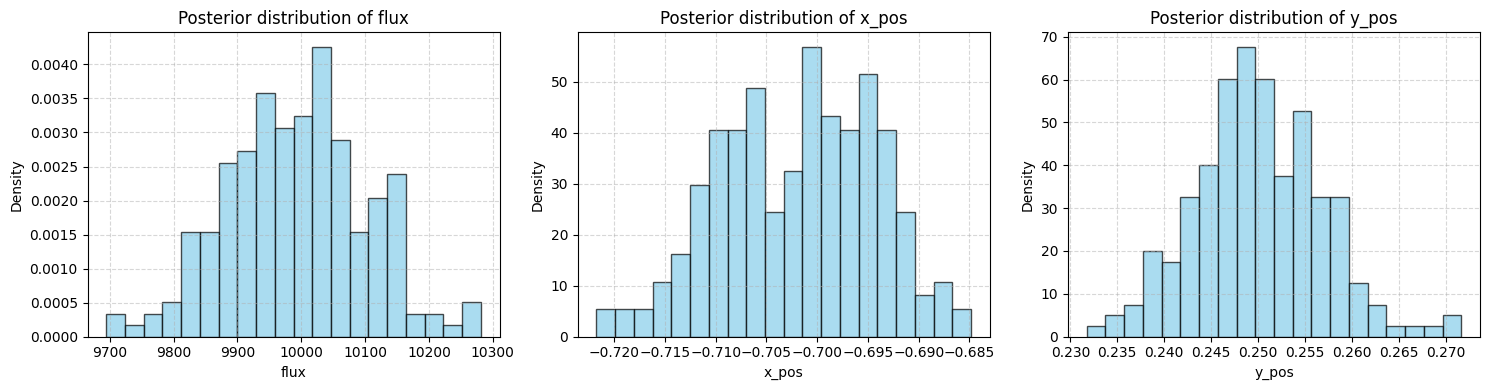

sample: 100%|██████████| 400/400 [00:12<00:00, 31.77it/s, 7 steps of size 8.46e-01. acc. prob=0.93] 


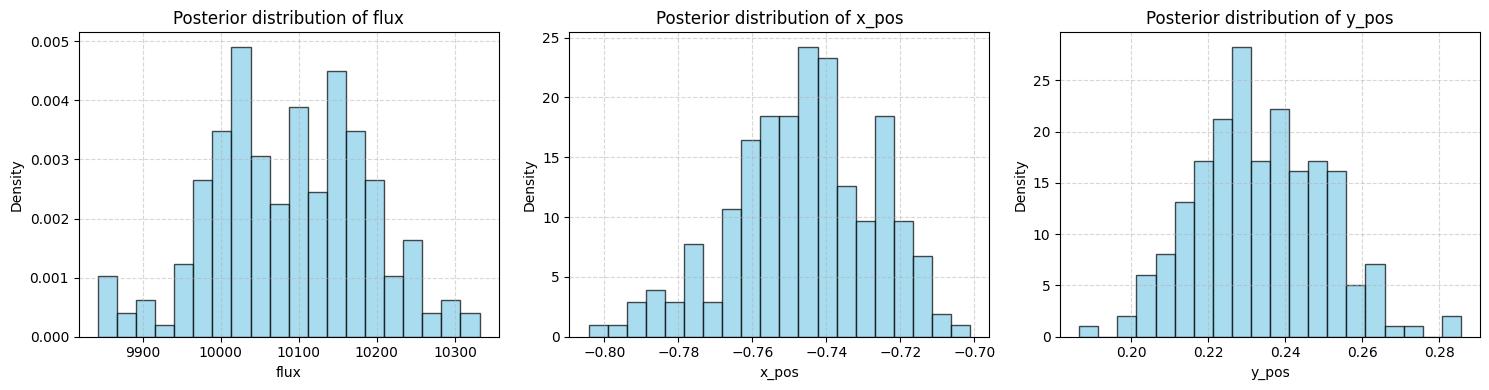

sample: 100%|██████████| 400/400 [00:11<00:00, 34.80it/s, 7 steps of size 7.86e-01. acc. prob=0.91] 


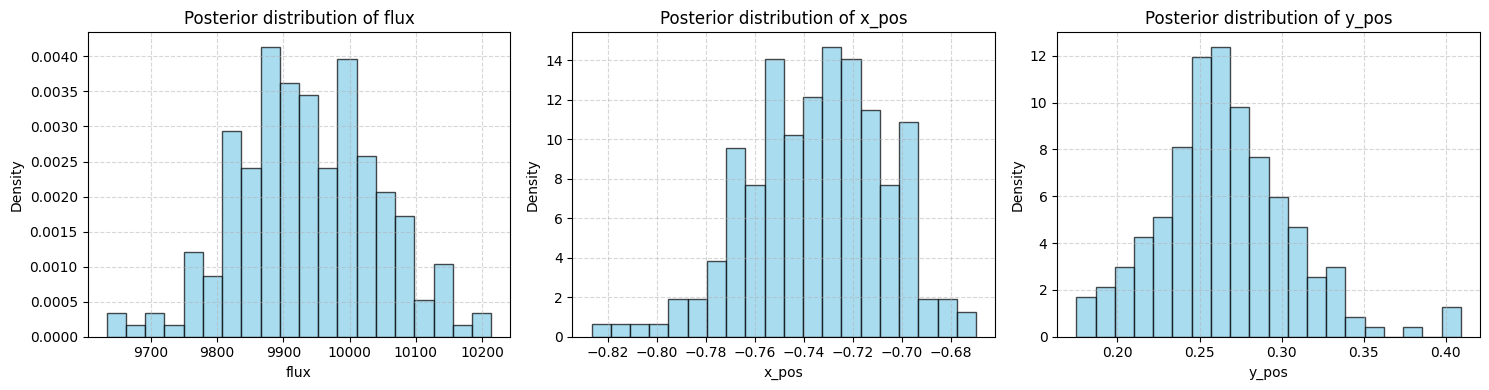

sample: 100%|██████████| 400/400 [00:10<00:00, 36.54it/s, 3 steps of size 7.29e-01. acc. prob=0.88] 


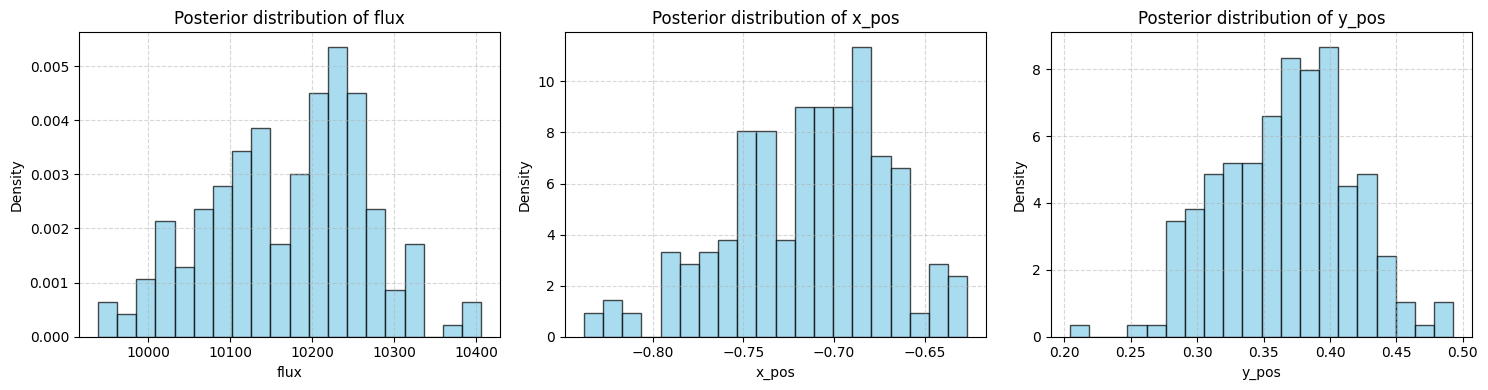

sample: 100%|██████████| 400/400 [00:15<00:00, 25.36it/s, 3 steps of size 8.33e-01. acc. prob=0.88] 


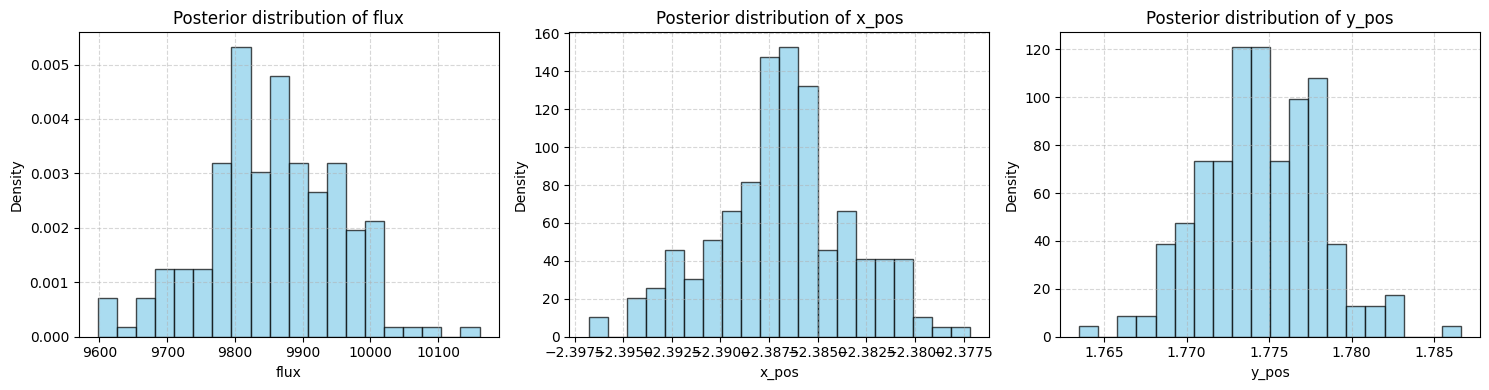

sample: 100%|██████████| 400/400 [00:15<00:00, 25.37it/s, 3 steps of size 7.54e-01. acc. prob=0.91] 


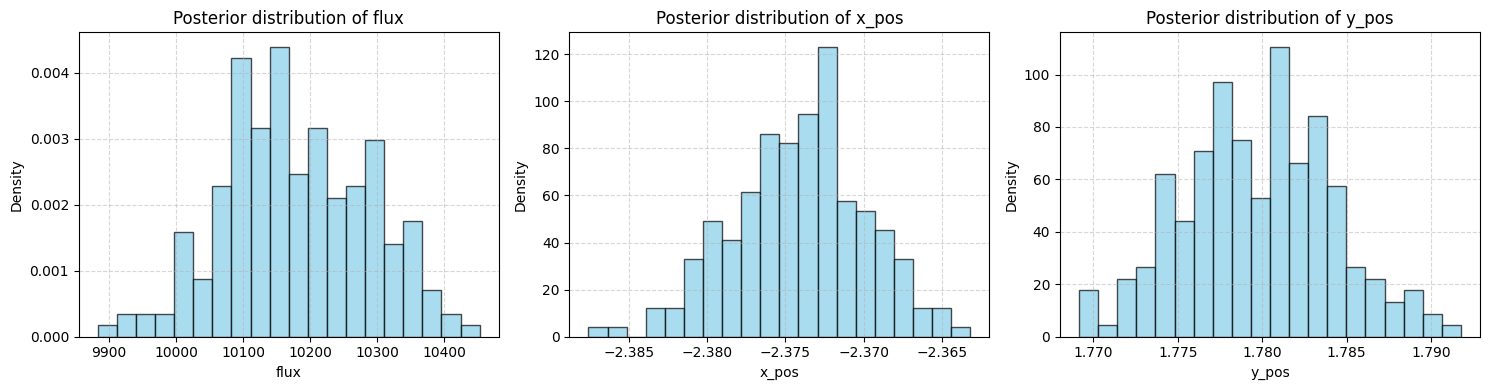

sample: 100%|██████████| 400/400 [00:13<00:00, 29.55it/s, 3 steps of size 8.52e-01. acc. prob=0.90] 


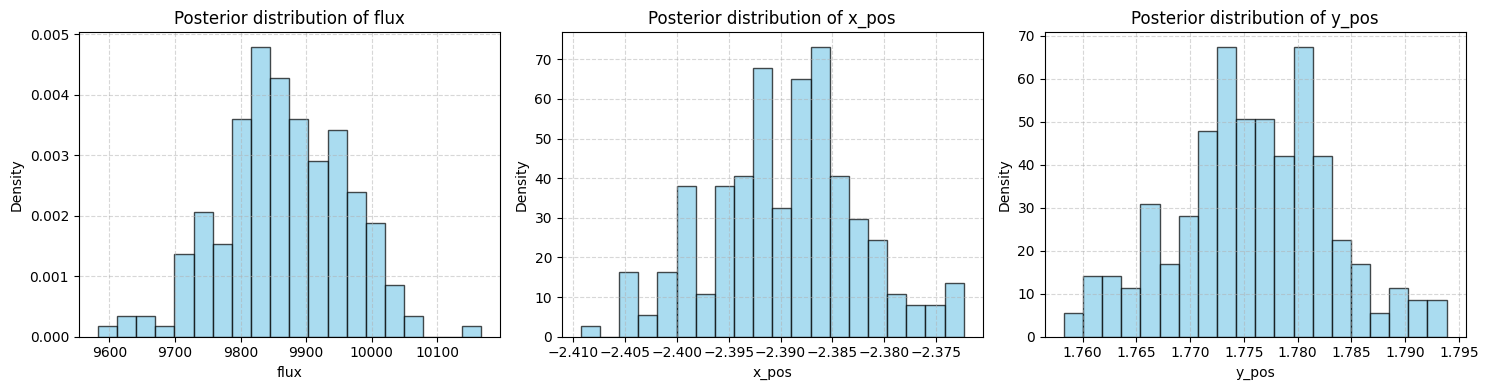

sample: 100%|██████████| 400/400 [00:13<00:00, 29.64it/s, 7 steps of size 6.67e-01. acc. prob=0.91] 


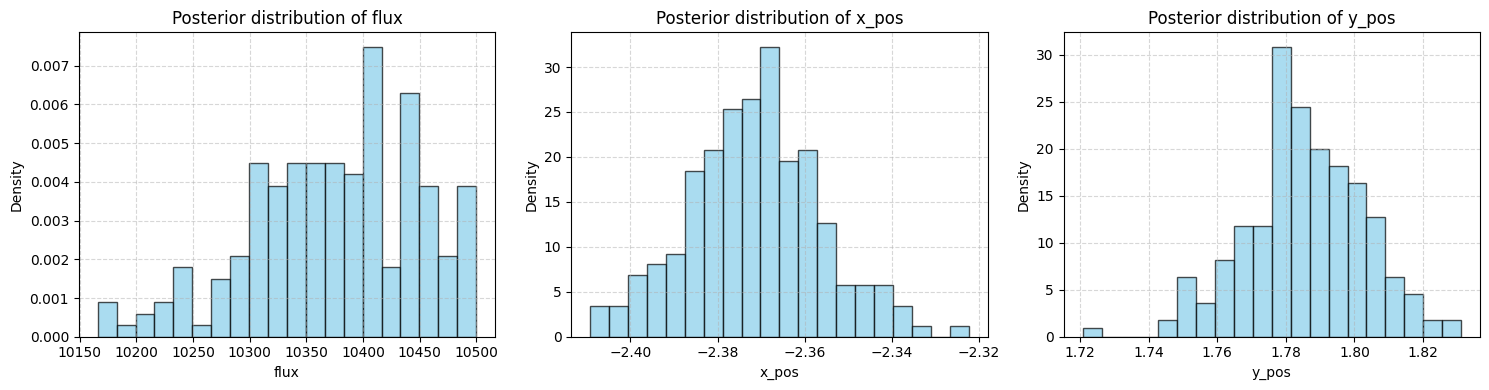

sample: 100%|██████████| 400/400 [00:11<00:00, 34.93it/s, 7 steps of size 7.80e-01. acc. prob=0.90] 


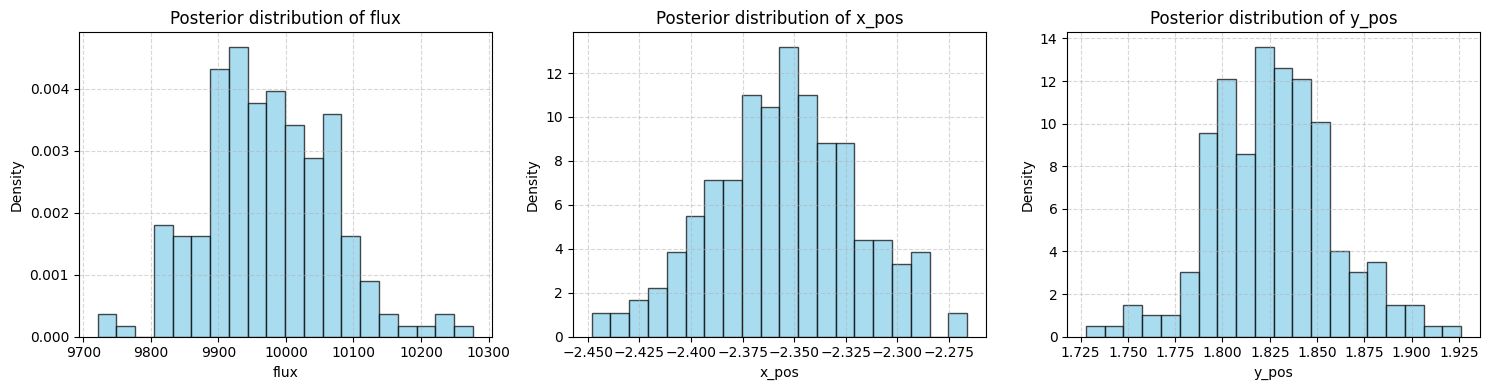

sample: 100%|██████████| 400/400 [00:11<00:00, 33.44it/s, 7 steps of size 6.63e-01. acc. prob=0.92] 


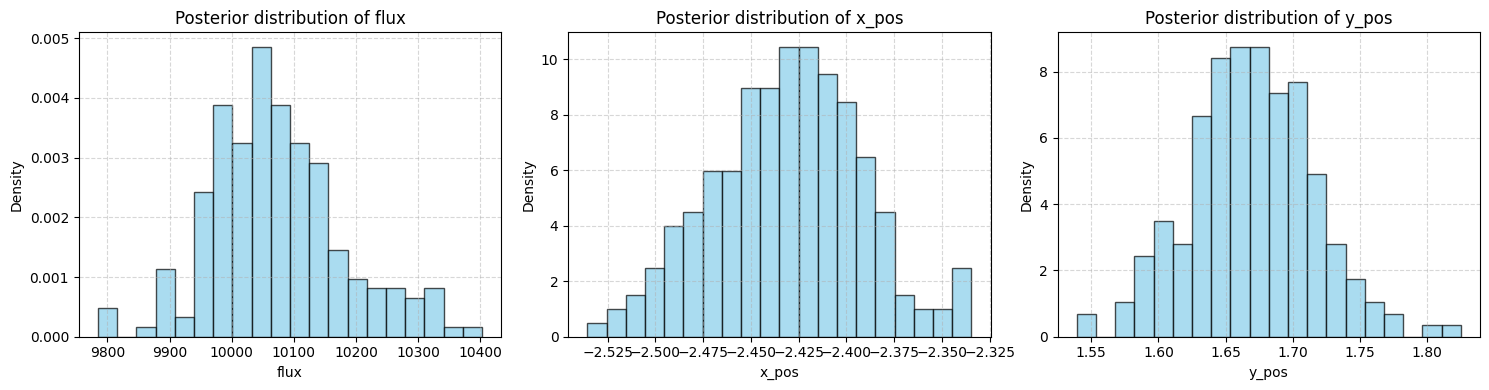

sample: 100%|██████████| 400/400 [00:17<00:00, 22.68it/s, 7 steps of size 9.38e-01. acc. prob=0.89] 


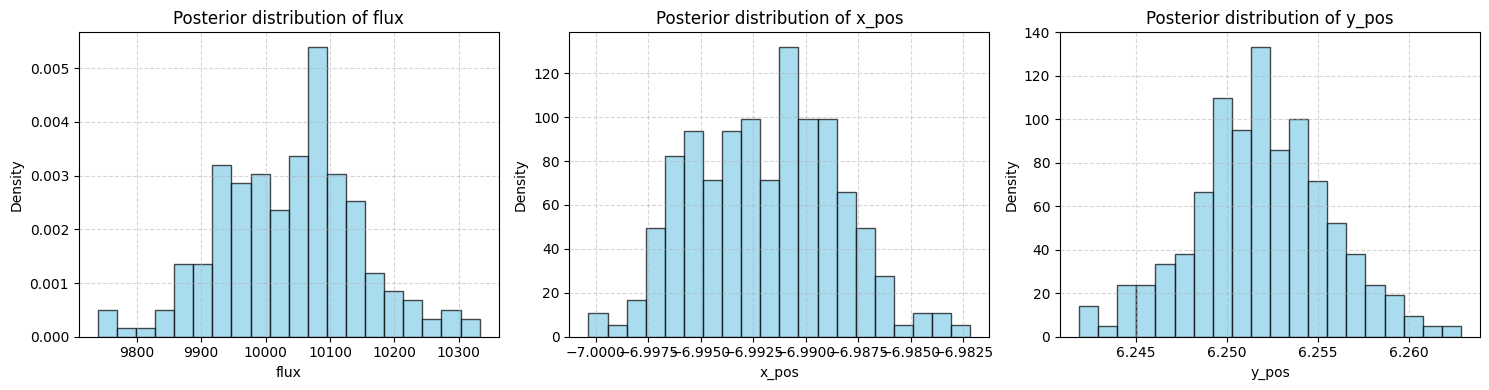

sample: 100%|██████████| 400/400 [00:14<00:00, 27.31it/s, 3 steps of size 9.18e-01. acc. prob=0.89] 


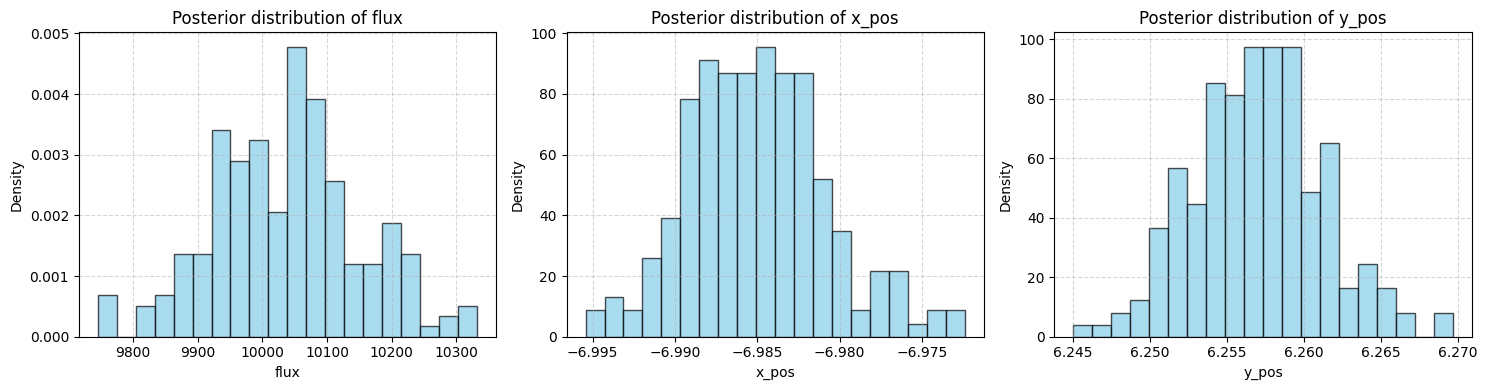

sample: 100%|██████████| 400/400 [00:13<00:00, 28.86it/s, 7 steps of size 8.28e-01. acc. prob=0.91] 


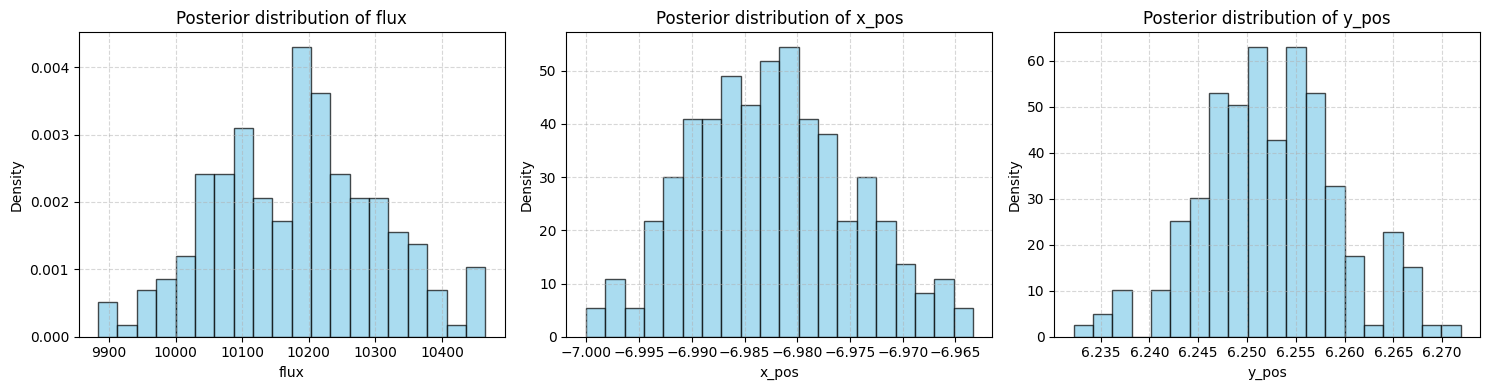

sample: 100%|██████████| 400/400 [00:10<00:00, 39.36it/s, 3 steps of size 9.82e-01. acc. prob=0.87] 


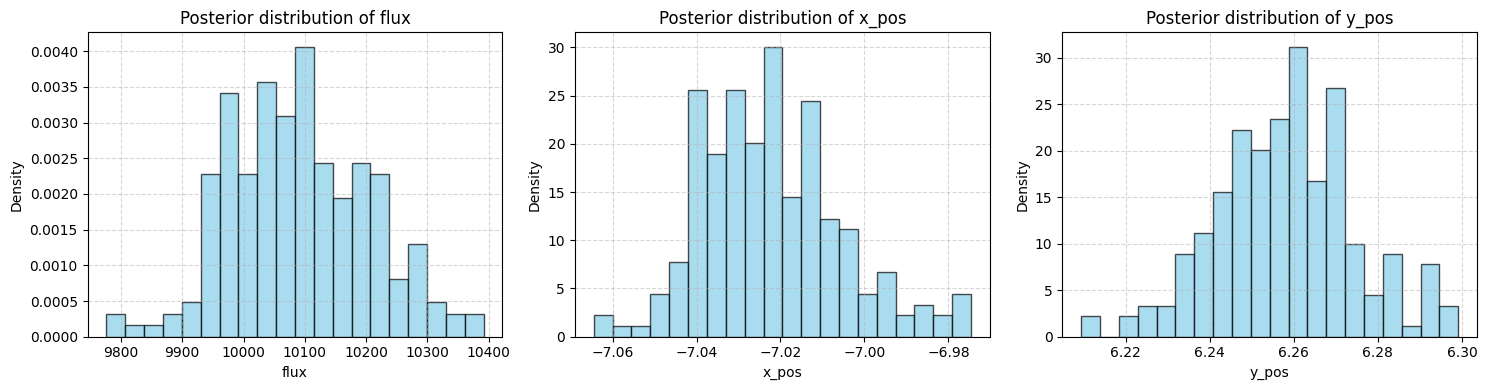

sample: 100%|██████████| 400/400 [00:11<00:00, 35.65it/s, 7 steps of size 8.56e-01. acc. prob=0.91] 


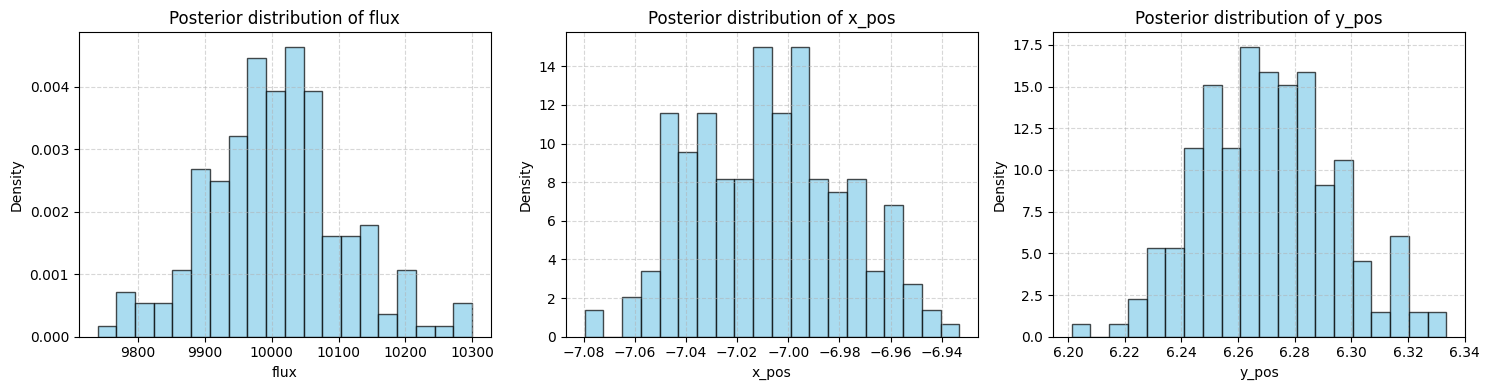

sample: 100%|██████████| 400/400 [00:10<00:00, 37.62it/s, 3 steps of size 9.05e-01. acc. prob=0.92] 


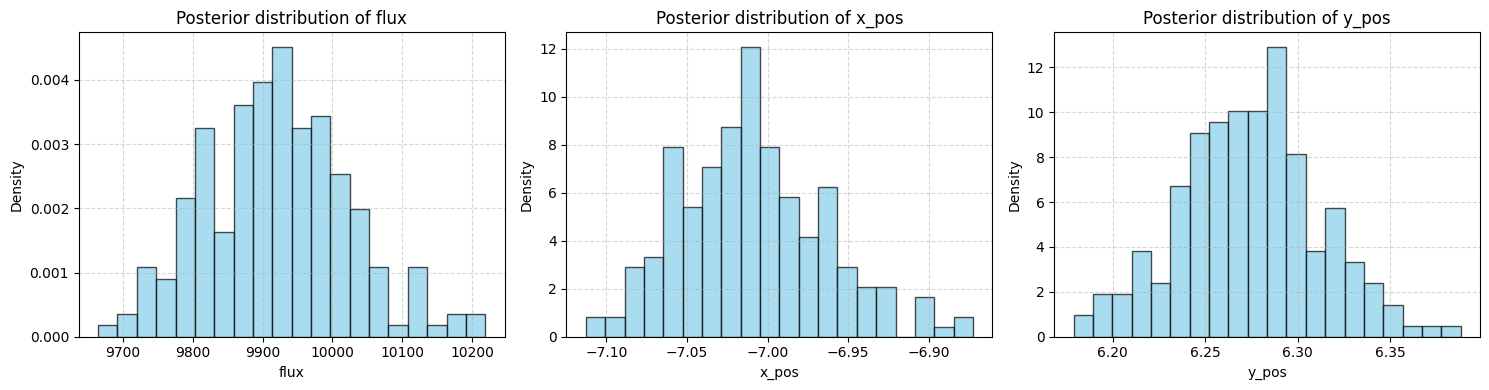

sample: 100%|██████████| 400/400 [00:14<00:00, 27.60it/s, 3 steps of size 8.14e-01. acc. prob=0.90] 


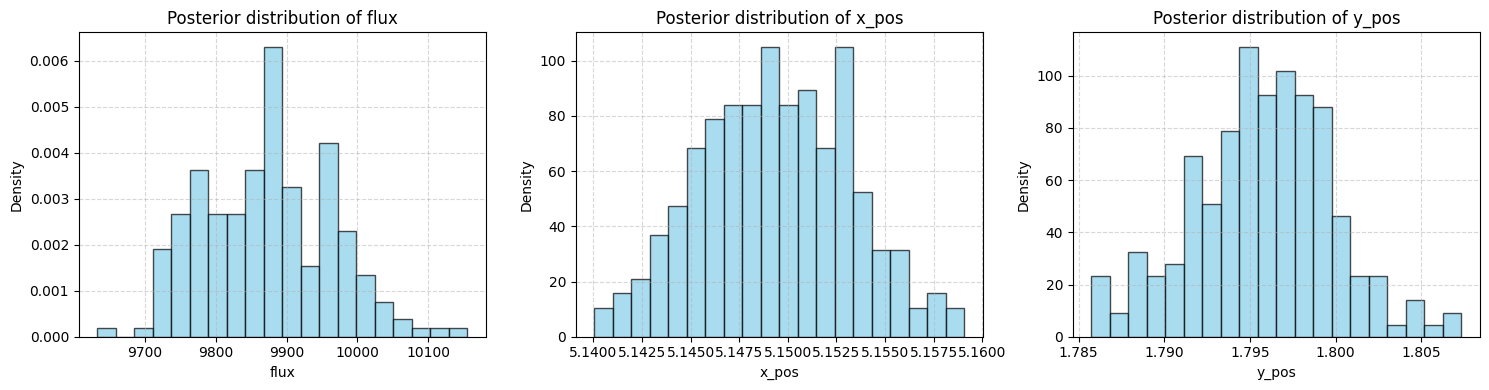

sample: 100%|██████████| 400/400 [00:12<00:00, 30.97it/s, 3 steps of size 9.14e-01. acc. prob=0.88] 


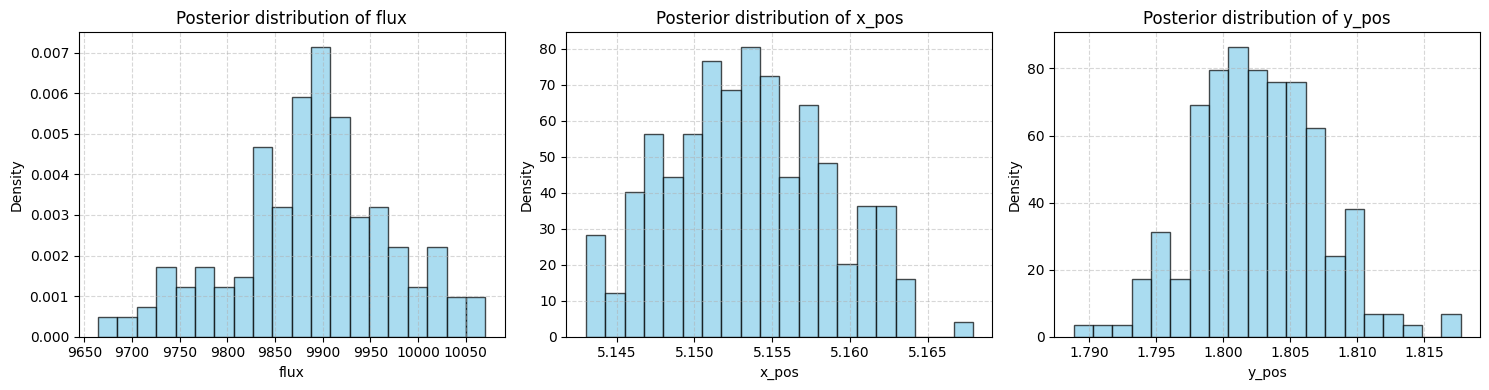

sample: 100%|██████████| 400/400 [00:13<00:00, 30.60it/s, 7 steps of size 6.23e-01. acc. prob=0.93] 


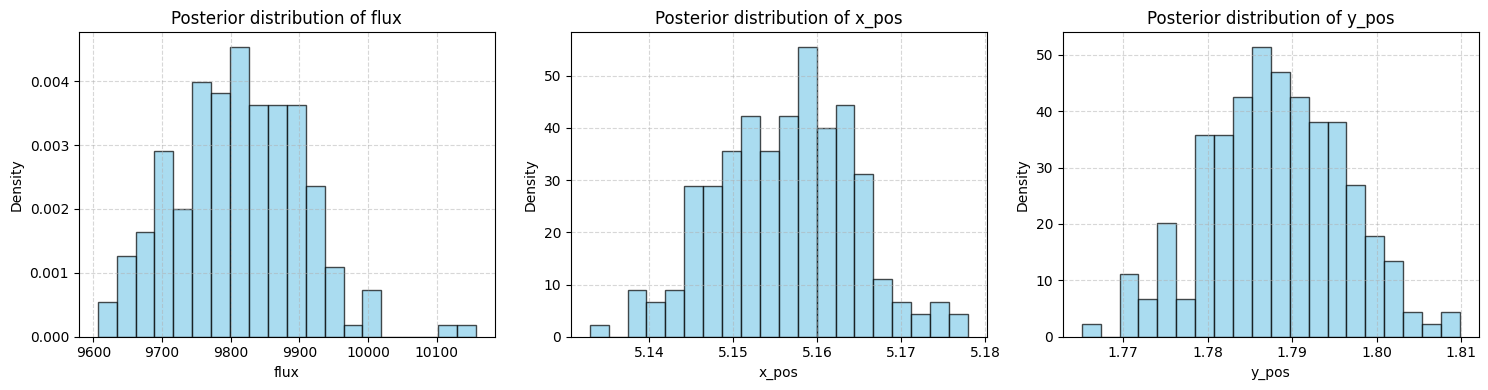

sample: 100%|██████████| 400/400 [00:11<00:00, 35.62it/s, 3 steps of size 9.23e-01. acc. prob=0.90] 


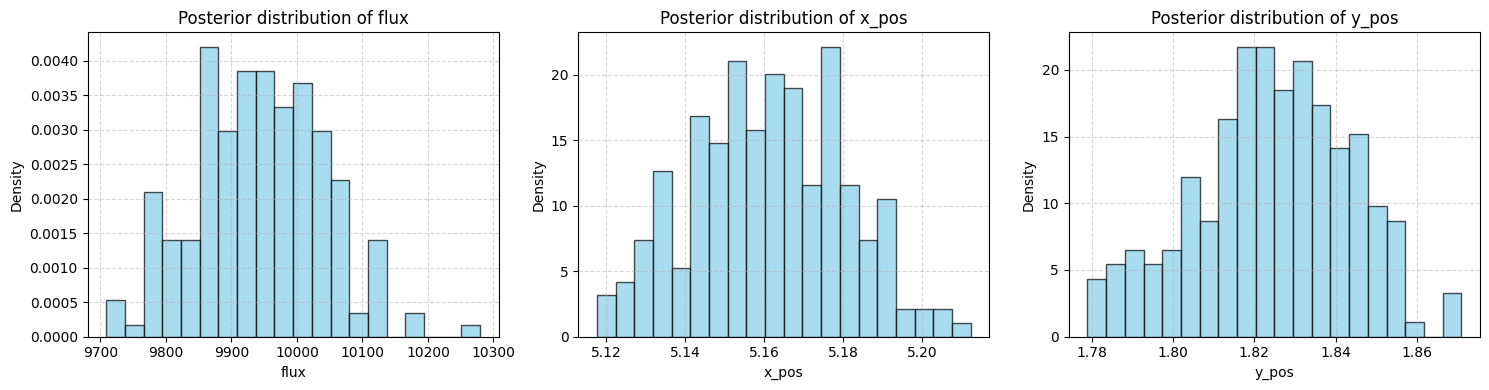

sample: 100%|██████████| 400/400 [00:10<00:00, 37.75it/s, 3 steps of size 8.34e-01. acc. prob=0.91] 


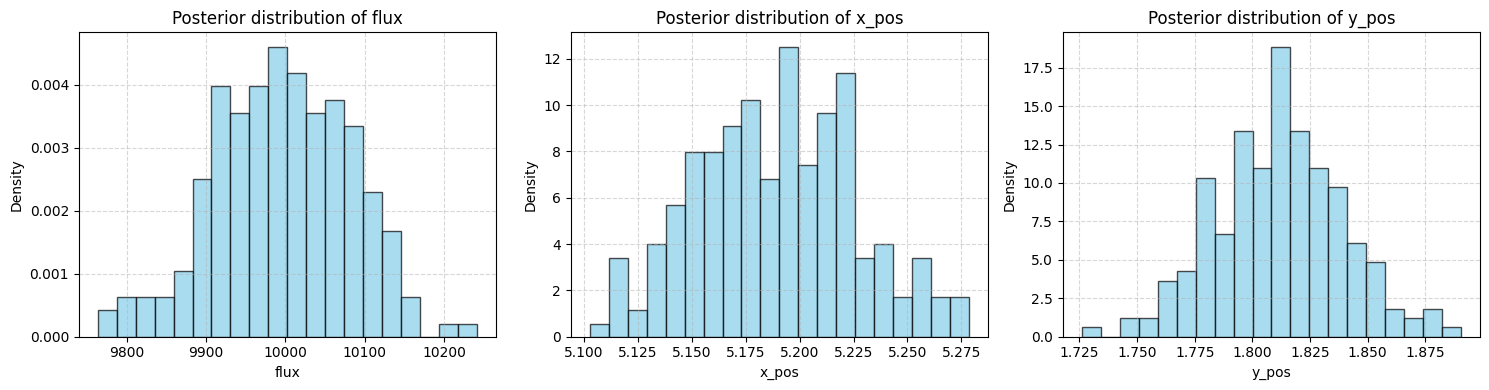

sample: 100%|██████████| 400/400 [00:10<00:00, 38.58it/s, 3 steps of size 7.56e-01. acc. prob=0.91] 


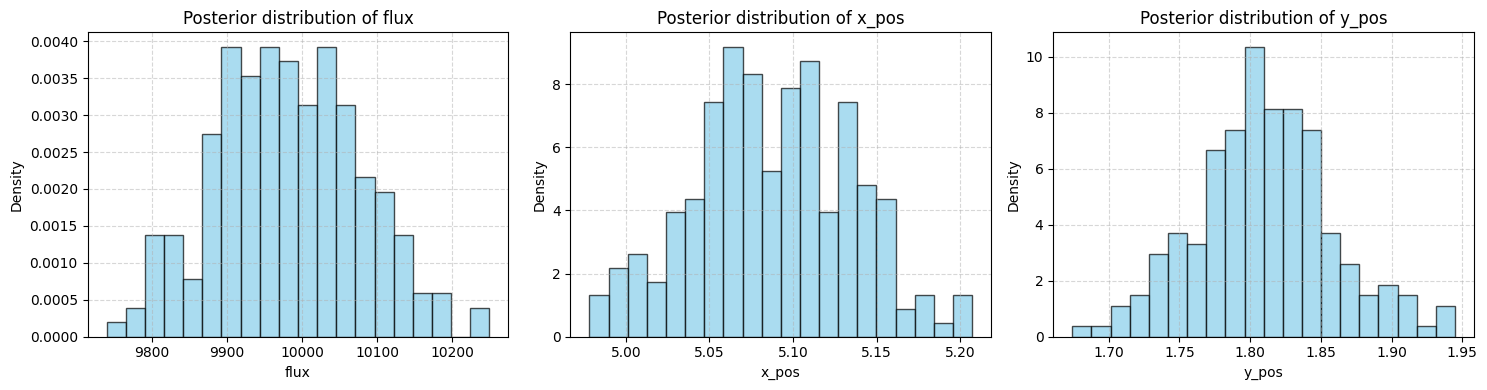

sample: 100%|██████████| 400/400 [00:14<00:00, 27.44it/s, 7 steps of size 7.92e-01. acc. prob=0.94] 


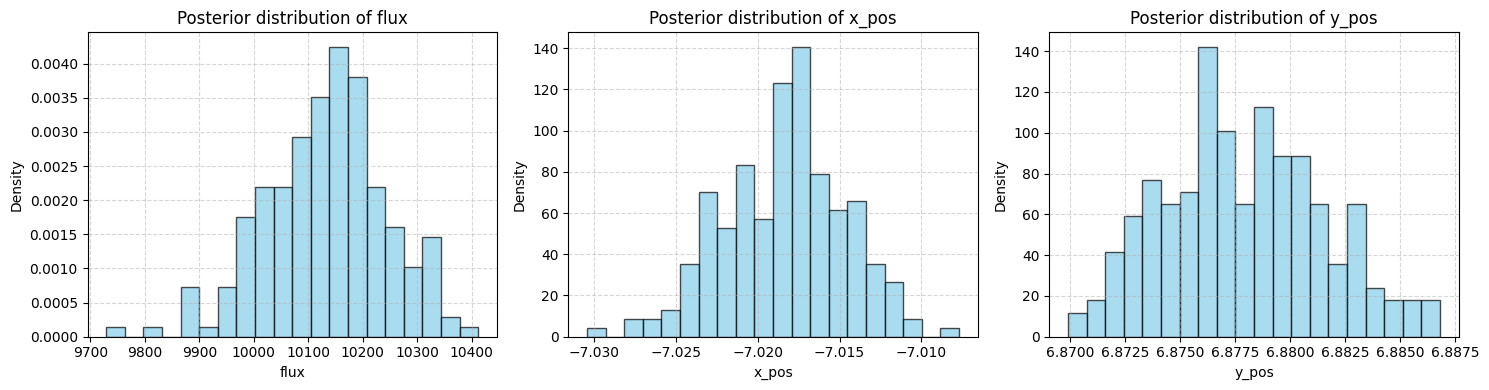

sample: 100%|██████████| 400/400 [00:15<00:00, 26.06it/s, 7 steps of size 8.45e-01. acc. prob=0.93] 


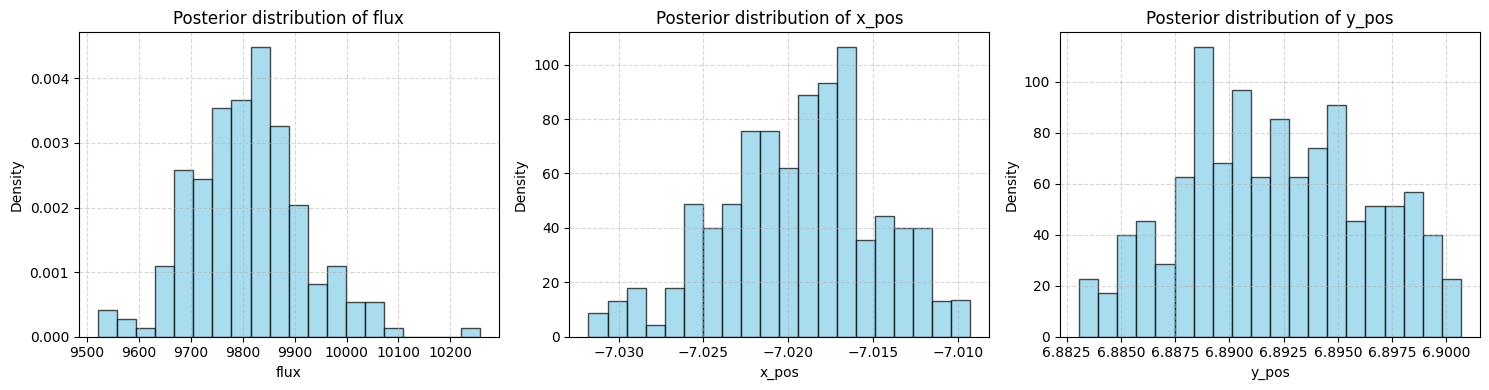

sample: 100%|██████████| 400/400 [00:13<00:00, 29.90it/s, 3 steps of size 7.46e-01. acc. prob=0.94] 


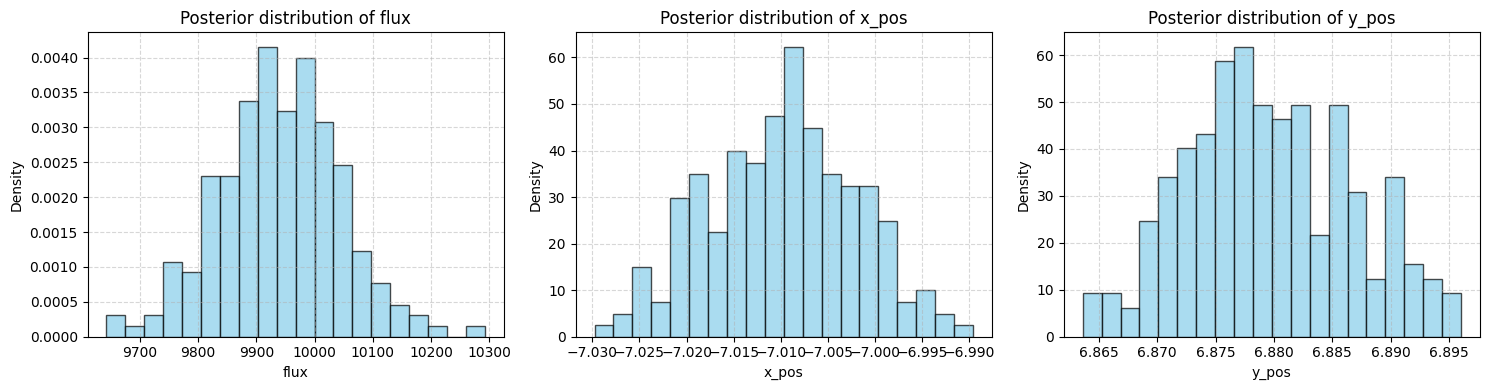

sample: 100%|██████████| 400/400 [00:11<00:00, 33.94it/s, 7 steps of size 9.37e-01. acc. prob=0.92] 


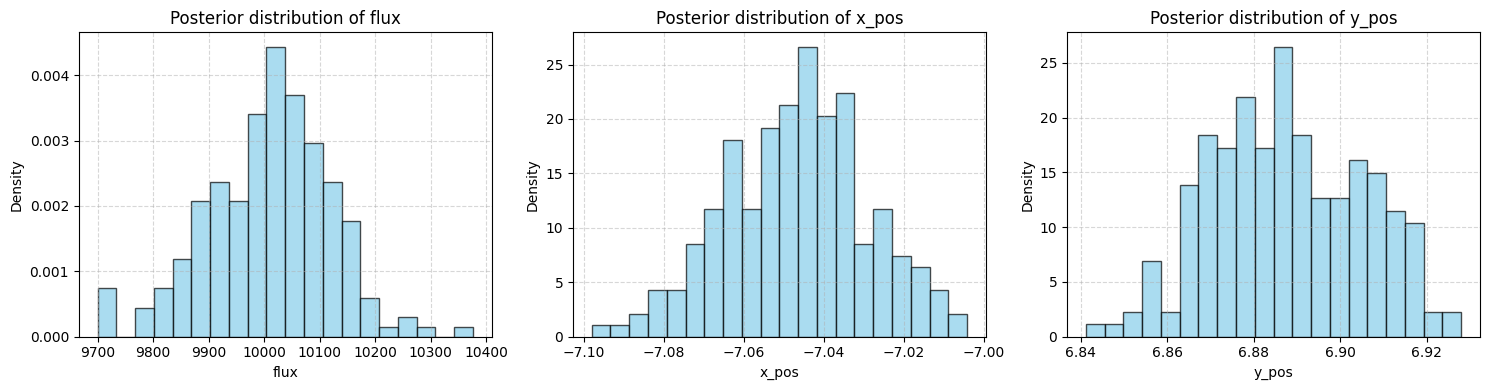

sample: 100%|██████████| 400/400 [00:11<00:00, 34.83it/s, 7 steps of size 8.67e-01. acc. prob=0.93] 


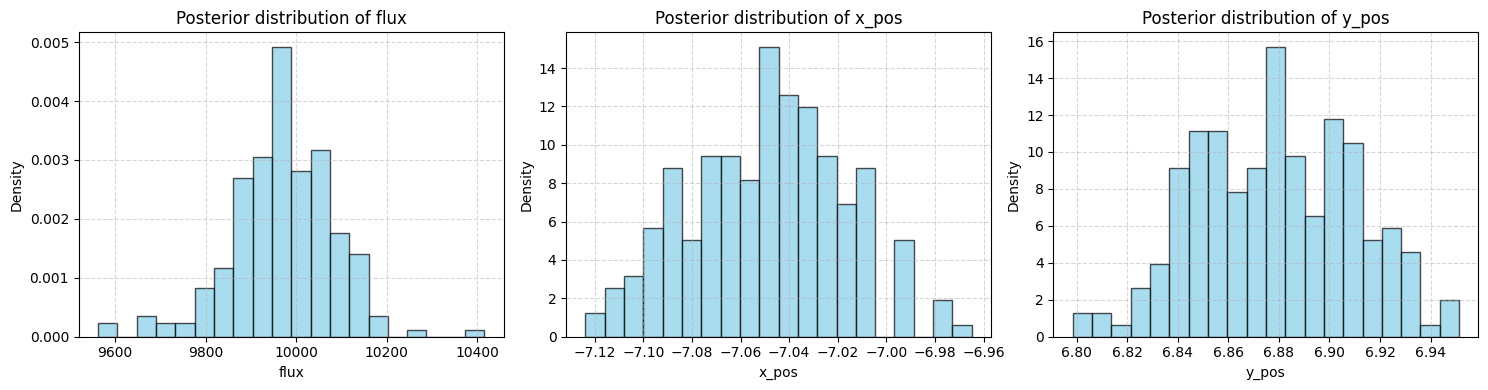

sample: 100%|██████████| 400/400 [00:10<00:00, 36.58it/s, 3 steps of size 7.48e-01. acc. prob=0.92] 


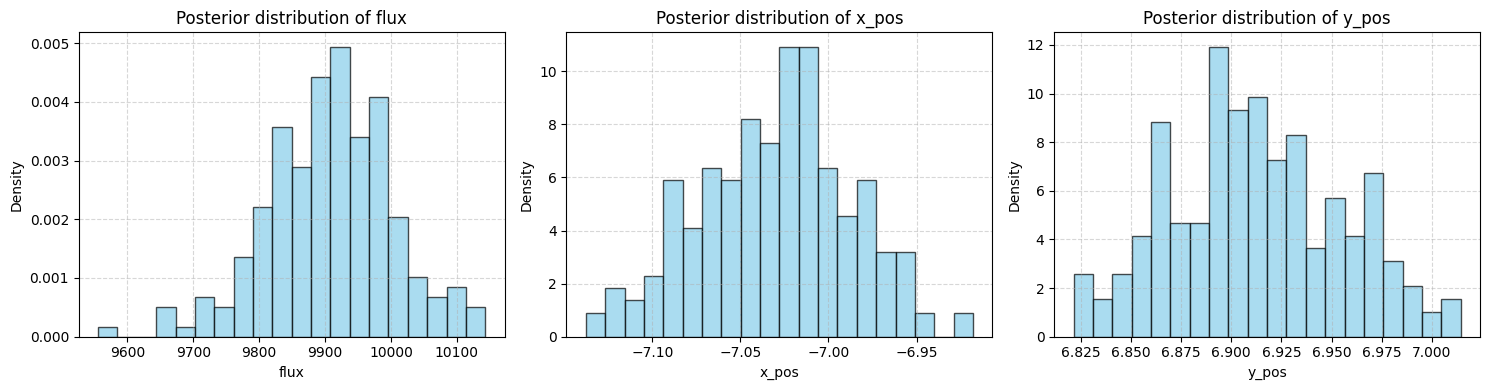

sample: 100%|██████████| 400/400 [00:14<00:00, 27.34it/s, 1 steps of size 9.21e-01. acc. prob=0.88] 


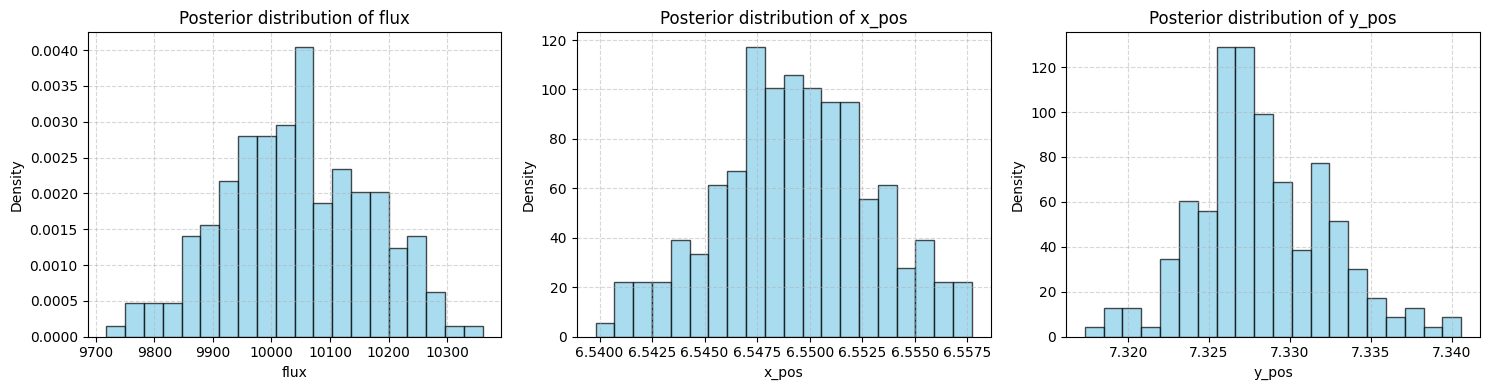

sample: 100%|██████████| 400/400 [00:13<00:00, 29.62it/s, 1 steps of size 1.05e+00. acc. prob=0.87] 


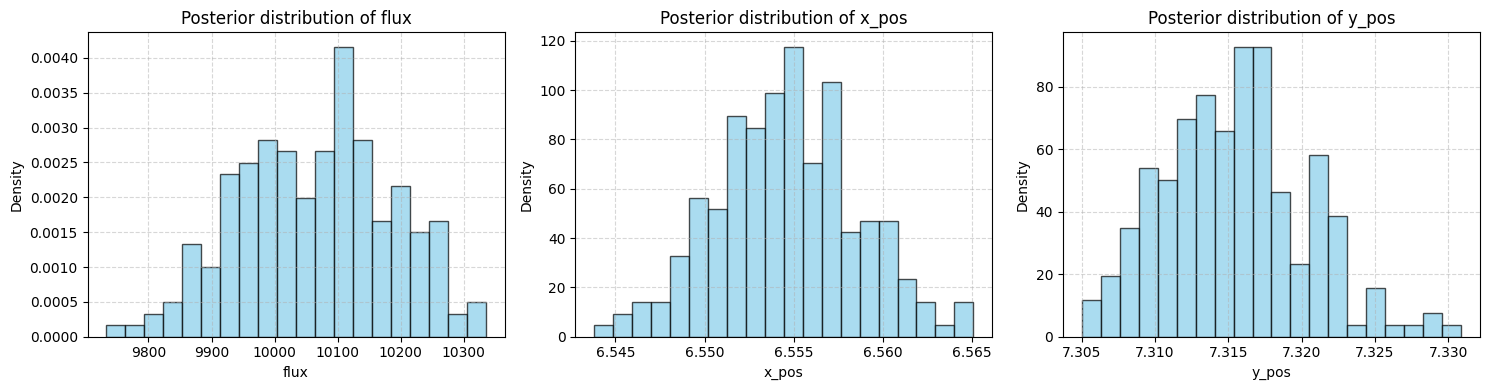

sample: 100%|██████████| 400/400 [00:12<00:00, 32.59it/s, 7 steps of size 9.56e-01. acc. prob=0.87] 


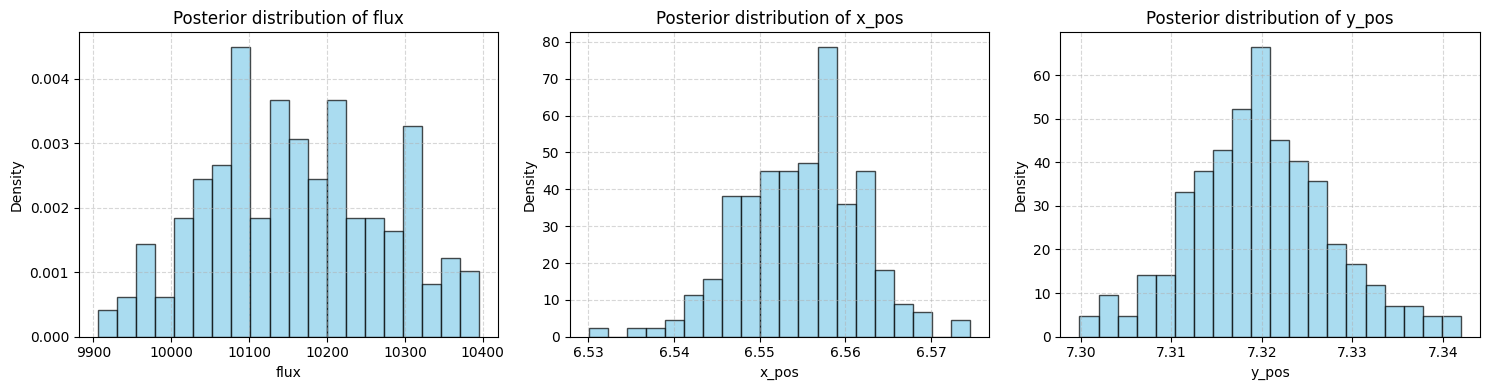

sample: 100%|██████████| 400/400 [00:10<00:00, 38.14it/s, 1 steps of size 1.08e+00. acc. prob=0.87] 


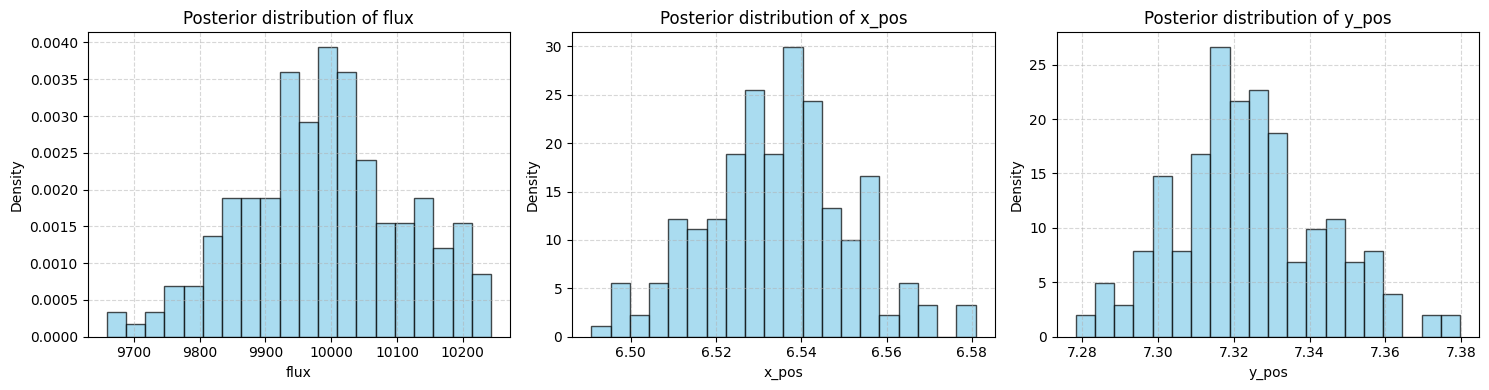

sample: 100%|██████████| 400/400 [00:10<00:00, 38.87it/s, 3 steps of size 8.47e-01. acc. prob=0.89] 


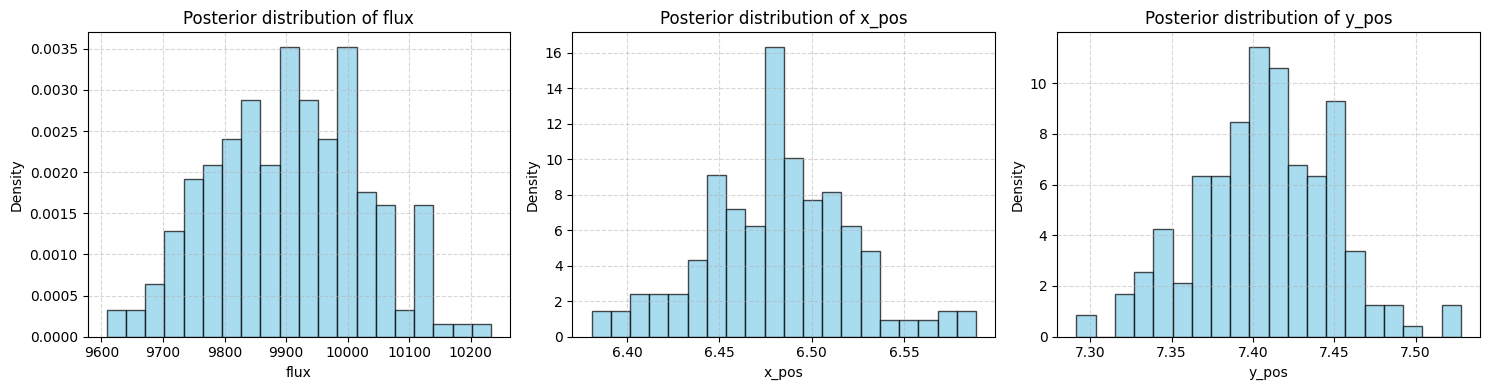

sample: 100%|██████████| 400/400 [00:12<00:00, 32.45it/s, 3 steps of size 6.98e-01. acc. prob=0.92] 


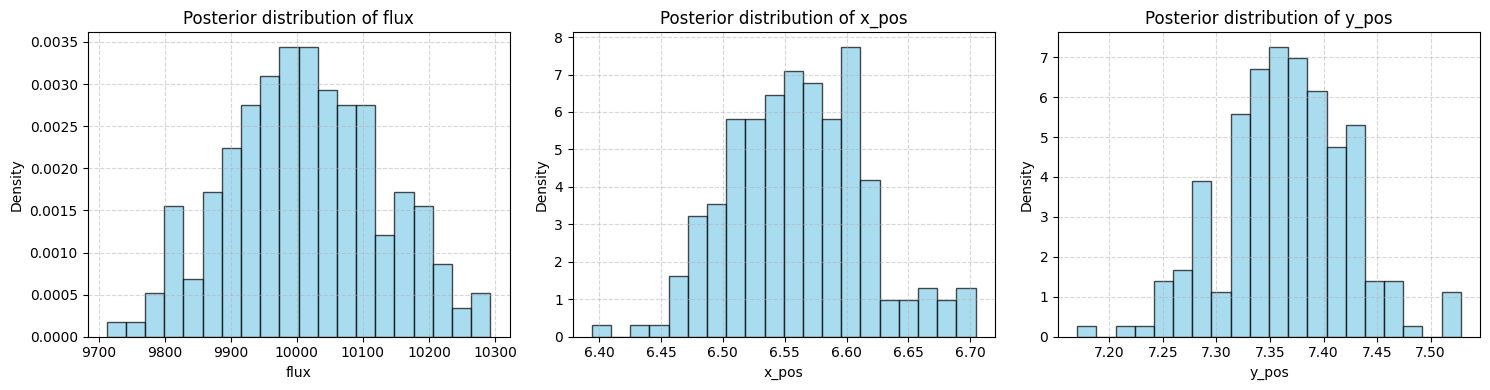

sample: 100%|██████████| 400/400 [00:17<00:00, 22.37it/s, 3 steps of size 9.56e-01. acc. prob=0.90] 


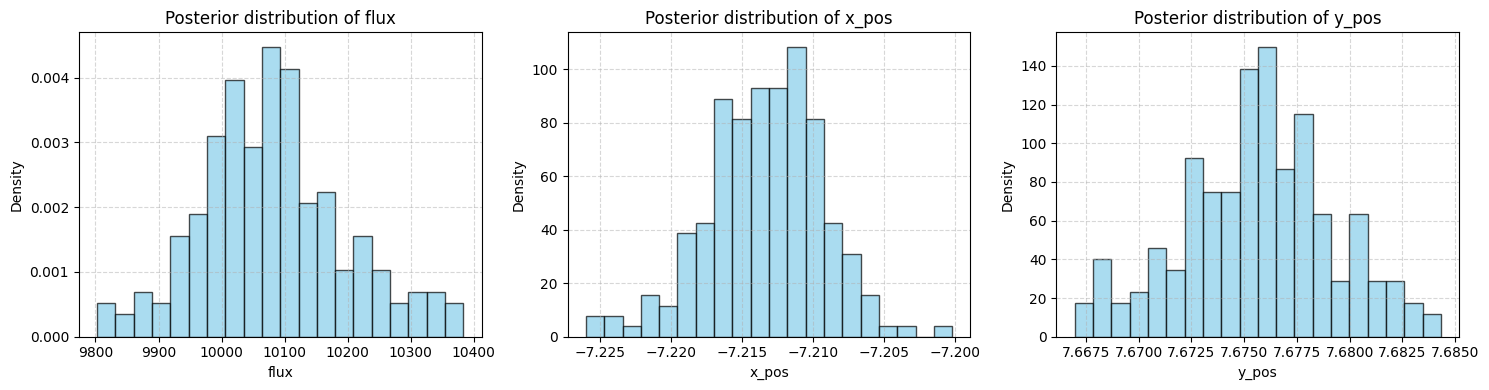

sample: 100%|██████████| 400/400 [00:16<00:00, 23.57it/s, 3 steps of size 8.51e-01. acc. prob=0.90]  


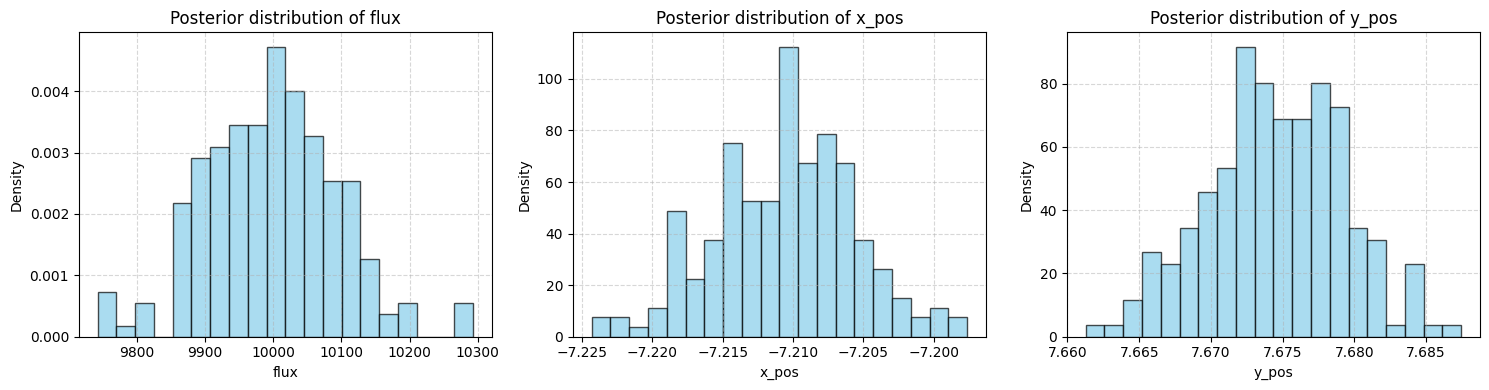

sample: 100%|██████████| 400/400 [00:16<00:00, 24.03it/s, 3 steps of size 8.50e-01. acc. prob=0.92] 


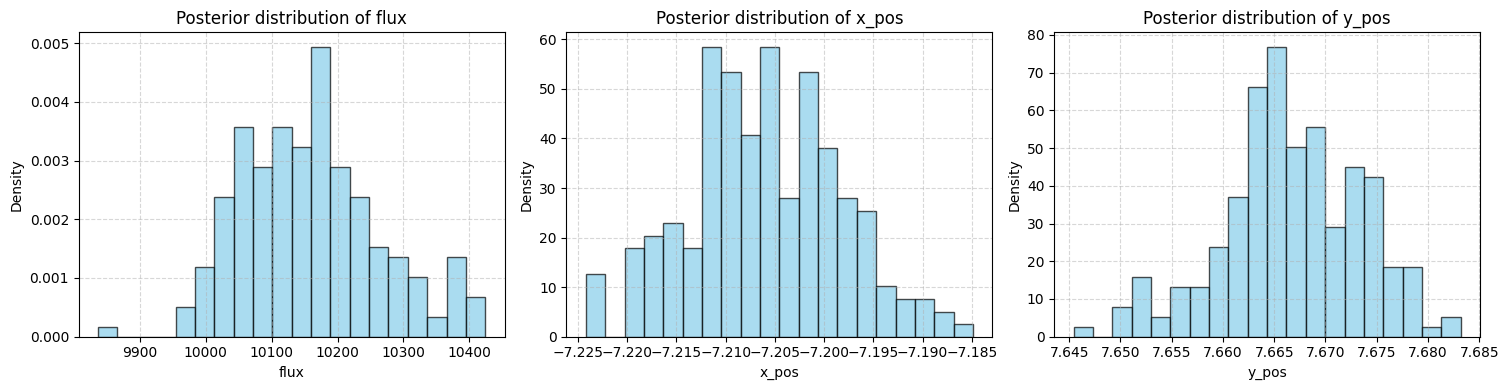

sample: 100%|██████████| 400/400 [00:12<00:00, 31.00it/s, 3 steps of size 6.03e-01. acc. prob=0.91] 


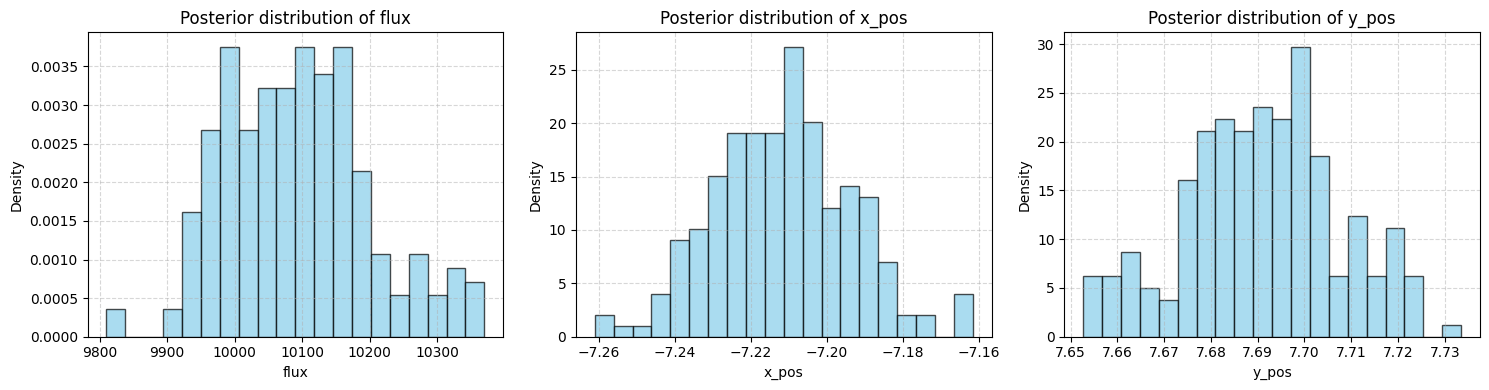

sample: 100%|██████████| 400/400 [00:11<00:00, 33.53it/s, 3 steps of size 8.07e-01. acc. prob=0.92] 


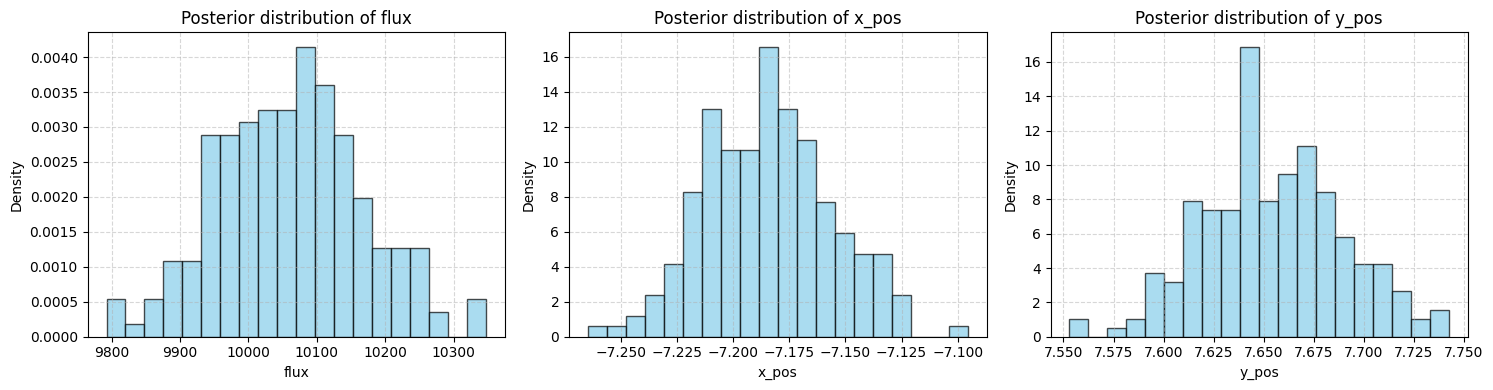

sample: 100%|██████████| 400/400 [00:10<00:00, 36.88it/s, 7 steps of size 9.45e-01. acc. prob=0.88] 


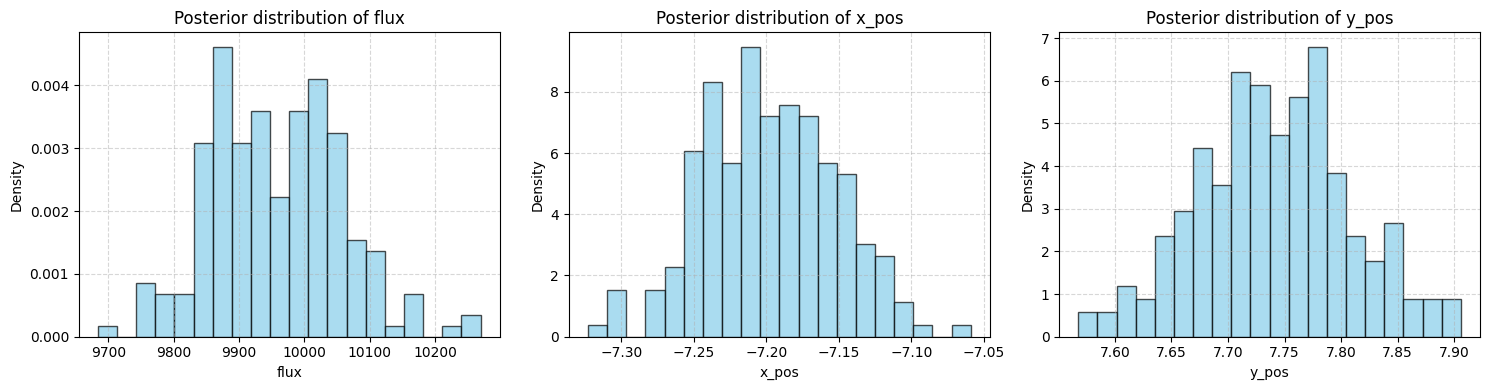

In [76]:
# ensure you include the _tol
square_pos_errors_downsample_tol = []
square_flux_errors_downsample_tol = []

for i in np.arange(n_trials):
    key = i
    position_arcsec = jr.uniform(jr.PRNGKey(key), (2,), minval=-16*psf_pixel_scale, maxval=16*psf_pixel_scale)
    position_rad = dlu.arcsec2rad(position_arcsec)

    source = dl.PointSource(np.array([wavelength]), position=position_rad, flux=flux)

    square_flux_errors = []
    square_pos_errors = []

    for idx, downsample in enumerate(downsamples):

        downsample_layer = dl.layers.detector_layers.Downsample(downsample)
        detector = dl.LayeredDetector([downsample_layer])

        telescope_tol = dl.Telescope(optics_tol, source, detector)

        psf_tol = telescope_tol.model()

        data_tol = jr.poisson(jr.PRNGKey(key), psf_tol)

        sampler = npy.infer.MCMC(
            npy.infer.NUTS(psf_model),
            num_warmup=200,
            num_samples=200,
            num_chains=device_count(),
            progress_bar=True
        )

        sampler.run(jr.PRNGKey(key), data_tol, telescope_tol, position_arcsec)

        samples = sampler.get_samples()

        median_x = np.median(samples['x_pos'].flatten())
        median_y = np.median(samples['y_pos'].flatten())

        median_flux = np.median(samples['flux'].flatten())

        square_pos_error = (np.hypot(median_x - position_arcsec[0], median_y - position_arcsec[1]))**2

        square_flux_error = (median_flux - flux)**2

        square_pos_errors.append(square_pos_error)
        square_flux_errors.append(square_flux_error)

        # plotting
        plt.figure(figsize=(15, 4))
        for paramidx, paramvalues in enumerate(samples.items()):
            param, values = paramvalues
            plt.subplot(1, 3, 1+paramidx)
            plt.hist(values.flatten(), bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
            plt.title(f"Posterior distribution of {param}")
            plt.xlabel(param)
            # if param == 'x_pos':
            #     plt.xlim(-0.5*psf_pixel_scale + position_arcsec[0], 0.5*psf_pixel_scale + position_arcsec[0])
            plt.ylabel("Density")
            plt.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()
        
    # ensure you include the _tol
    square_pos_errors_downsample_tol.append(square_pos_errors)
    square_flux_errors_downsample_tol.append(square_flux_errors)

In [77]:
print(np.array(square_pos_errors_downsample_tol)**0.5/dlu.rad2arcsec(crb_pos(wavelength,diameter,flux)))

[[ 1.2942207   1.1371326   3.2385645   2.4068794  14.608654   21.620886  ]
 [ 0.97917104  1.933717    1.1694878   0.80666274 14.154373   12.162957  ]
 [ 0.9331838   2.8787775   2.1124856   2.1078358  19.169773   12.831702  ]
 [ 0.7485679   0.11107711  5.020556    6.9541087   3.030676   27.594912  ]
 [ 0.31409207  3.2443008   0.8830843   4.3276844  14.069436   25.742136  ]
 [ 0.86649764  2.1092927   2.7141626   6.7388396   4.7235274   6.363454  ]
 [ 1.1209991   0.68419564  3.168824    6.088538    9.502388   14.605211  ]
 [ 1.9454547   1.5921304   3.0463252   5.4854536   6.0377164   5.57245   ]
 [ 0.6086094   2.5468433   1.9975291   3.341253   24.813211    9.64597   ]
 [ 1.1957515   0.536097    1.9823935   3.9643545   7.851901   14.8629    ]]


In [ ]:
print(square_pos_errors_downsample_tol)

[[Array(0.00010068, dtype=float32)], [Array(3.465558e-05, dtype=float32)], [Array(0.00015248, dtype=float32)], [Array(1.5024901e-05, dtype=float32)], [Array(5.986911e-05, dtype=float32)], [Array(9.519985e-05, dtype=float32)], [Array(0.00016745, dtype=float32)], [Array(4.459072e-05, dtype=float32)], [Array(2.3878765e-05, dtype=float32)], [Array(0.00026275, dtype=float32)]]


In [85]:
print(np.array([square_flux_errors_downsample_tol])**0.5/crb_flux(flux))

[[[0.16955078 0.970459   0.57859373 0.43320313 1.0775293  0.05387695]
  [0.7412891  1.4672071  0.11041015 2.0041602  0.1790625  0.15791015]
  [0.44938478 2.567578   0.43754882 0.80073243 1.19792    0.60617185]
  [0.54433596 0.5941797  0.0590625  0.9392383  0.65424806 1.866289  ]
  [1.423711   1.6475586  1.3631836  3.7940626  0.31450194 0.5968945 ]
  [0.51862305 0.46835938 1.8772851  0.91128904 0.03664063 0.8081543 ]
  [1.2526953  1.0858496  1.8441992  0.5737109  0.02441406 0.26654297]
  [1.4022657  1.8982031  0.61470705 0.15192384 0.23539062 0.86695313]
  [0.42570314 0.7183203  1.5597266  0.10415039 0.90851563 0.13257812]
  [0.7511231  0.01789062 1.5676074  0.9060352  0.66717774 0.4902246 ]]]


In [90]:
# need to modify my sampler because stuff aint converging
def psf_model(data, model, pos_arcsec, downsample):

    x = dlu.arcsec2rad(npy.sample("x_pos", dist.Uniform(-psf_pixel_scale*downsample/32 + pos_arcsec[0],psf_pixel_scale*downsample/32 + pos_arcsec[0])))
    y = dlu.arcsec2rad(npy.sample("y_pos", dist.Uniform(-psf_pixel_scale*downsample/32 + pos_arcsec[1],psf_pixel_scale*downsample/32 + pos_arcsec[1])))

    flux = npy.sample("flux", dist.Uniform(0.95*10000,1.05*10000))

    values = [
        np.array([x,y]),
        flux
    ]

    with npy.plate("data", len(data.flatten())):
        poisson_model = dist.Poisson(
            model.set(parameters, values).model().flatten()
        )
        return npy.sample("psf", poisson_model, obs=data.flatten())

sample: 100%|██████████| 400/400 [00:09<00:00, 40.59it/s, 7 steps of size 8.26e-01. acc. prob=0.90] 


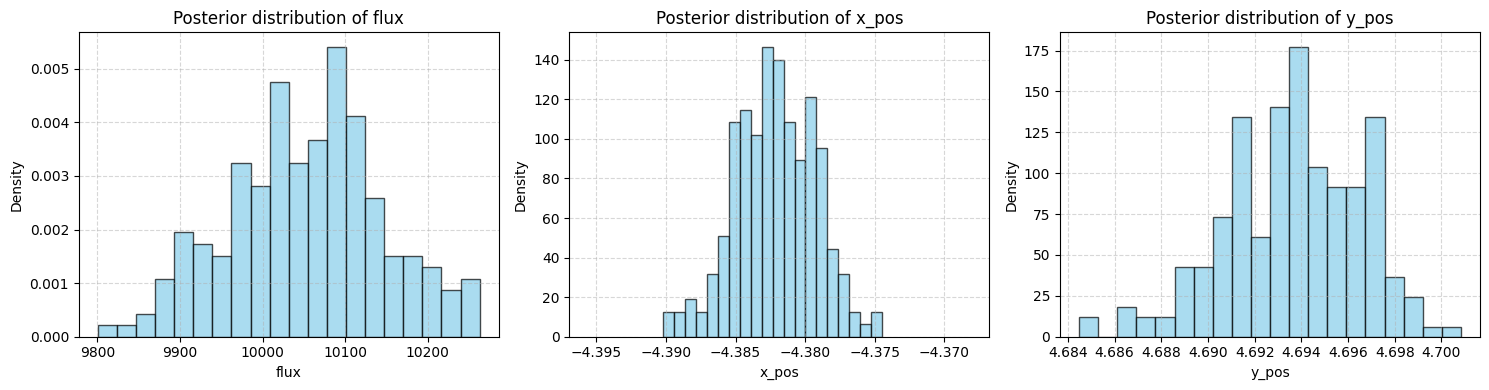

sample: 100%|██████████| 400/400 [00:10<00:00, 39.49it/s, 19 steps of size 7.30e-01. acc. prob=0.90]


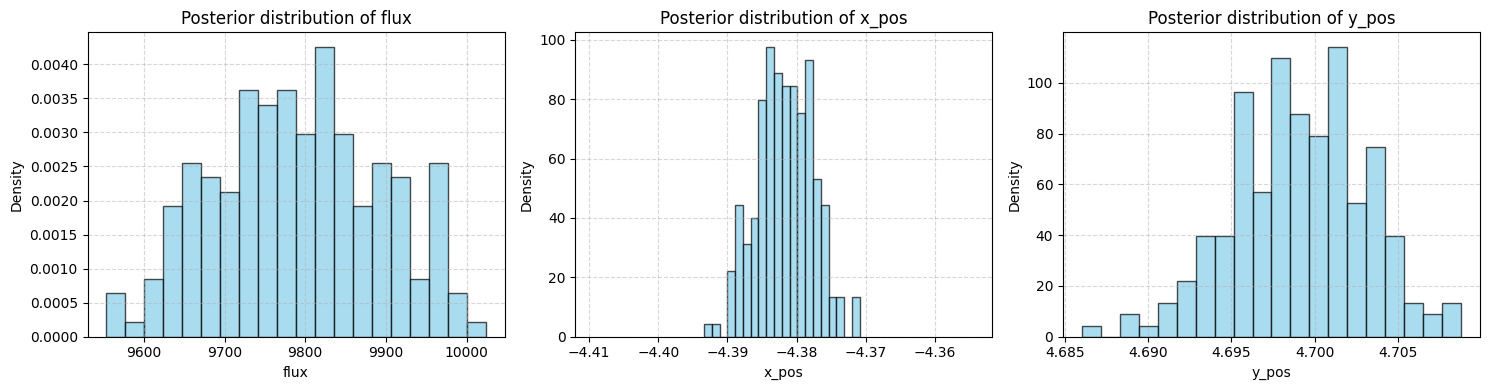

sample: 100%|██████████| 400/400 [00:09<00:00, 40.45it/s, 7 steps of size 8.03e-01. acc. prob=0.90] 


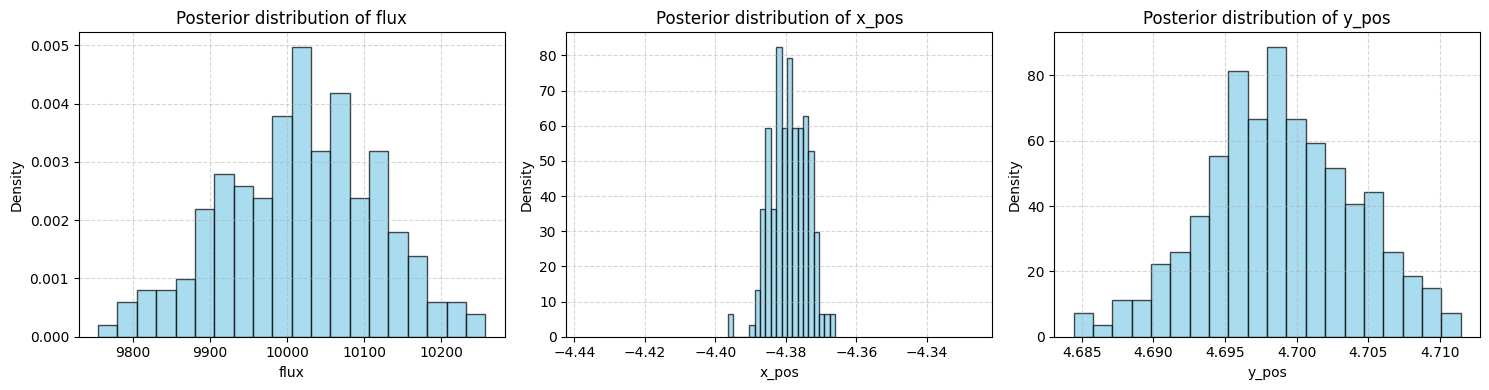

sample: 100%|██████████| 400/400 [00:11<00:00, 34.78it/s, 7 steps of size 8.69e-01. acc. prob=0.90] 


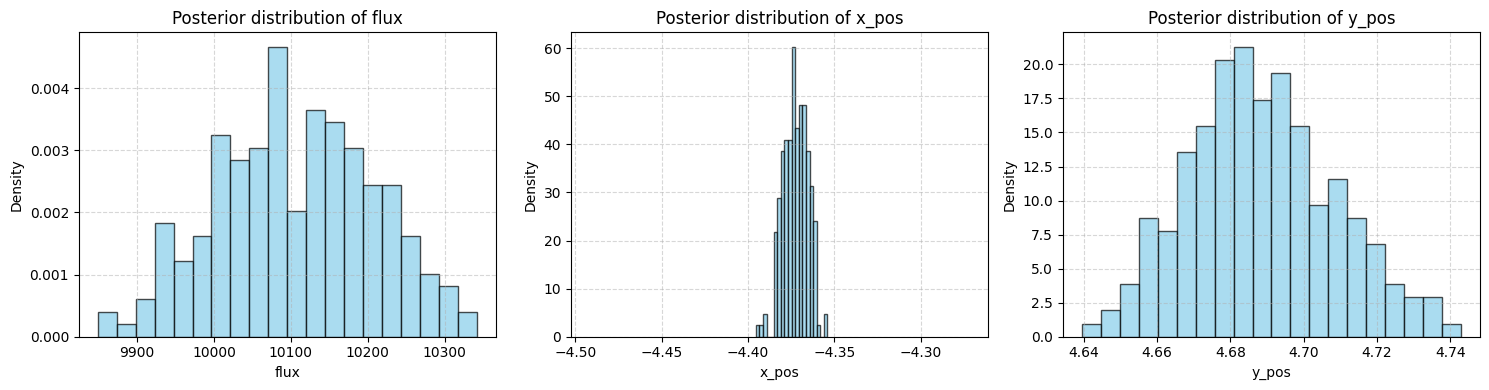

sample: 100%|██████████| 400/400 [00:11<00:00, 33.58it/s, 3 steps of size 7.75e-01. acc. prob=0.89] 


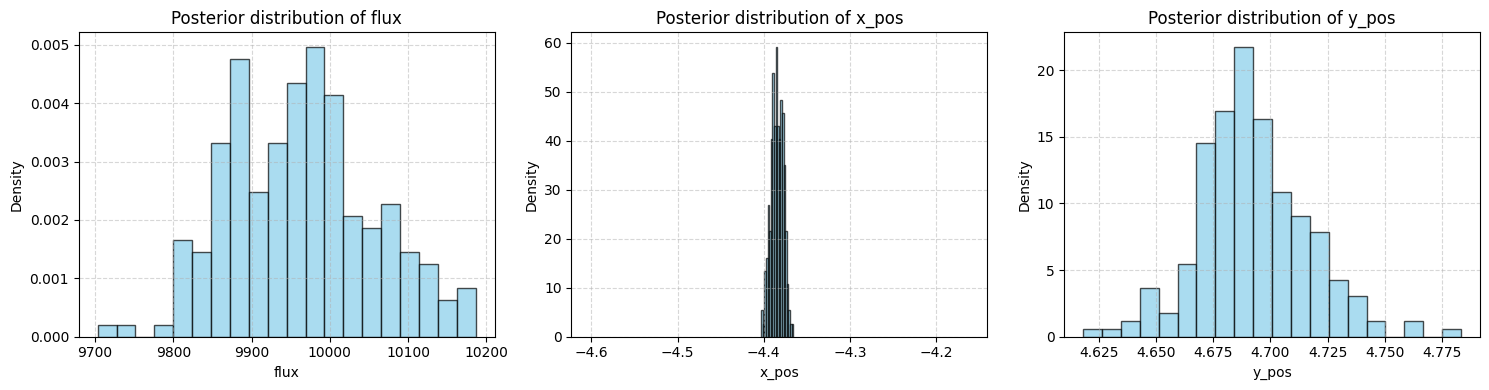

sample: 100%|██████████| 400/400 [00:11<00:00, 36.18it/s, 7 steps of size 6.85e-01. acc. prob=0.85] 


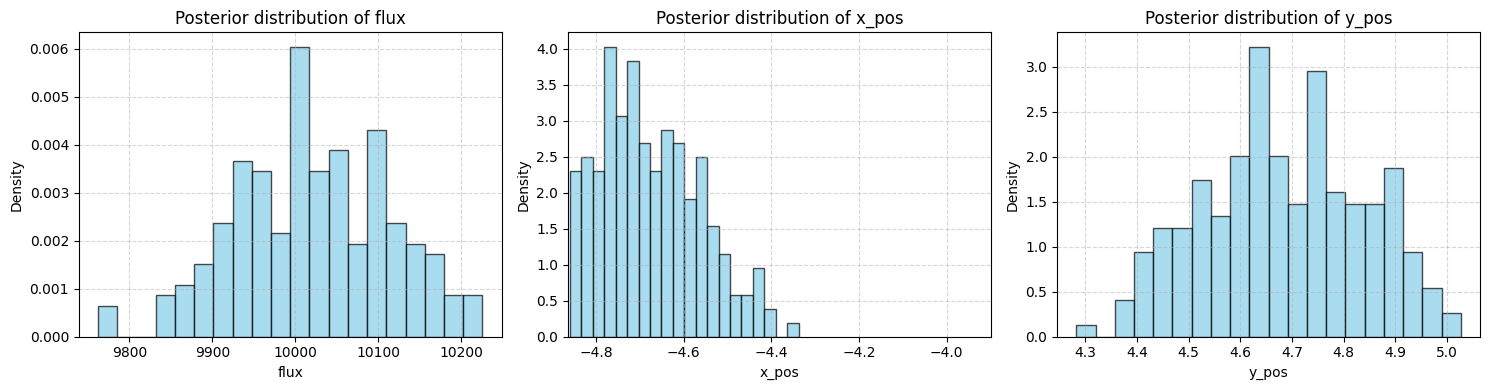

sample: 100%|██████████| 400/400 [00:10<00:00, 38.32it/s, 7 steps of size 7.59e-01. acc. prob=0.91] 


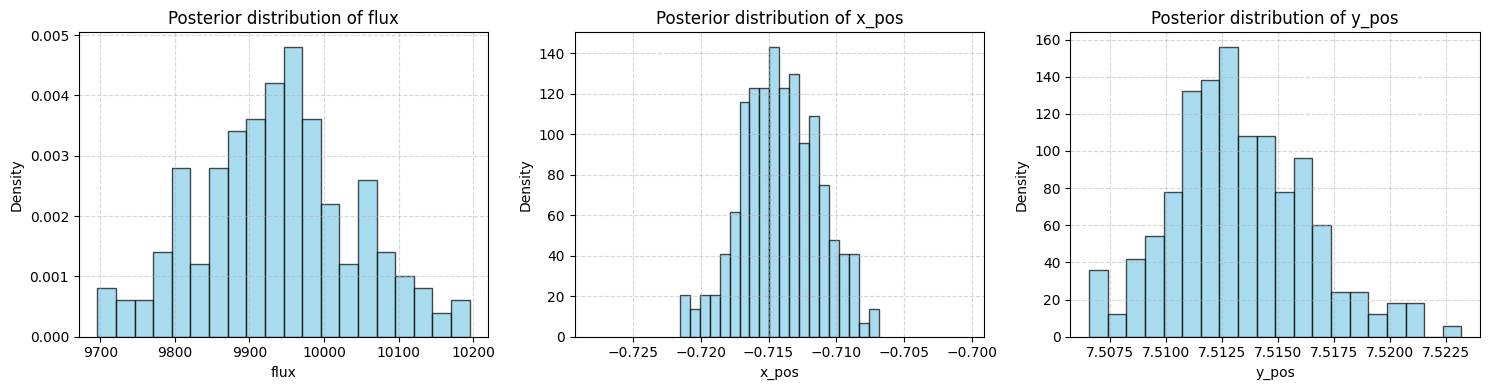

sample: 100%|██████████| 400/400 [00:10<00:00, 37.74it/s, 3 steps of size 8.71e-01. acc. prob=0.90] 


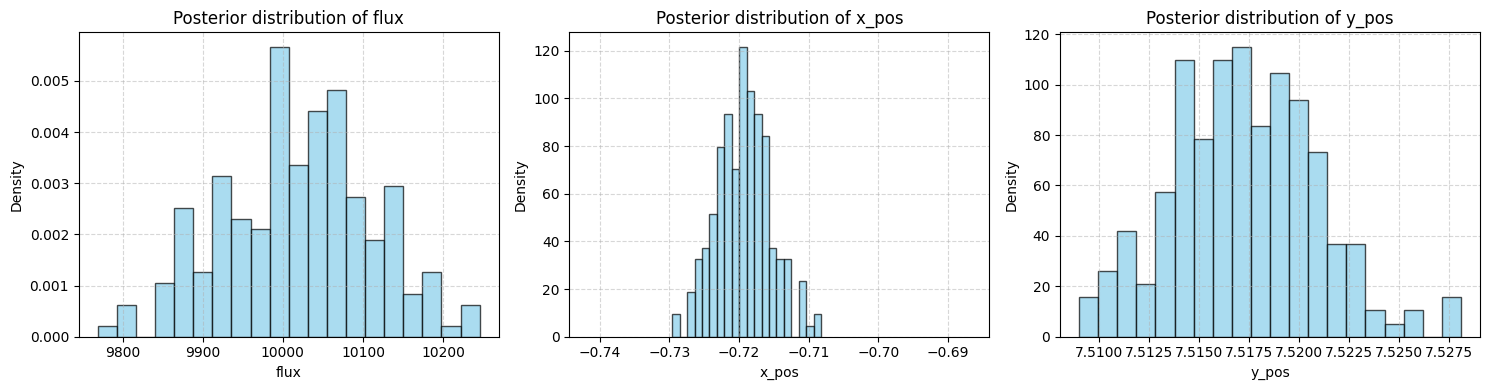

sample: 100%|██████████| 400/400 [00:10<00:00, 36.59it/s, 3 steps of size 9.50e-01. acc. prob=0.89] 


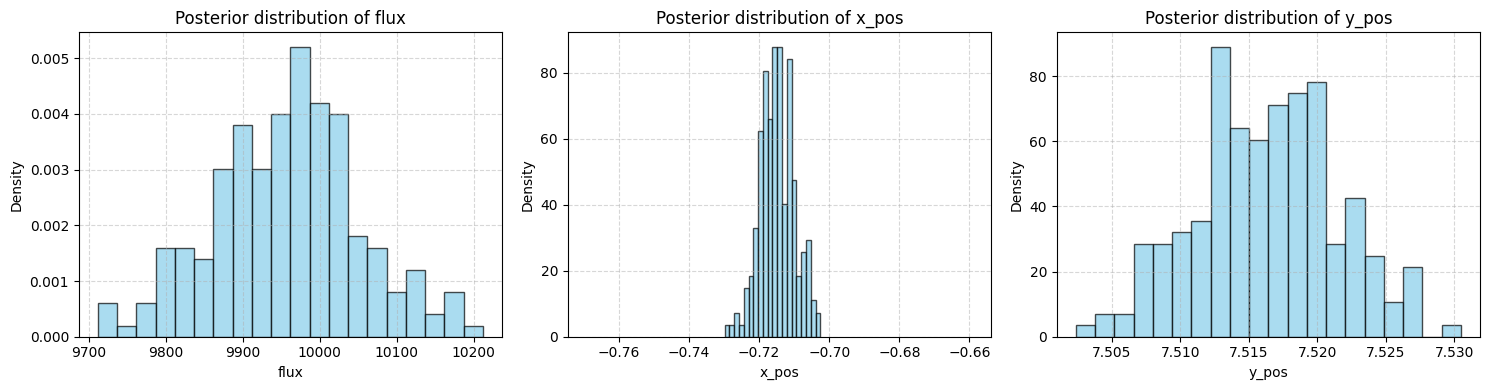

sample: 100%|██████████| 400/400 [00:13<00:00, 30.64it/s, 7 steps of size 8.11e-01. acc. prob=0.90] 


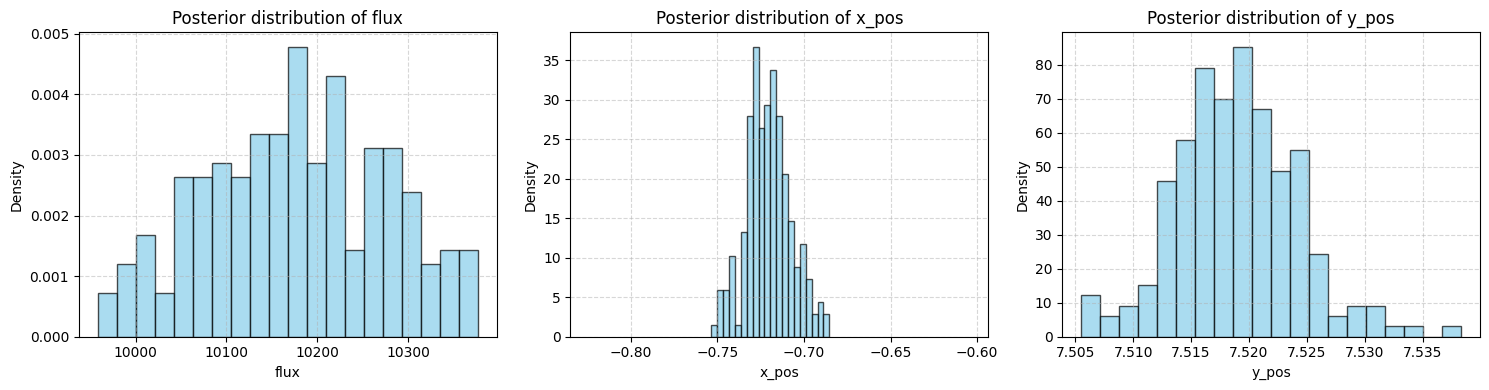

sample: 100%|██████████| 400/400 [00:13<00:00, 29.64it/s, 3 steps of size 7.77e-01. acc. prob=0.91] 


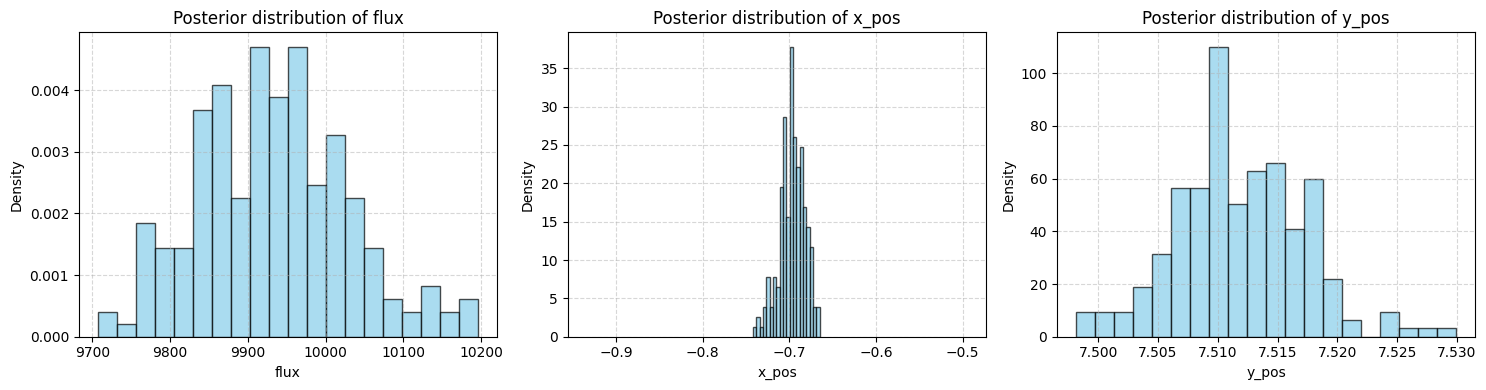

sample: 100%|██████████| 400/400 [00:16<00:00, 24.24it/s, 3 steps of size 9.06e-01. acc. prob=0.90] 


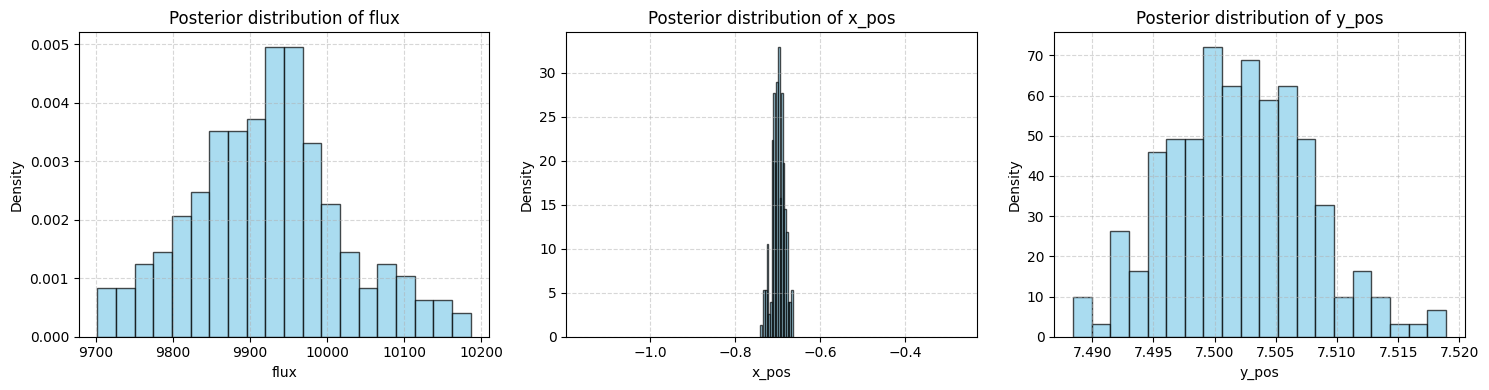

sample: 100%|██████████| 400/400 [00:10<00:00, 38.16it/s, 3 steps of size 7.35e-01. acc. prob=0.91] 


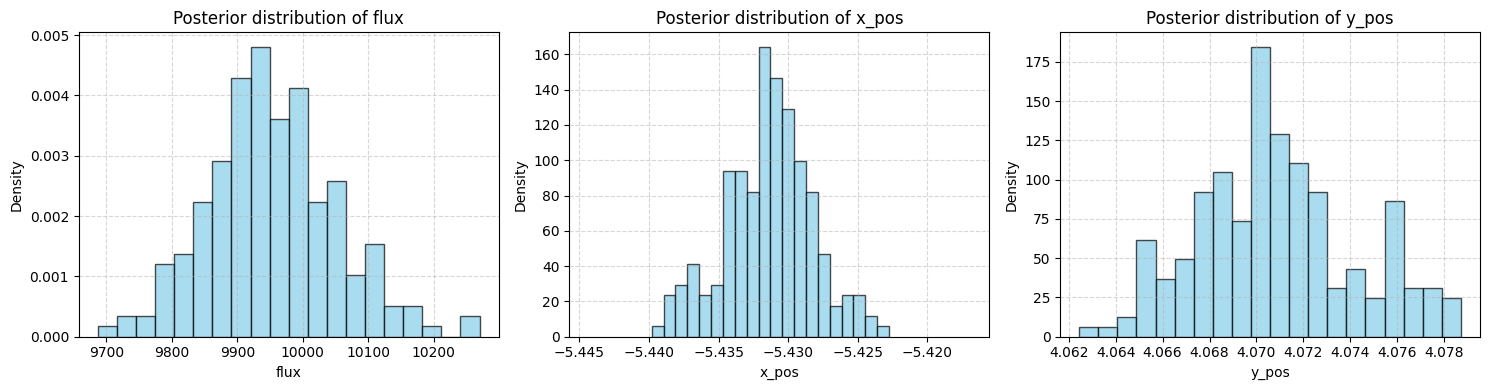

sample: 100%|██████████| 400/400 [00:11<00:00, 35.99it/s, 3 steps of size 6.87e-01. acc. prob=0.93] 


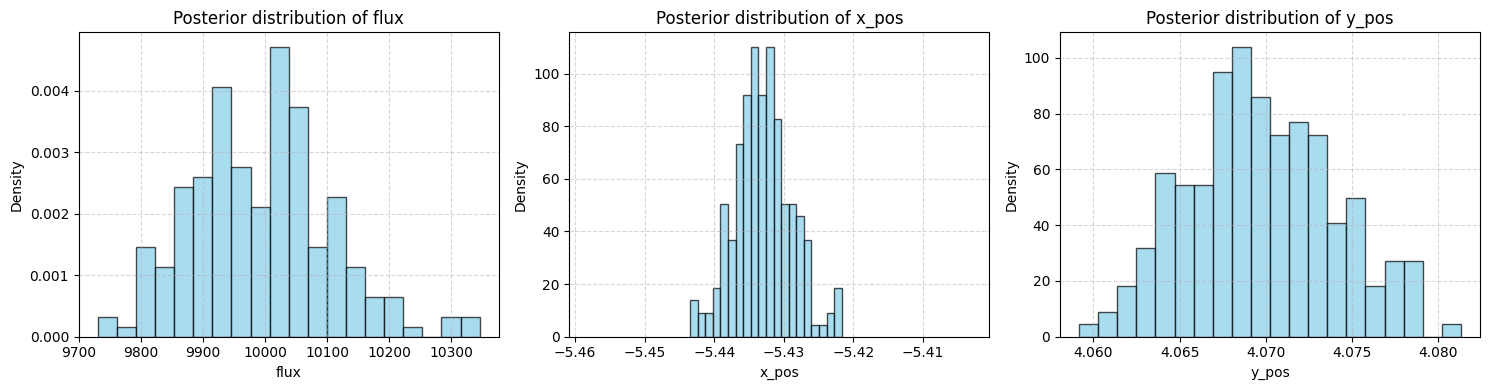

sample: 100%|██████████| 400/400 [00:11<00:00, 34.98it/s, 3 steps of size 9.95e-01. acc. prob=0.89] 


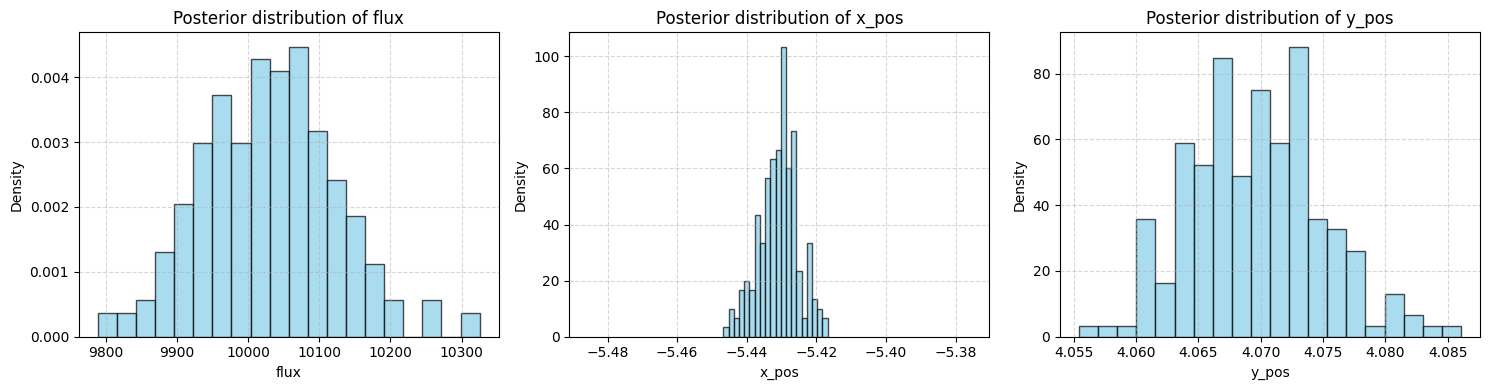

sample: 100%|██████████| 400/400 [00:11<00:00, 33.62it/s, 3 steps of size 7.99e-01. acc. prob=0.93] 


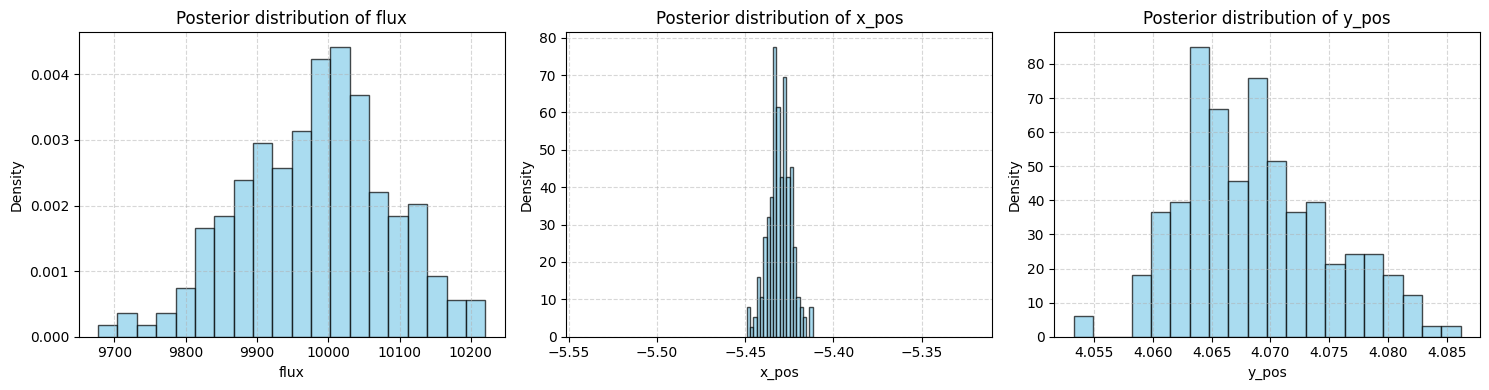

sample: 100%|██████████| 400/400 [00:18<00:00, 22.07it/s, 3 steps of size 9.29e-01. acc. prob=0.89]  


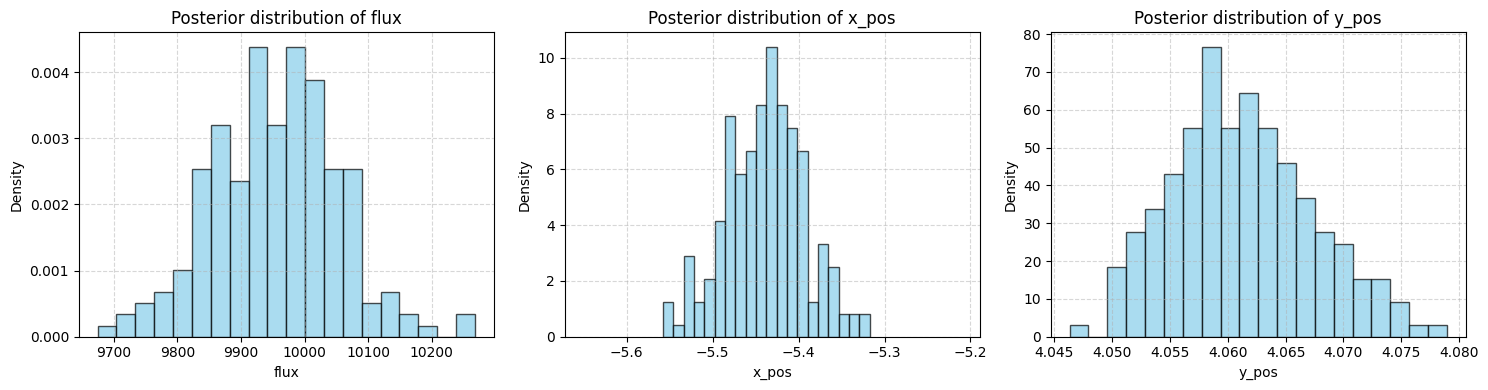

sample: 100%|██████████| 400/400 [00:11<00:00, 34.88it/s, 3 steps of size 5.96e-01. acc. prob=0.92] 


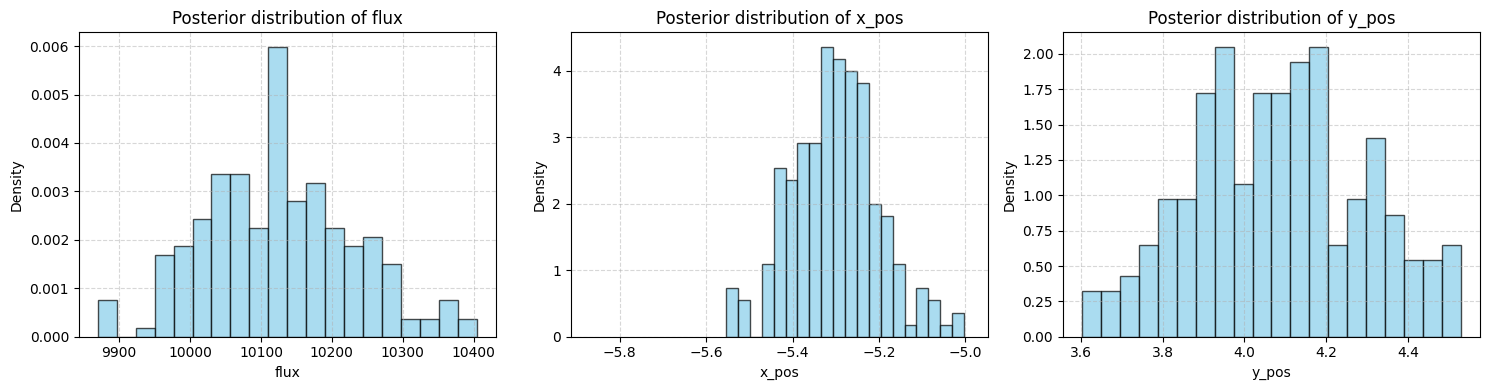

sample: 100%|██████████| 400/400 [00:11<00:00, 36.11it/s, 7 steps of size 8.71e-01. acc. prob=0.91] 


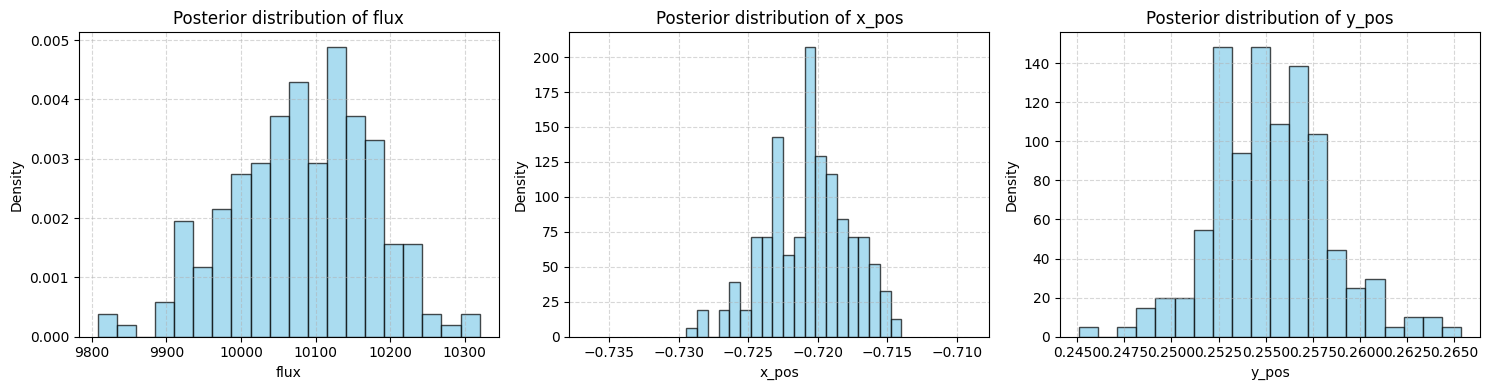

sample: 100%|██████████| 400/400 [00:11<00:00, 35.89it/s, 7 steps of size 9.03e-01. acc. prob=0.92] 


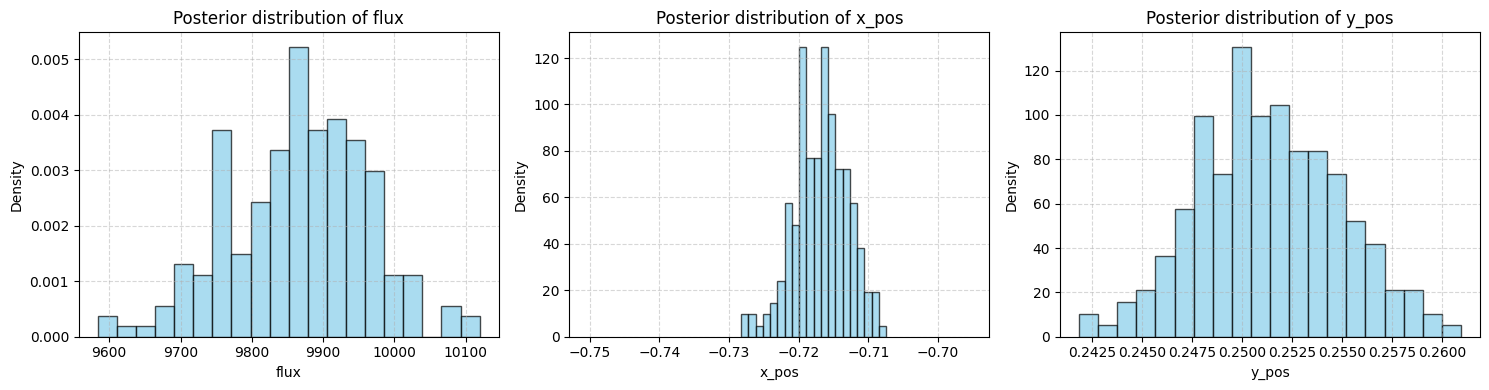

sample: 100%|██████████| 400/400 [00:11<00:00, 35.66it/s, 7 steps of size 7.86e-01. acc. prob=0.92] 


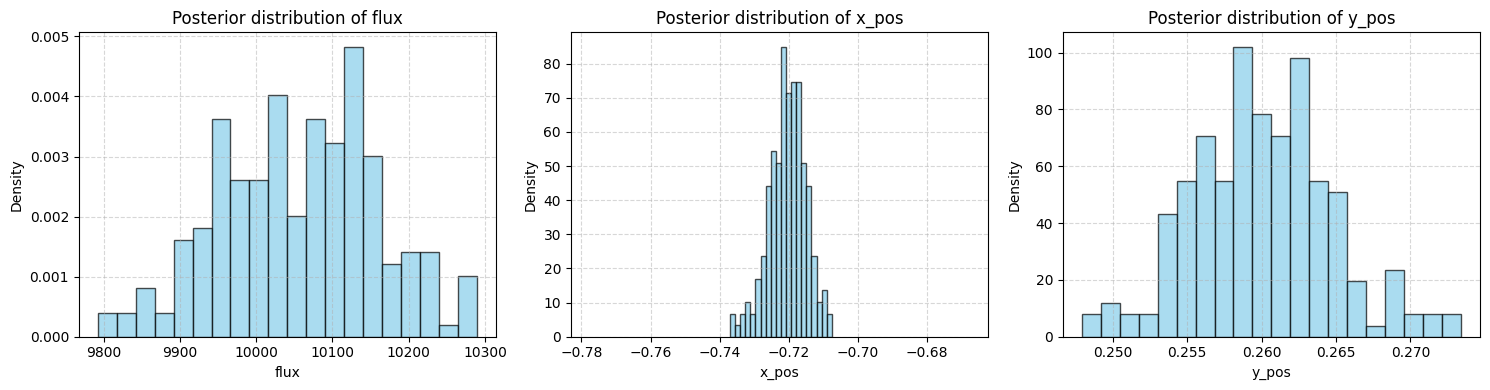

sample: 100%|██████████| 400/400 [00:13<00:00, 30.24it/s, 3 steps of size 7.31e-01. acc. prob=0.91] 


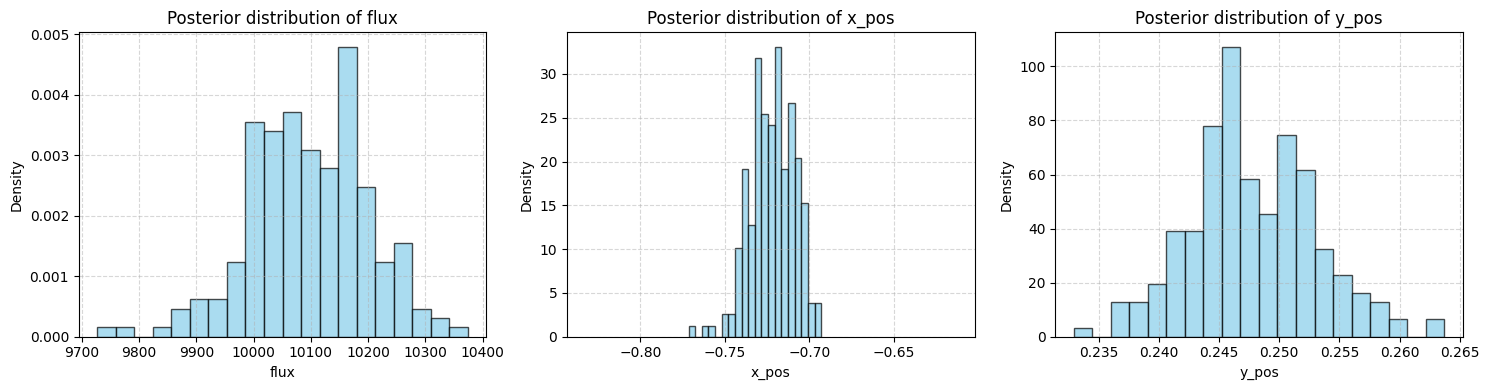

sample: 100%|██████████| 400/400 [00:15<00:00, 26.49it/s, 3 steps of size 8.45e-01. acc. prob=0.91] 


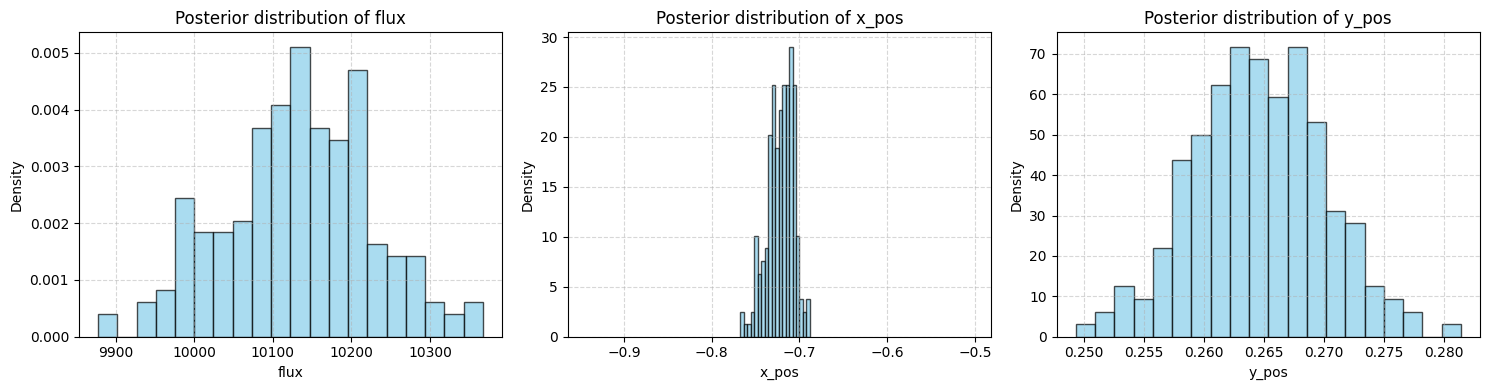

sample: 100%|██████████| 400/400 [00:16<00:00, 24.40it/s, 3 steps of size 9.00e-01. acc. prob=0.89] 


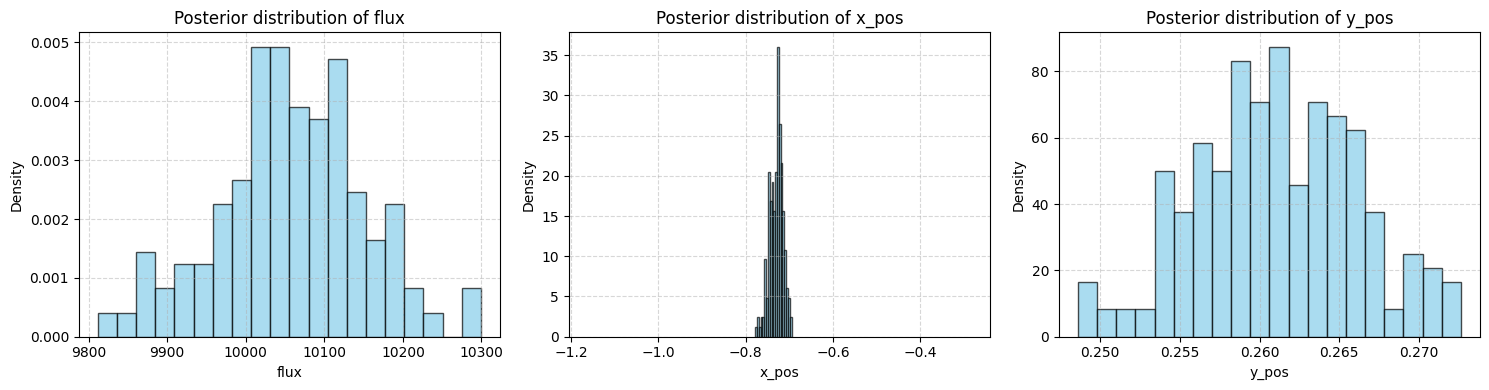

sample: 100%|██████████| 400/400 [00:11<00:00, 35.09it/s, 7 steps of size 7.30e-01. acc. prob=0.91] 


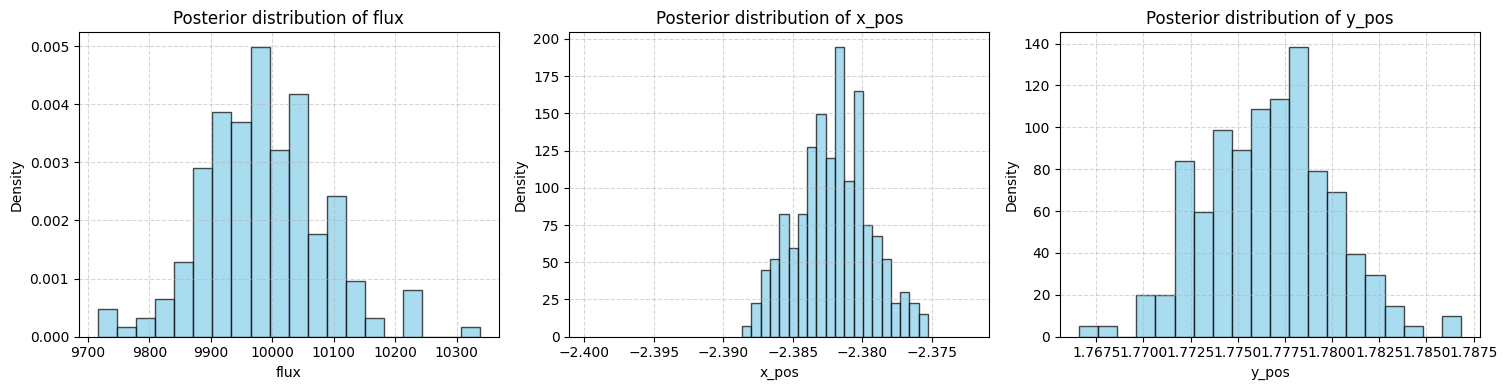

sample: 100%|██████████| 400/400 [00:10<00:00, 37.84it/s, 7 steps of size 9.15e-01. acc. prob=0.90] 


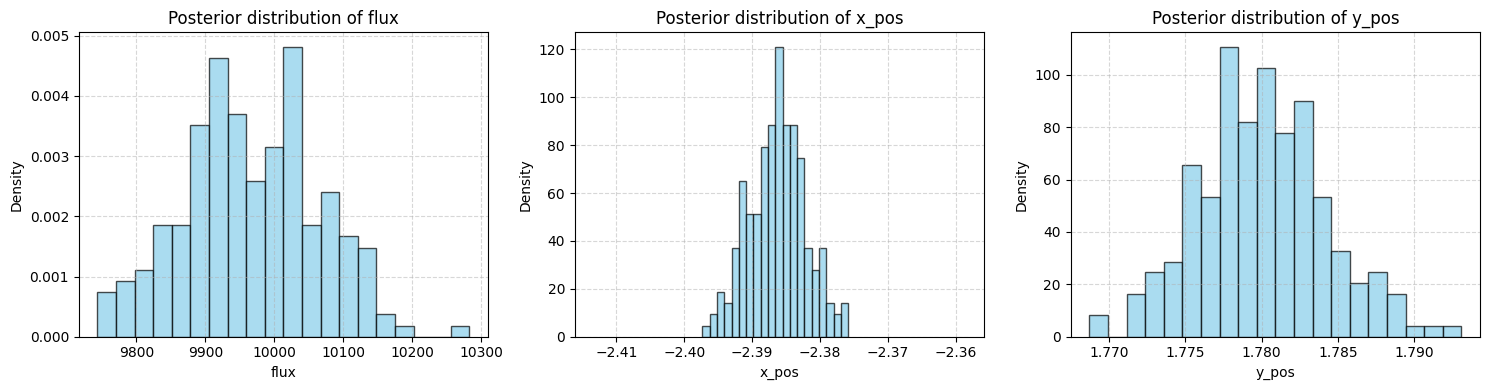

sample: 100%|██████████| 400/400 [00:11<00:00, 35.69it/s, 7 steps of size 7.39e-01. acc. prob=0.91] 


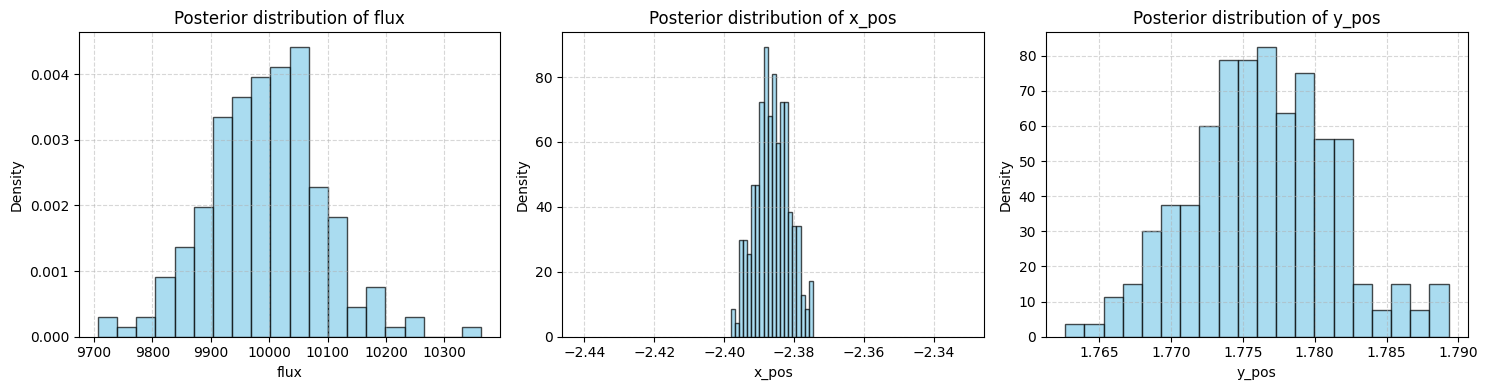

sample: 100%|██████████| 400/400 [00:11<00:00, 34.11it/s, 7 steps of size 8.44e-01. acc. prob=0.91] 


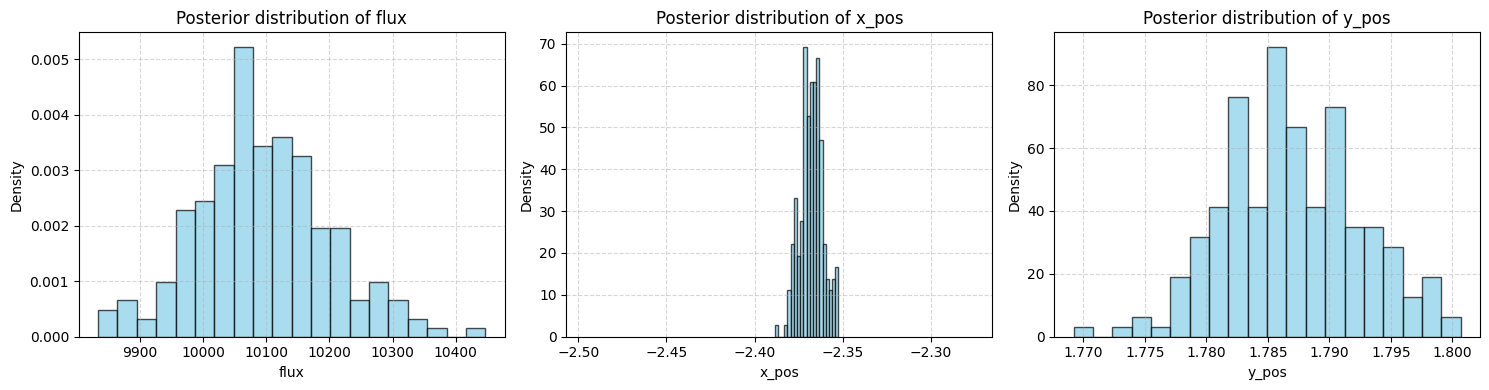

sample: 100%|██████████| 400/400 [00:12<00:00, 32.84it/s, 7 steps of size 5.34e-01. acc. prob=0.94] 


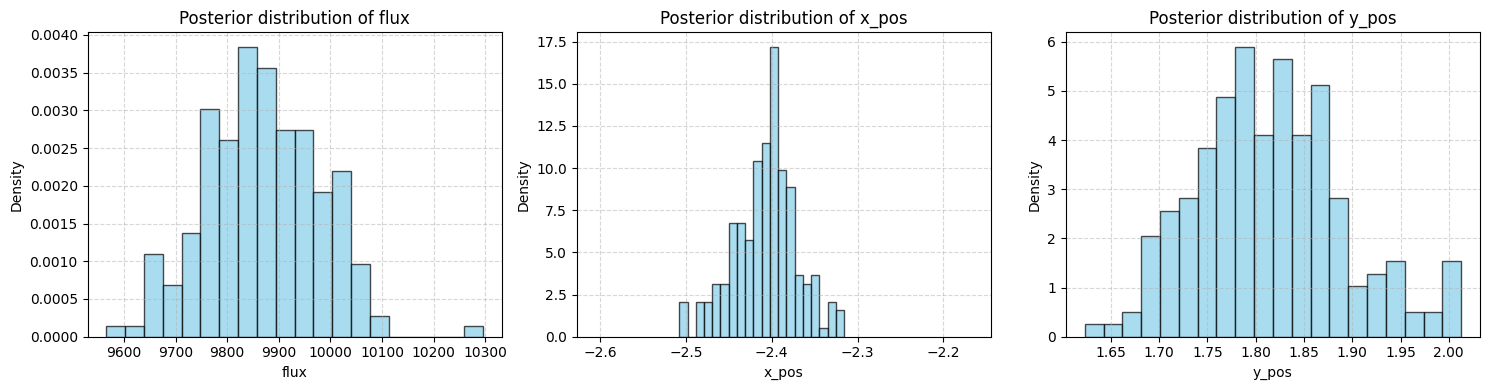

sample: 100%|██████████| 400/400 [00:10<00:00, 36.98it/s, 7 steps of size 7.02e-01. acc. prob=0.90] 


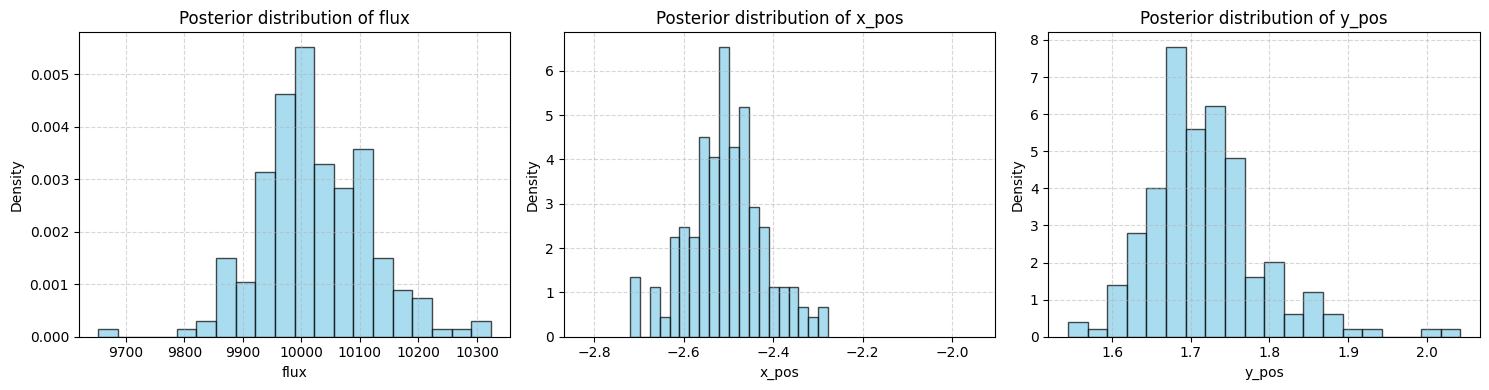

sample: 100%|██████████| 400/400 [00:11<00:00, 34.48it/s, 3 steps of size 8.75e-01. acc. prob=0.89] 


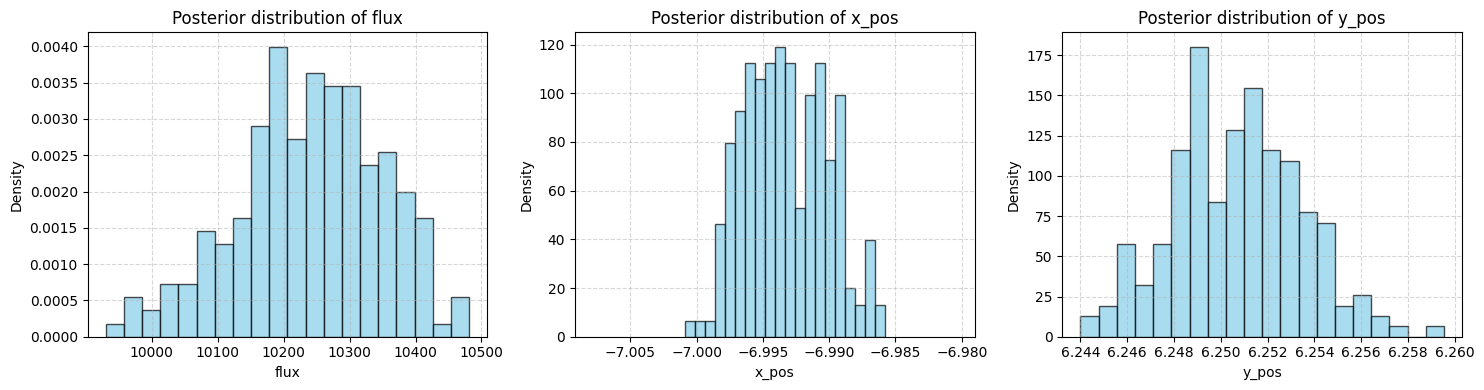

sample: 100%|██████████| 400/400 [00:10<00:00, 37.73it/s, 7 steps of size 9.17e-01. acc. prob=0.89] 


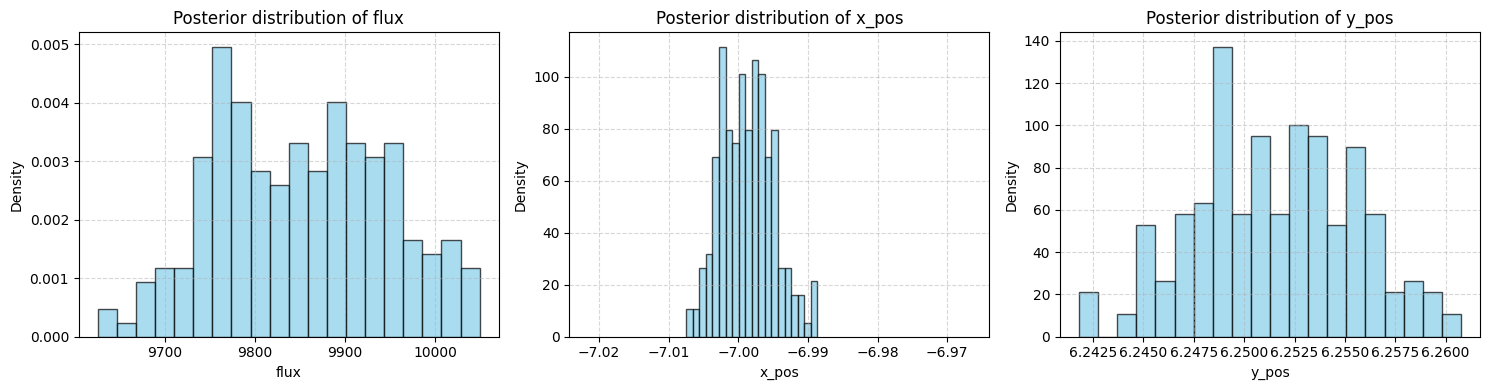

sample: 100%|██████████| 400/400 [00:10<00:00, 36.85it/s, 7 steps of size 8.62e-01. acc. prob=0.91] 


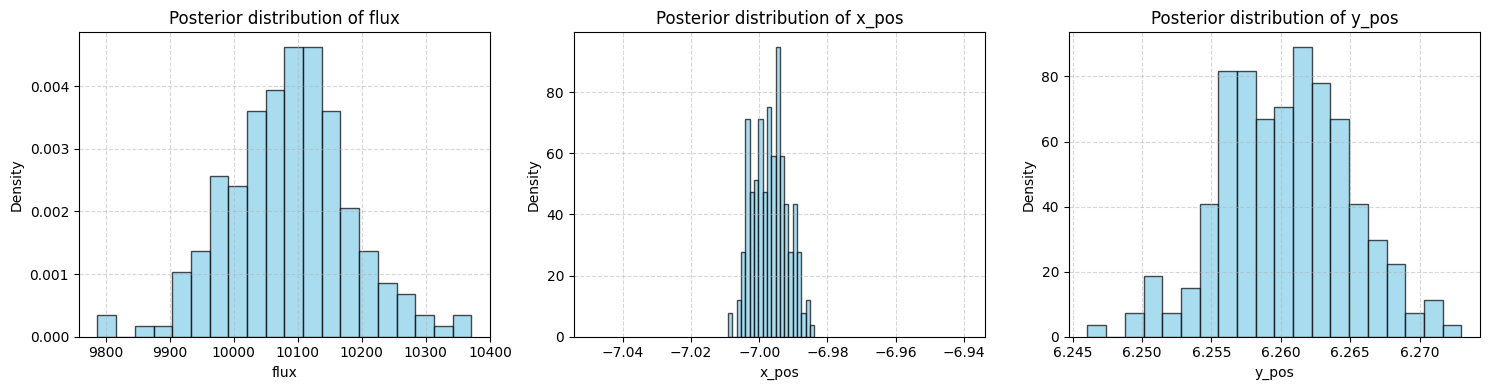

sample: 100%|██████████| 400/400 [00:12<00:00, 33.24it/s, 3 steps of size 8.09e-01. acc. prob=0.90] 


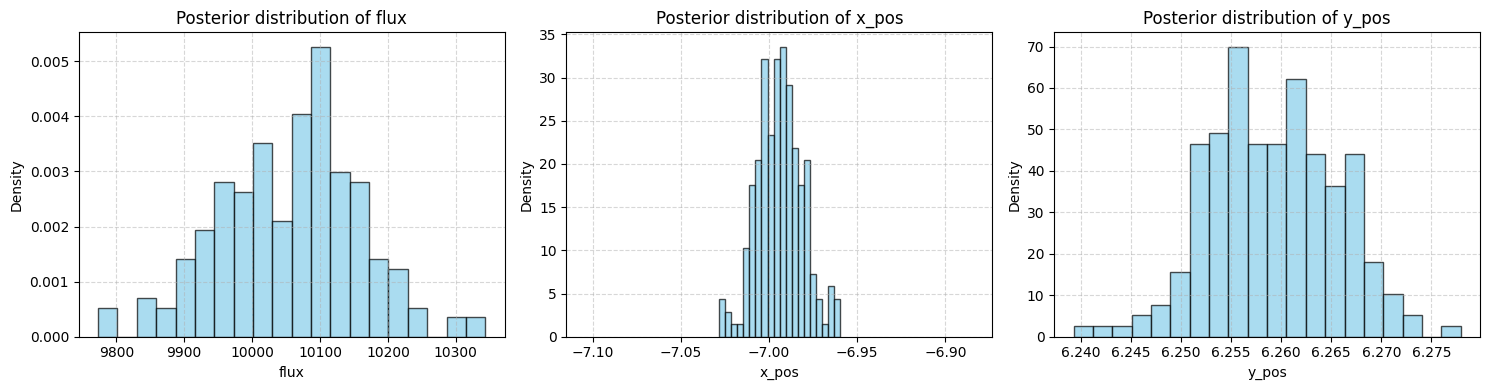

sample: 100%|██████████| 400/400 [00:11<00:00, 33.54it/s, 3 steps of size 9.39e-01. acc. prob=0.87] 


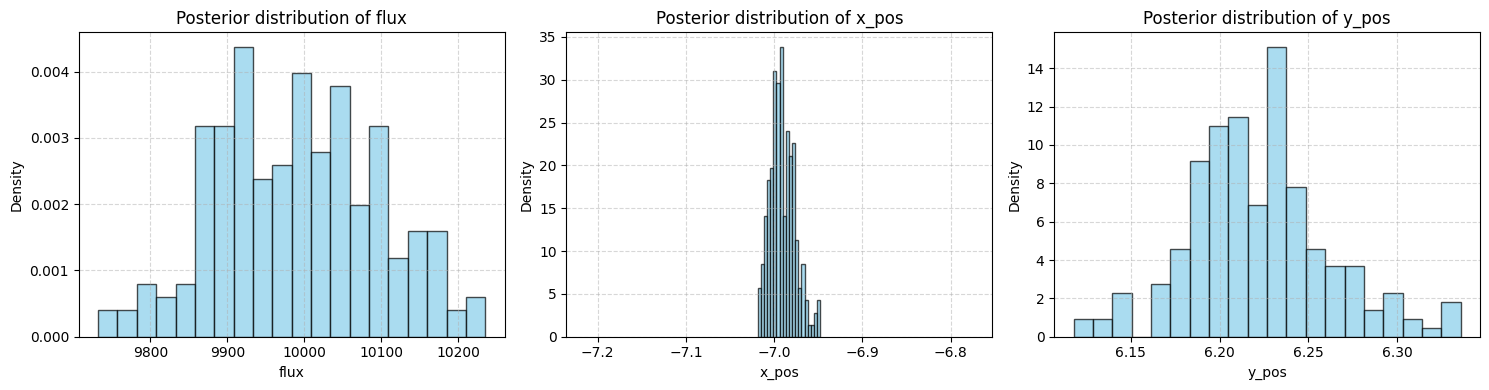

sample: 100%|██████████| 400/400 [00:13<00:00, 29.48it/s, 3 steps of size 9.11e-01. acc. prob=0.91] 


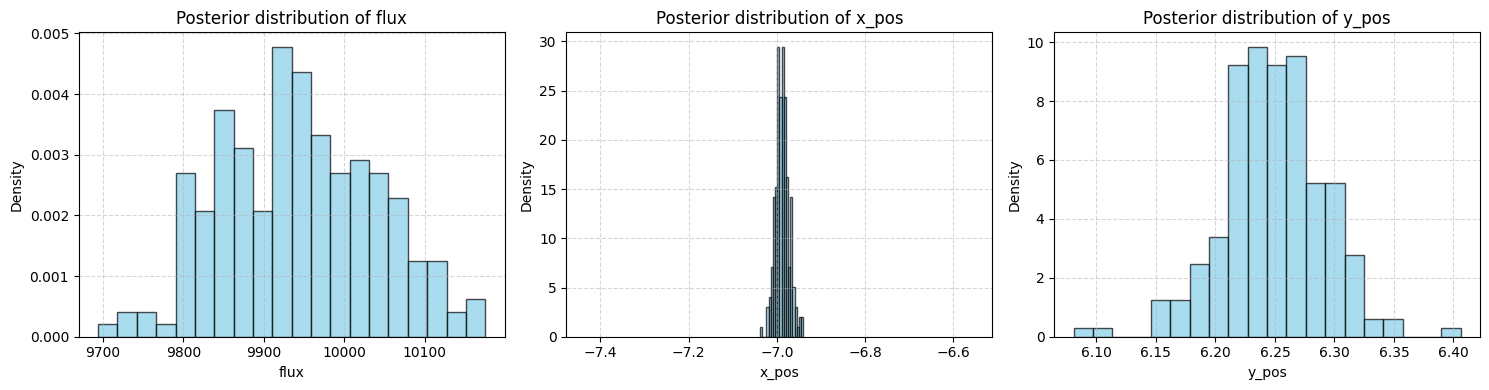

sample: 100%|██████████| 400/400 [00:11<00:00, 35.38it/s, 7 steps of size 8.12e-01. acc. prob=0.89] 


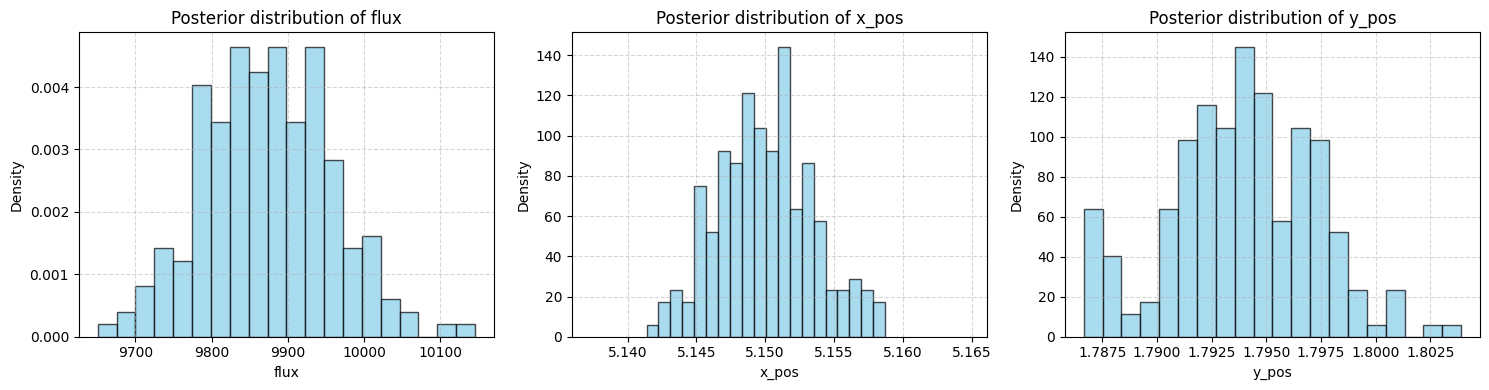

sample: 100%|██████████| 400/400 [00:10<00:00, 38.66it/s, 7 steps of size 7.47e-01. acc. prob=0.91] 


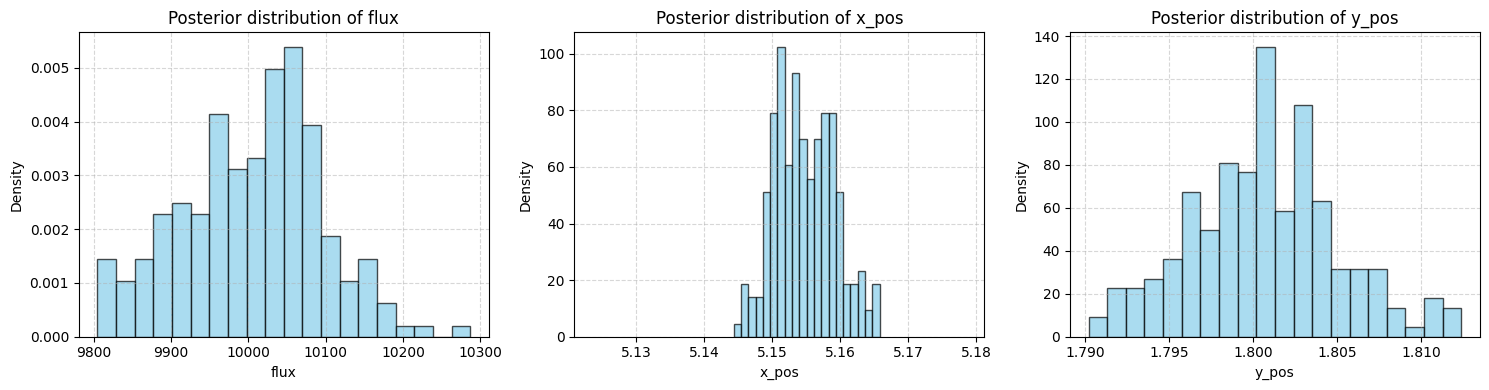

sample: 100%|██████████| 400/400 [00:10<00:00, 37.48it/s, 3 steps of size 8.97e-01. acc. prob=0.90] 


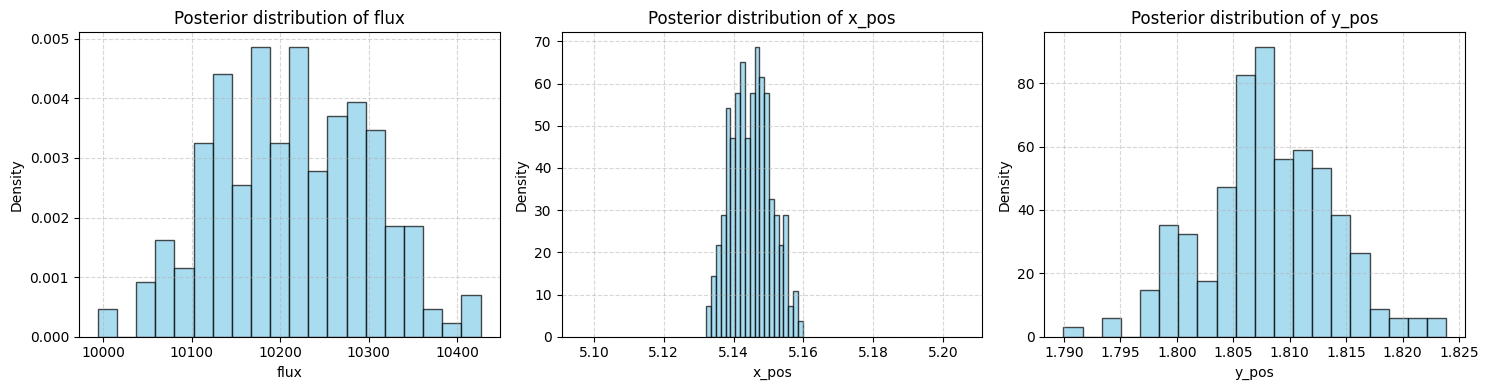

sample: 100%|██████████| 400/400 [00:11<00:00, 35.95it/s, 3 steps of size 8.72e-01. acc. prob=0.88] 


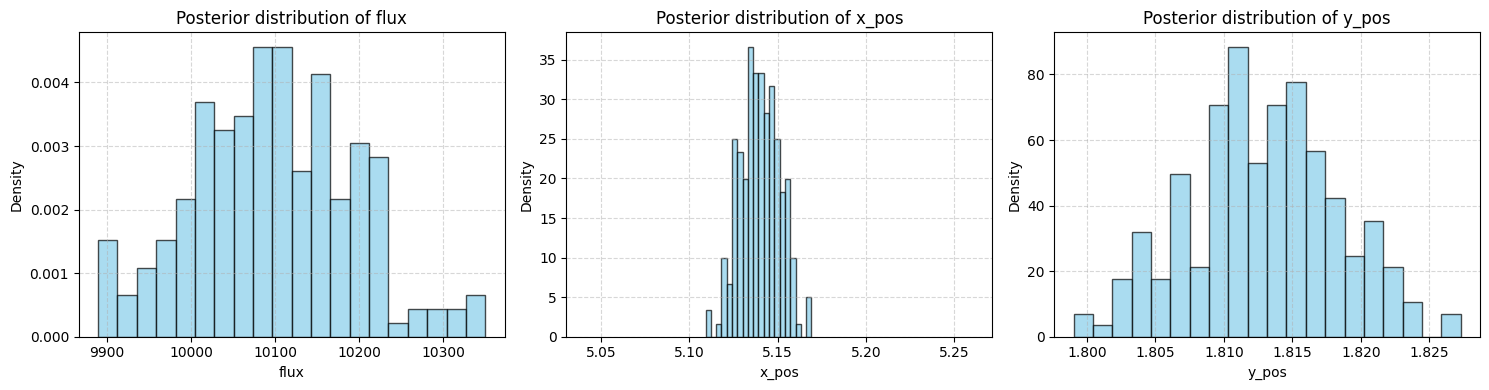

sample: 100%|██████████| 400/400 [00:10<00:00, 39.88it/s, 3 steps of size 1.01e+00. acc. prob=0.87] 


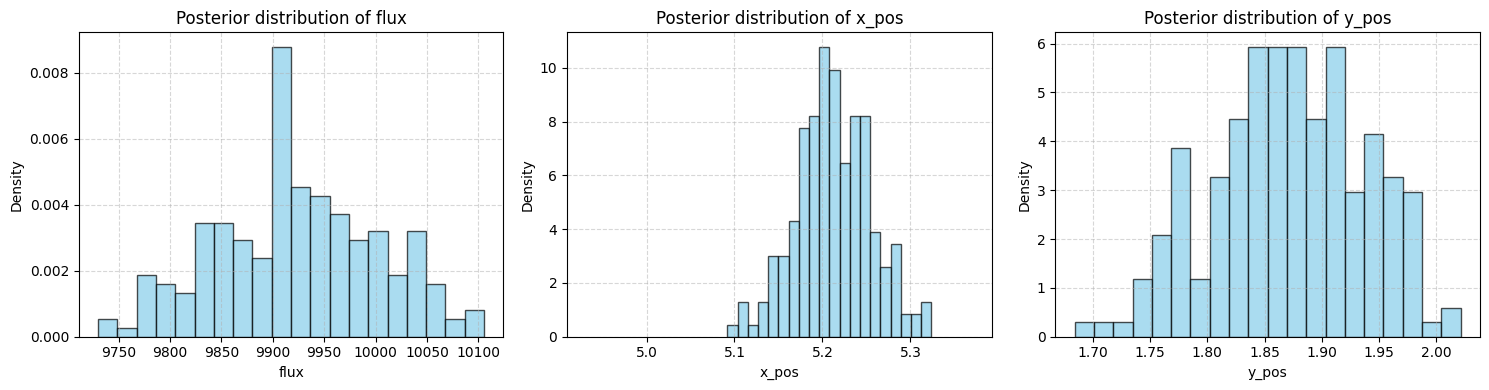

sample: 100%|██████████| 400/400 [00:13<00:00, 29.12it/s, 3 steps of size 6.06e-01. acc. prob=0.90] 


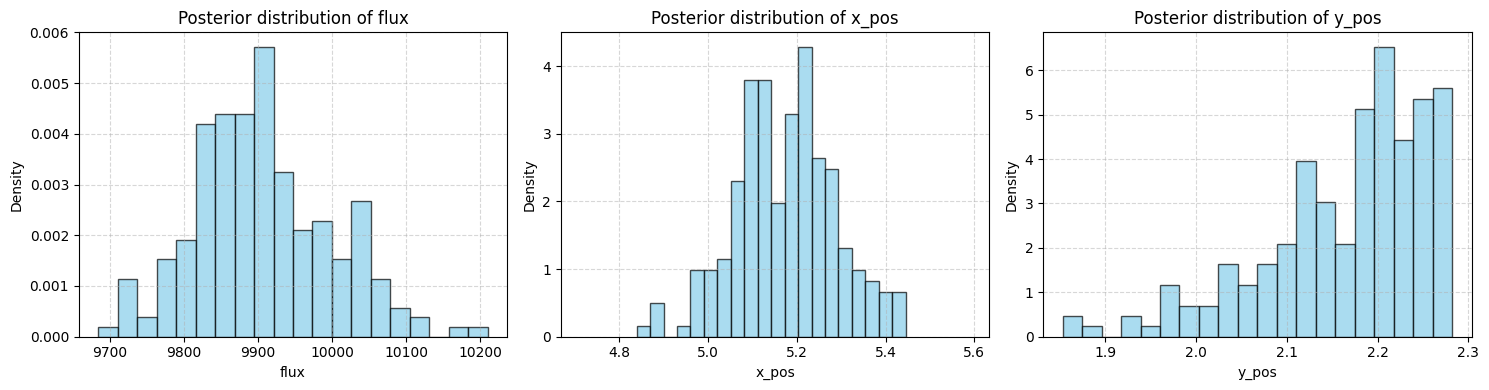

sample: 100%|██████████| 400/400 [00:11<00:00, 34.30it/s, 7 steps of size 8.82e-01. acc. prob=0.92] 


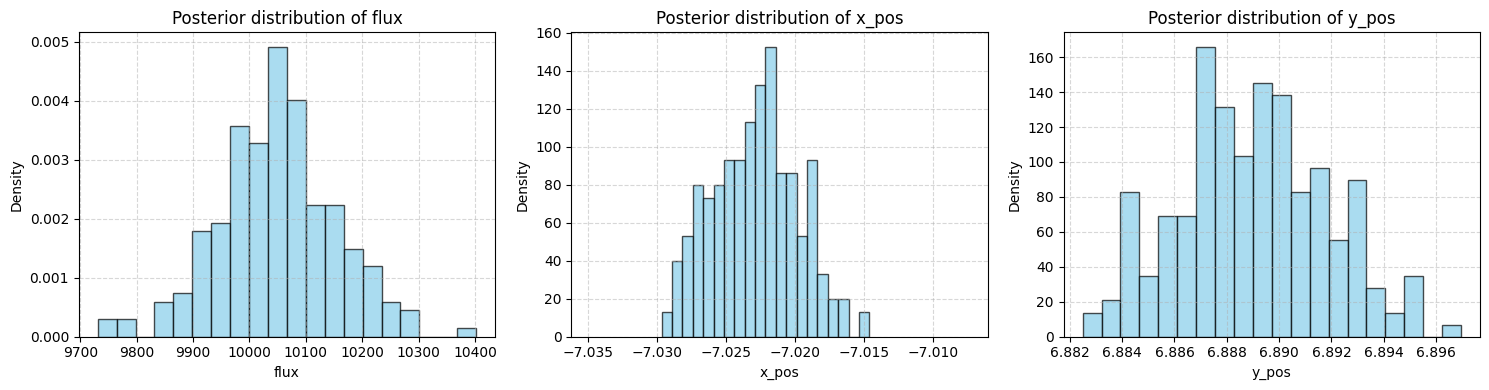

sample: 100%|██████████| 400/400 [00:11<00:00, 33.86it/s, 7 steps of size 9.88e-01. acc. prob=0.93] 


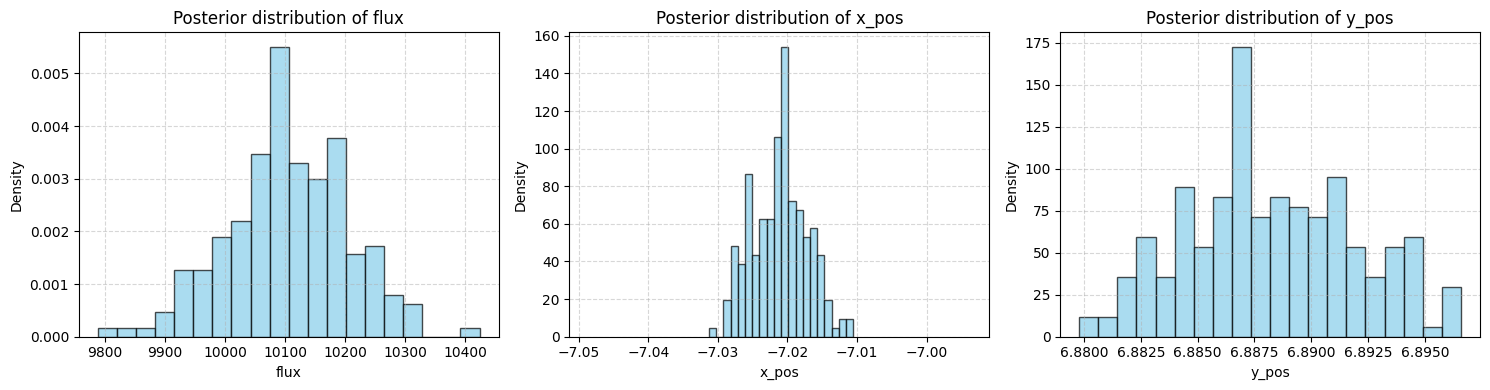

sample: 100%|██████████| 400/400 [00:10<00:00, 36.65it/s, 7 steps of size 7.20e-01. acc. prob=0.93] 


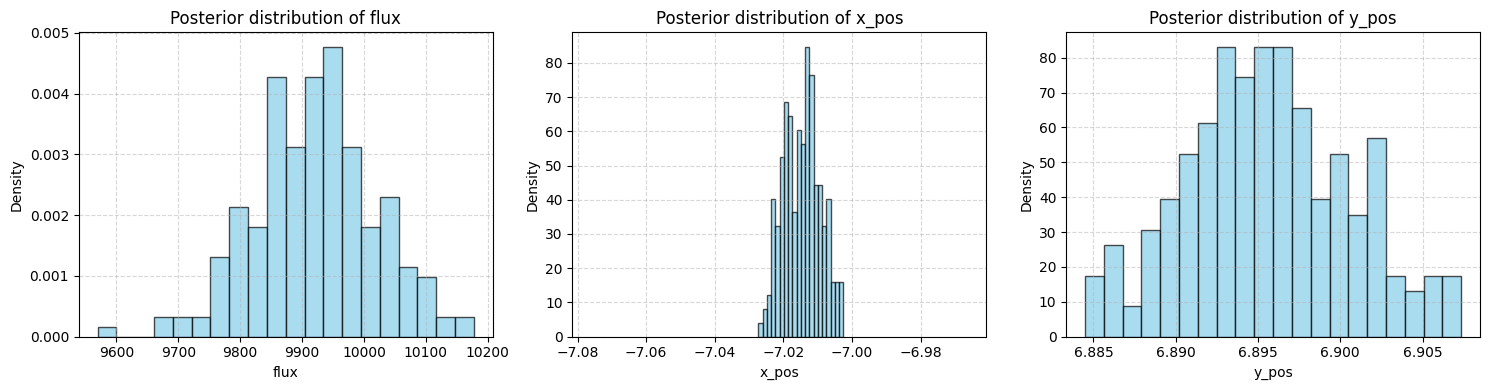

sample: 100%|██████████| 400/400 [00:11<00:00, 34.57it/s, 3 steps of size 9.14e-01. acc. prob=0.93] 


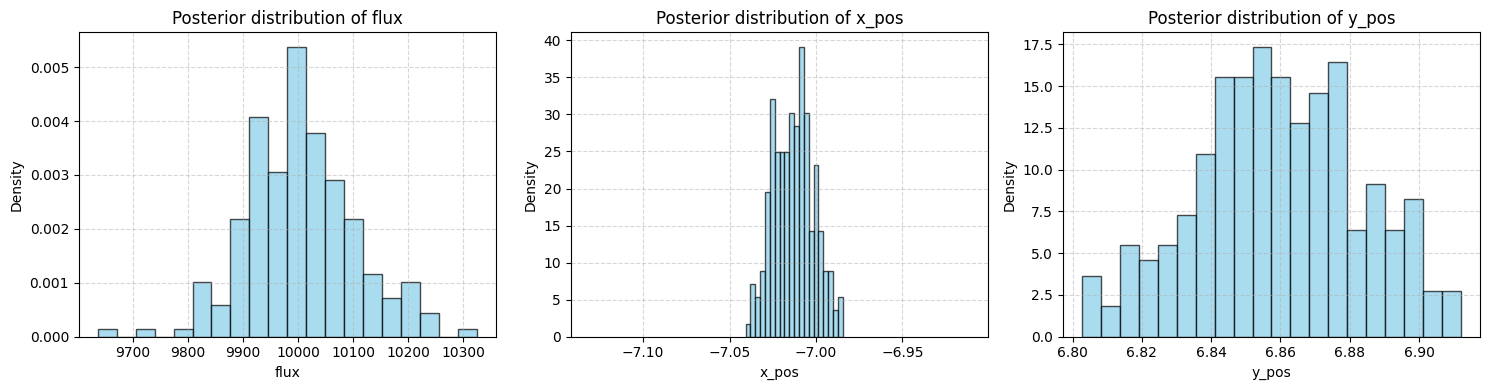

sample: 100%|██████████| 400/400 [00:12<00:00, 31.97it/s, 3 steps of size 9.86e-01. acc. prob=0.91] 


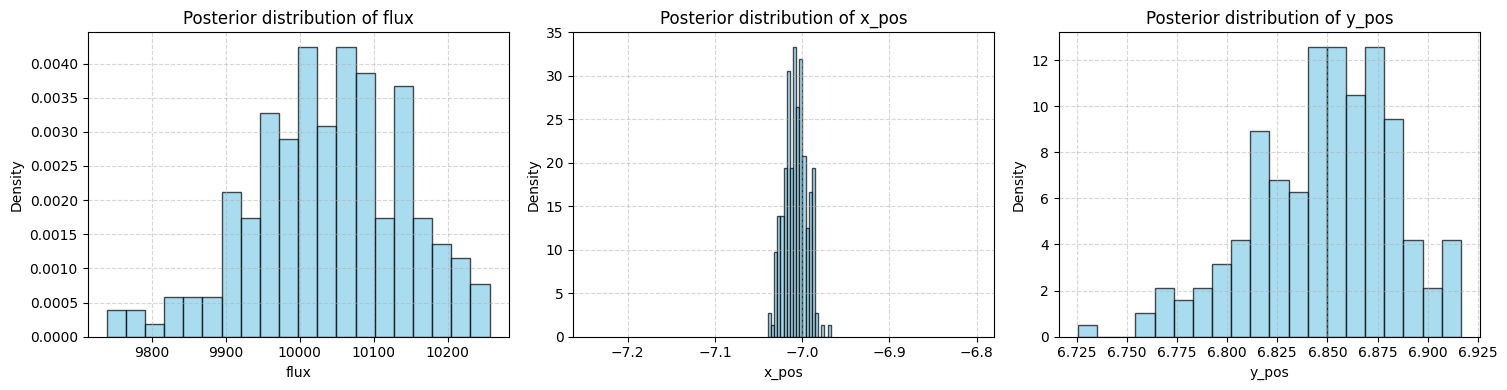

sample: 100%|██████████| 400/400 [00:12<00:00, 31.79it/s, 7 steps of size 7.23e-01. acc. prob=0.92] 


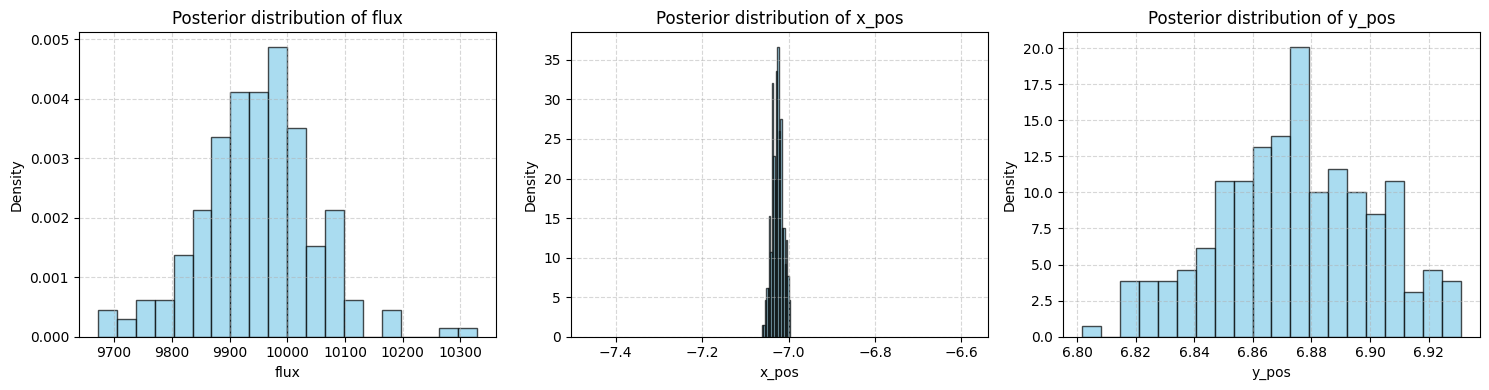

sample: 100%|██████████| 400/400 [00:10<00:00, 36.37it/s, 3 steps of size 6.73e-01. acc. prob=0.91] 


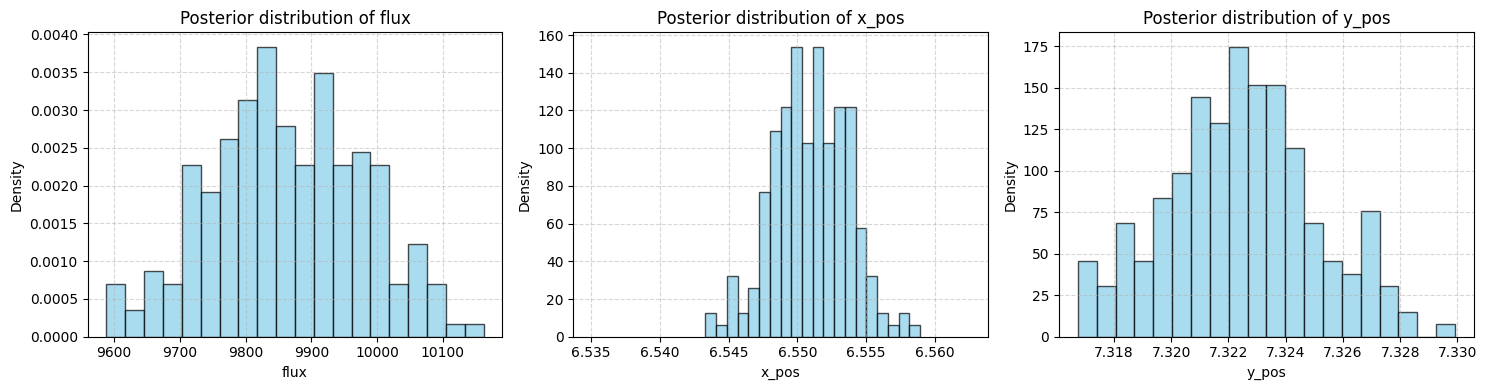

sample: 100%|██████████| 400/400 [00:09<00:00, 43.44it/s, 1 steps of size 9.30e-01. acc. prob=0.85] 


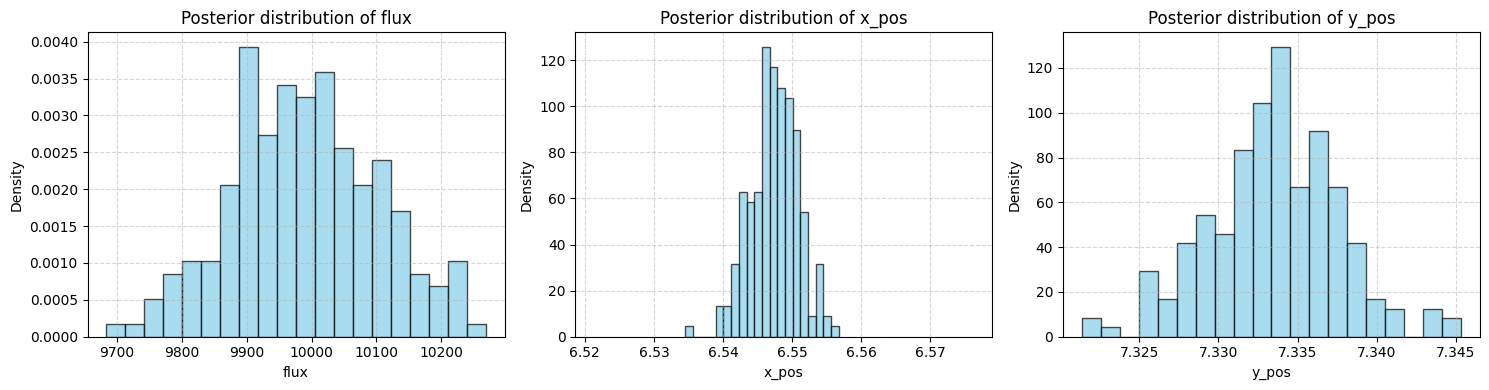

sample: 100%|██████████| 400/400 [00:10<00:00, 37.28it/s, 3 steps of size 8.57e-01. acc. prob=0.91] 


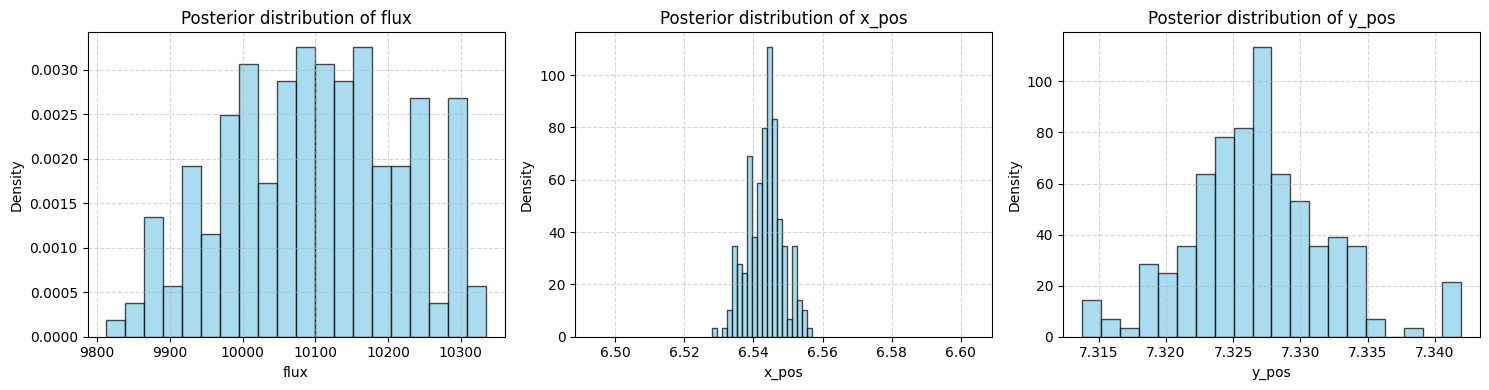

sample: 100%|██████████| 400/400 [00:11<00:00, 35.09it/s, 1 steps of size 9.29e-01. acc. prob=0.89] 


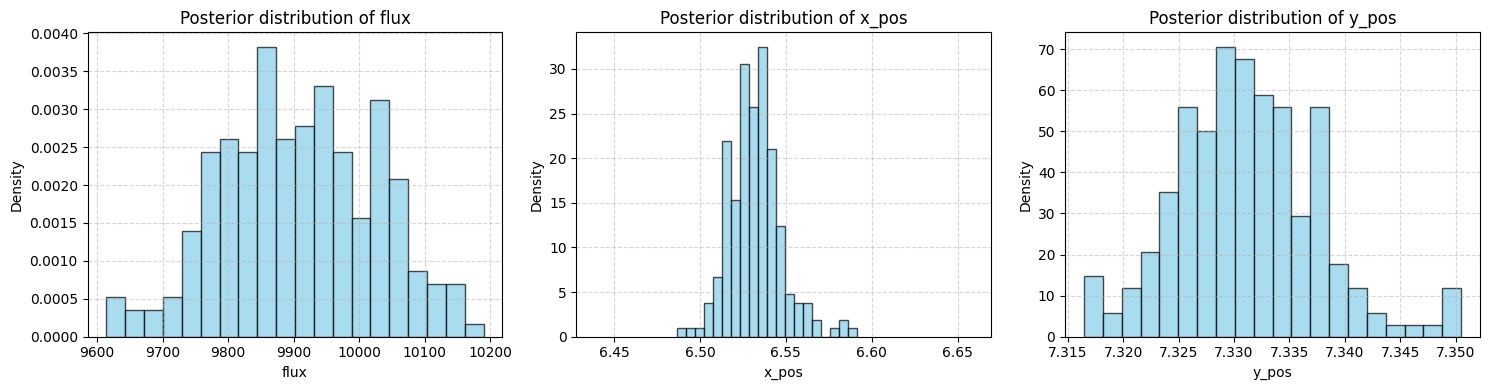

sample: 100%|██████████| 400/400 [00:18<00:00, 21.92it/s, 3 steps of size 8.23e-01. acc. prob=0.91]  


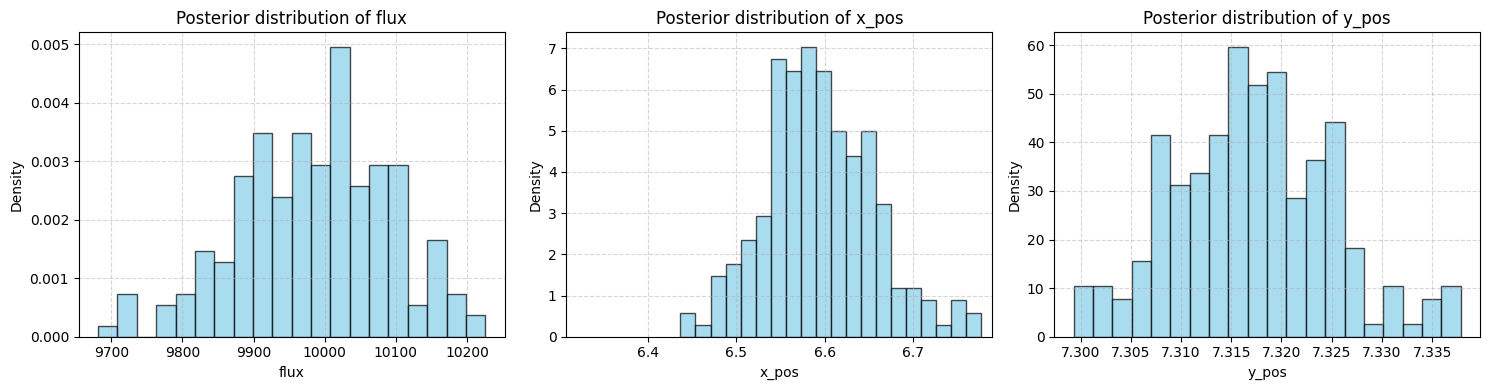

sample: 100%|██████████| 400/400 [00:19<00:00, 20.28it/s, 3 steps of size 8.62e-01. acc. prob=0.91] 


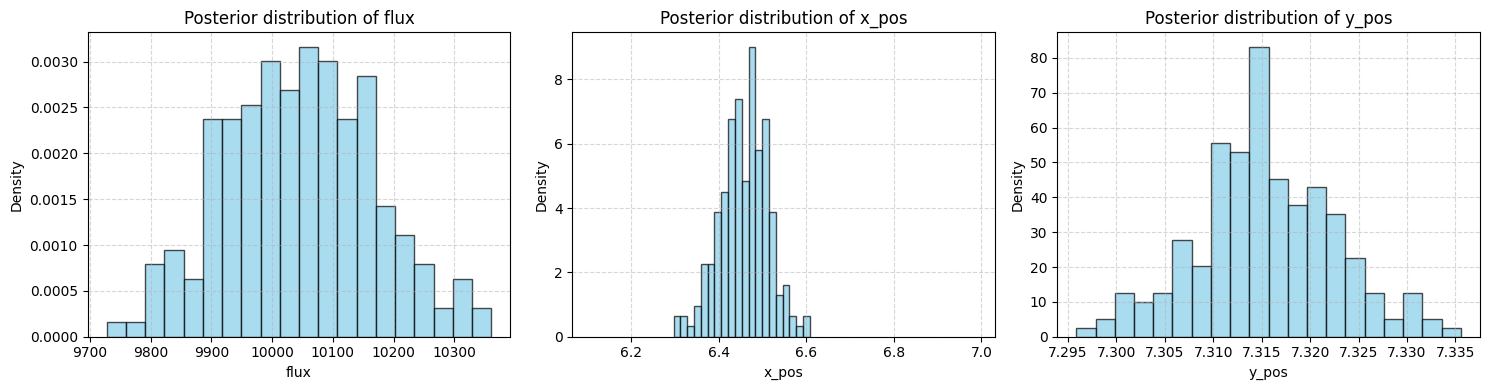

sample: 100%|██████████| 400/400 [00:11<00:00, 34.37it/s, 3 steps of size 4.64e-01. acc. prob=0.91] 


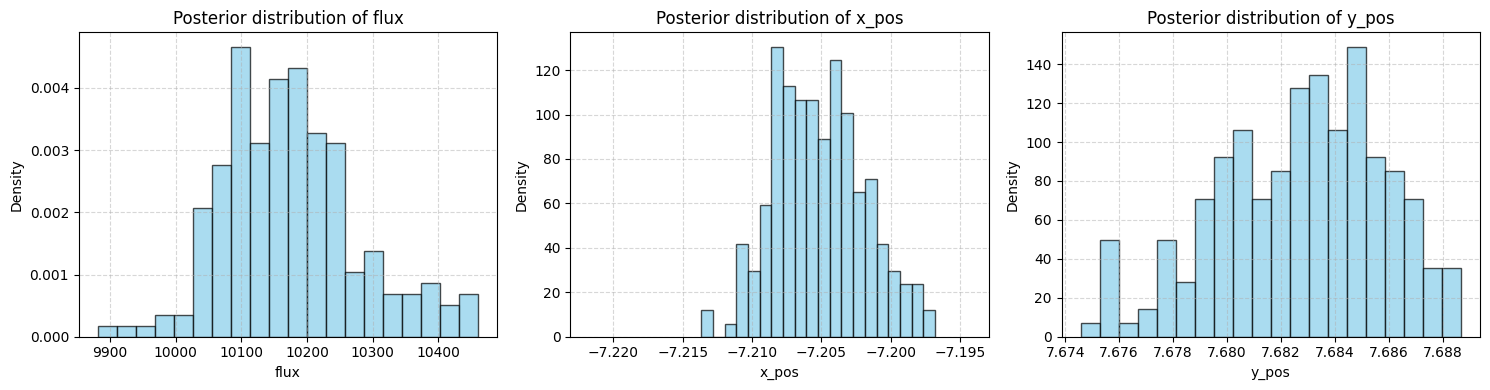

sample: 100%|██████████| 400/400 [00:10<00:00, 39.96it/s, 3 steps of size 1.04e+00. acc. prob=0.88] 


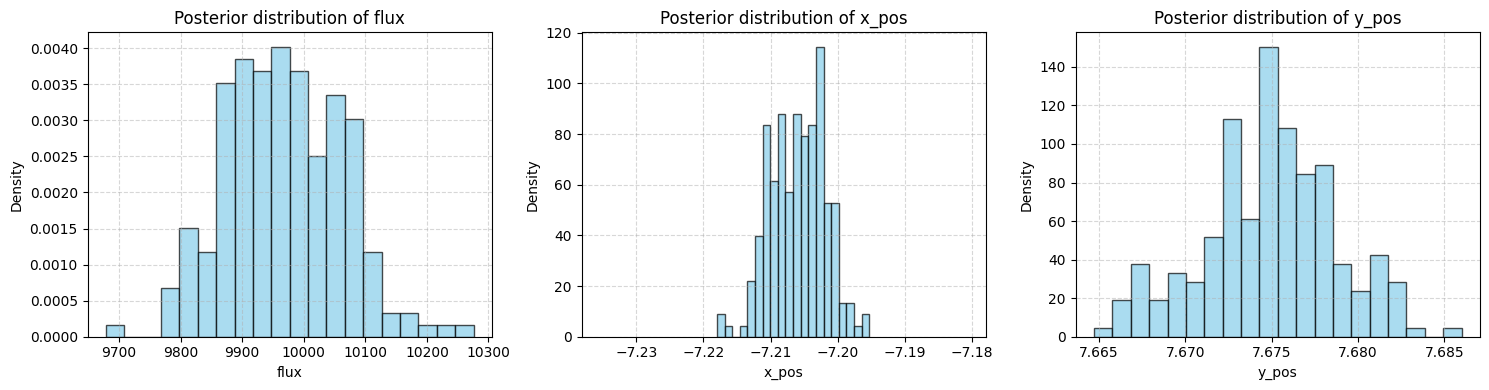

sample: 100%|██████████| 400/400 [00:10<00:00, 39.47it/s, 3 steps of size 1.01e+00. acc. prob=0.88] 


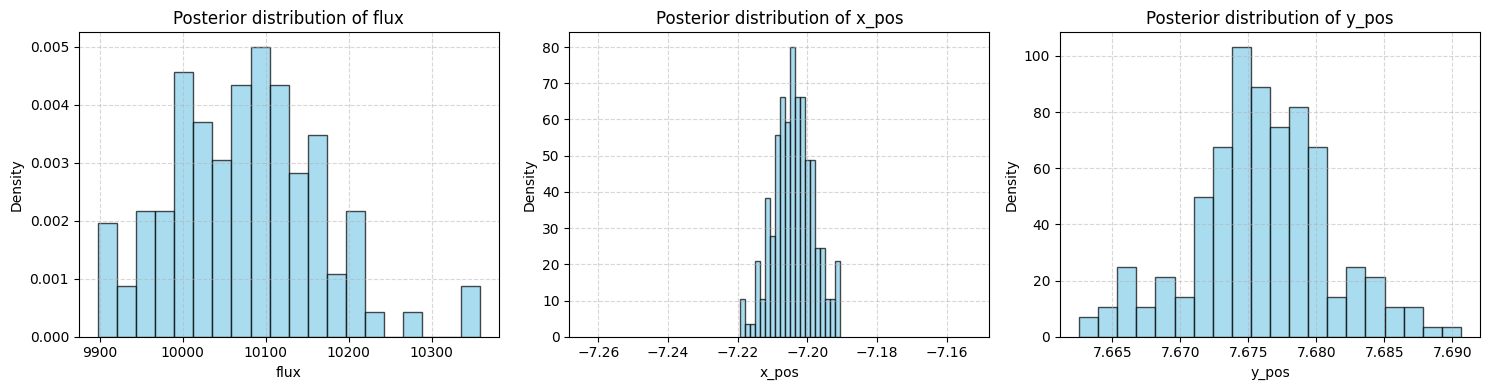

sample: 100%|██████████| 400/400 [00:12<00:00, 33.30it/s, 3 steps of size 8.96e-01. acc. prob=0.89] 


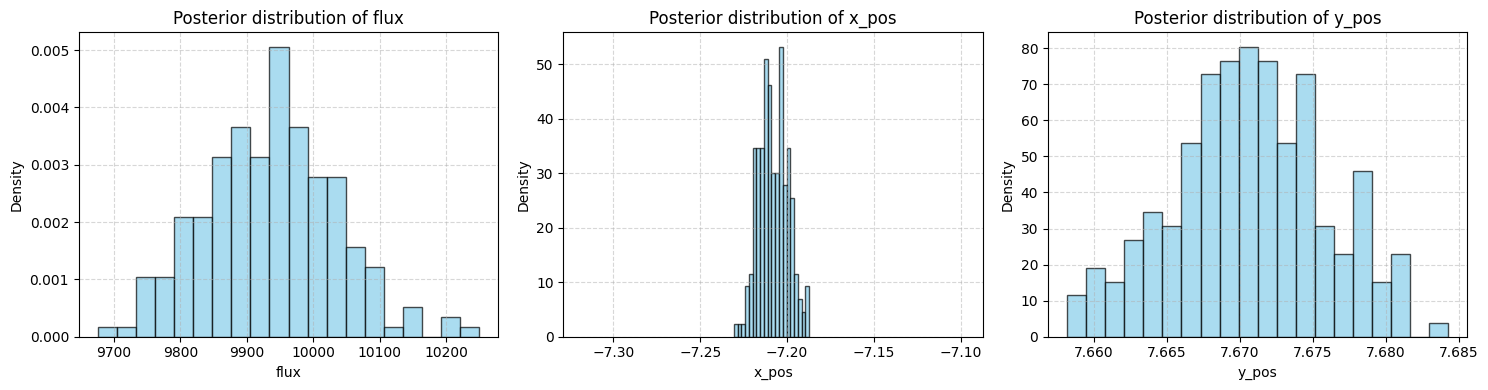

sample: 100%|██████████| 400/400 [00:13<00:00, 30.11it/s, 3 steps of size 1.05e+00. acc. prob=0.88]  


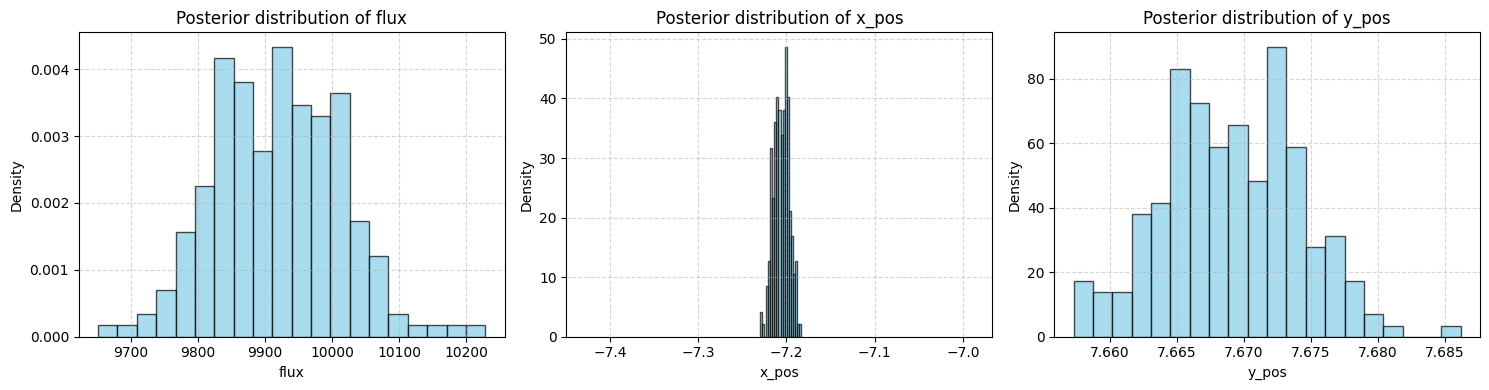

sample: 100%|██████████| 400/400 [00:15<00:00, 25.55it/s, 3 steps of size 9.45e-01. acc. prob=0.87] 


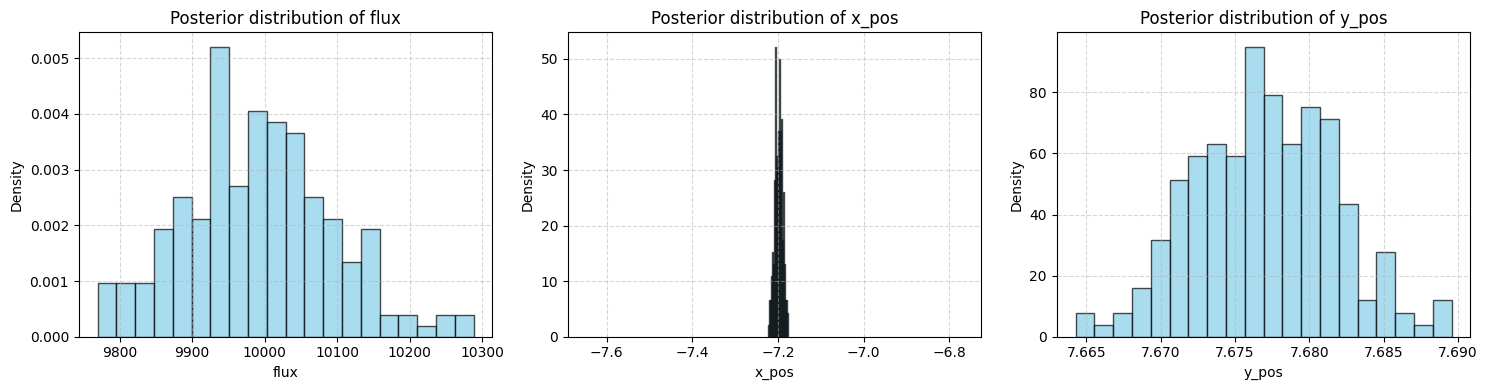

In [91]:
# normal version, not toliman
square_pos_errors_downsample = []
square_flux_errors_downsample = []

for i in np.arange(n_trials):
    key = i
    position_arcsec = jr.uniform(jr.PRNGKey(key), (2,), minval=-16*psf_pixel_scale, maxval=16*psf_pixel_scale)
    position_rad = dlu.arcsec2rad(position_arcsec)

    source = dl.PointSource(np.array([wavelength]), position=position_rad, flux=flux)

    square_flux_errors = []
    square_pos_errors = []

    for idx, downsample in enumerate(downsamples):

        downsample_layer = dl.layers.detector_layers.Downsample(downsample)
        detector = dl.LayeredDetector([downsample_layer])

        telescope = dl.Telescope(optics, source, detector)

        psf = telescope.model()

        data = jr.poisson(jr.PRNGKey(key), psf)

        sampler = npy.infer.MCMC(
            npy.infer.NUTS(psf_model),
            num_warmup=200,
            num_samples=200,
            num_chains=device_count(),
            progress_bar=True
        )

        sampler.run(jr.PRNGKey(key), data, telescope, position_arcsec, downsample)

        samples = sampler.get_samples()

        median_x = np.median(samples['x_pos'].flatten())
        median_y = np.median(samples['y_pos'].flatten())

        median_flux = np.median(samples['flux'].flatten())

        square_pos_error = (np.hypot(median_x - position_arcsec[0], median_y - position_arcsec[1]))**2

        square_flux_error = (median_flux - flux)**2

        square_pos_errors.append(square_pos_error)
        square_flux_errors.append(square_flux_error)

        # plotting
        plt.figure(figsize=(15, 4))
        for paramidx, paramvalues in enumerate(samples.items()):
            param, values = paramvalues
            plt.subplot(1, 3, 1+paramidx)
            plt.hist(values.flatten(), bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
            plt.title(f"Posterior distribution of {param}")
            plt.xlabel(param)
            if param == 'x_pos':
                plt.xlim(-psf_pixel_scale*downsample/32 + position_arcsec[0],psf_pixel_scale*downsample/32 + position_arcsec[0])
            plt.ylabel("Density")
            plt.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()
        
    # normal version, not toliman
    square_pos_errors_downsample.append(square_pos_errors)
    square_flux_errors_downsample.append(square_flux_errors)

In [100]:
print(np.array([downsample**0.5 for downsample in np.array(square_pos_errors_downsample)]))

[[0.00348302 0.00200306 0.00314535 0.01367707 0.00832456 0.31476715]
 [0.00173128 0.00562907 0.00210116 0.0075108  0.01767233 0.01957595]
 [0.00171889 0.00234458 0.00066185 0.00068289 0.01003055 0.12650797]
 [0.00349431 0.00631473 0.00781628 0.00563883 0.01222404 0.00998755]
 [0.005236   0.00672294 0.00305257 0.02261502 0.04094982 0.13663971]
 [0.00414513 0.00597416 0.0062327  0.00435194 0.03281476 0.00801869]
 [0.00665797 0.0033754  0.00930755 0.01683923 0.09154146 0.3880421 ]
 [0.00384431 0.00244427 0.01187683 0.02850403 0.03637932 0.01259741]
 [0.00353857 0.00874544 0.00522883 0.01811964 0.03853023 0.08757908]
 [0.00872601 0.00232385 0.00419803 0.00408157 0.0061702  0.01000274]]


In [98]:
print(np.array(square_pos_errors_downsample_tol)[0]**0.5)

[0.00562399 0.00494137 0.01407306 0.01045901 0.06348137 0.09395276]


In [101]:
import pickle

with open('singlesource_results.pkl', 'wb') as f:
    pickle.dump({
        'square_pos_errors': square_pos_errors_downsample,
        'square_flux_errors': square_flux_errors_downsample,
        'square_pos_errors_tol': square_pos_errors_downsample_tol,
        'square_flux_errors_tol': square_flux_errors_downsample_tol
    }, f)